# Assignment 5- Combining feature cleaning,h20 test running to find best model for dataset and later on model interpretability and shap testing

Abstract-

I am going to do feature cleaning for my dataset using tests such as linear regression,chi square test and creating outlier and extracting best predictor variables responsible for retriving final outcome and then applying h20 Automl test on the datset get its accuracy and getting best model or algorithm suitable for the diabetes dataset and later on applying model interpretability on the datset in which we will perform linear regresioon ,decision tree test and h20 automl to the linear and decision algo and running shap testing in order to get best suitable variables responible for retriving the dependent variable outcome .


About the dataset-

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).


About this file-

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No




Installing opendataset ,pydotplus,h20 is important for this notebook as we need to retreive dataset directly from kaggle and after that run some test cases on that dataset and later on applying automl to the retrieved data and later on in the end apply linear regression and decision tree algorithm to get the best results out of it.

In [4]:
!pip install opendatasets

In [5]:
!pip install h2o

In [6]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [7]:
import opendatasets as od

In [8]:
dataset='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'

In [9]:
import opendatasets as od

In [10]:
od.download(dataset)

Skipping, found downloaded files in "./diabetes-dataset" (use force=True to force download)


In [11]:
import os

In [12]:
data_dir='./diabetes-dataset'

In [13]:
os.listdir(data_dir)

['diabetes.csv']

# Importing all the important libraries important for the notebook.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

In [101]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance

In [15]:
#data retrieve from kaggle
data = pd.read_csv('./diabetes-dataset/diabetes.csv')

In [16]:
datasetA=data.copy()

In [17]:
datasetB=data.copy()

Copying data in two new variables just for the sake of verification after test performed in order to observe any sort of changes in the already retrieved dataset.

In [18]:
data.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [19]:
data.tail(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Above code snippet shows all the variables/columns used in datset along with their nature and we observe there are 7 integer and 2 float values.

In [21]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The above code snippet shows that none of the value is missing in the whole dataset.

0    500
1    268
Name: Outcome, dtype: int64

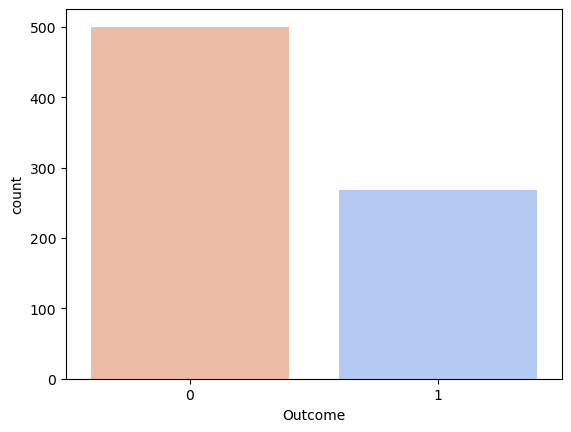

In [22]:
# checking total number of smoker users in dataset
sns.countplot(x='Outcome', data=data, palette='coolwarm_r')
data['Outcome'].value_counts()

The above snippet shows that 500 samples/people are non diabetic but 268 people are diabetic.

In [23]:
#changing our Main prediction (dependent) variable "Churn" from Bool to Int type for detailed Statistical results
data['Outcome'] = data['Outcome'].astype('int64')

We are switching categorial dependent variable boolean value to integer in above code snippet.

In [24]:
#To get statistical results like count, mean, std, quartiles and many more from the dataset
#we use the descsribe() function.
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

From data.describe() we get mean valu,std deviation,min,max values

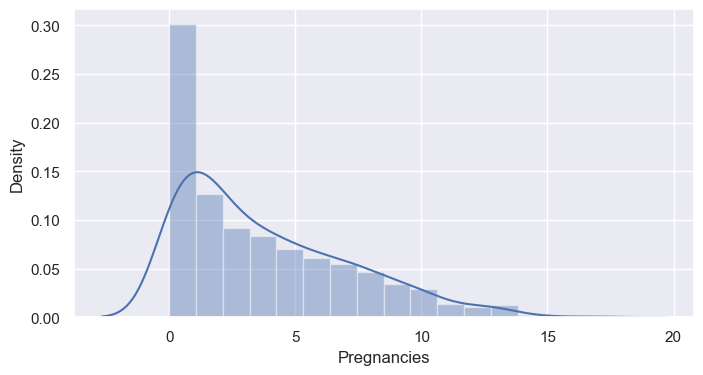

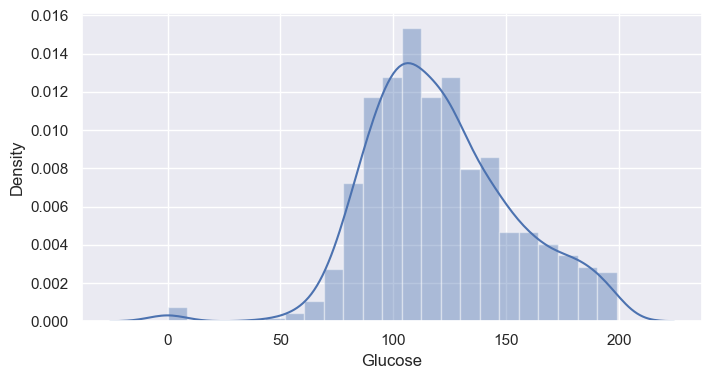

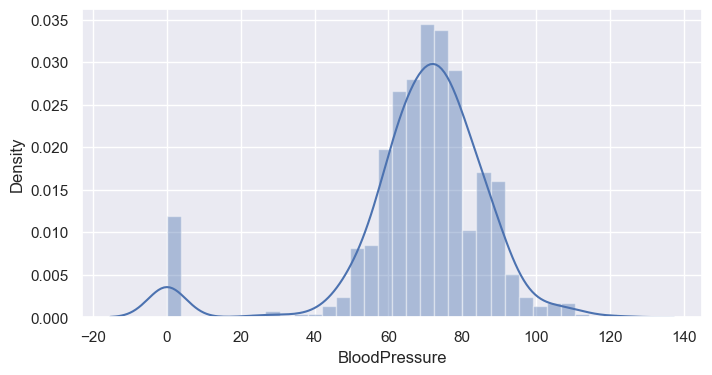

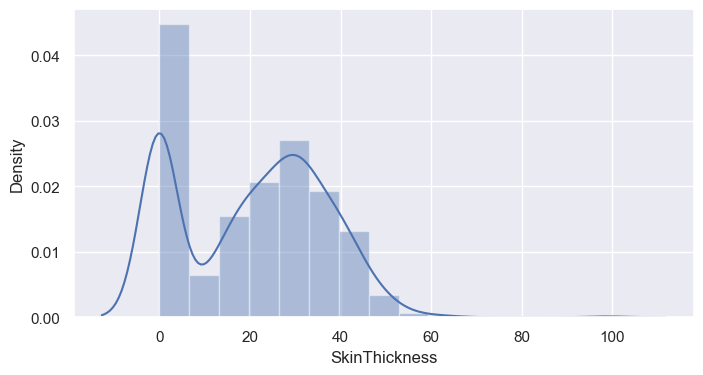

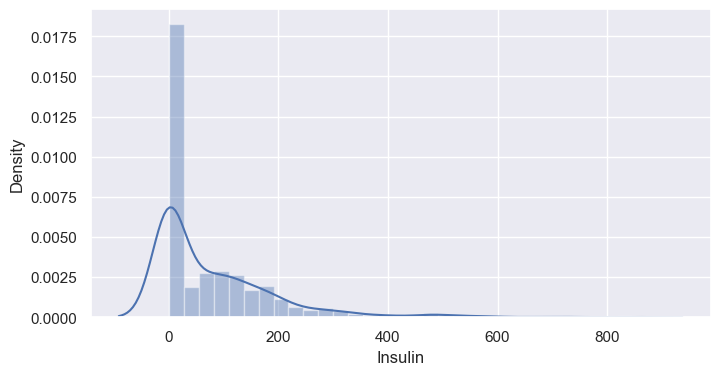

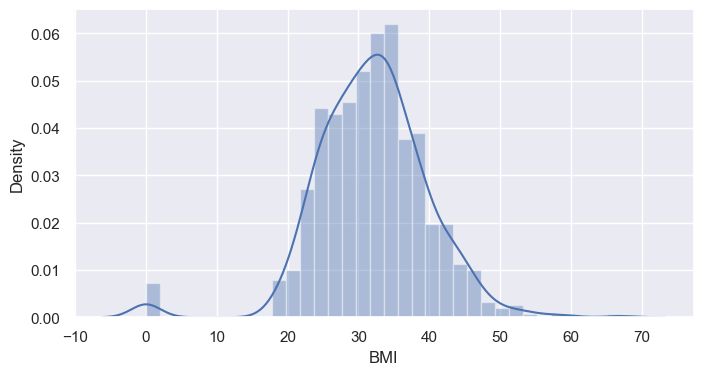

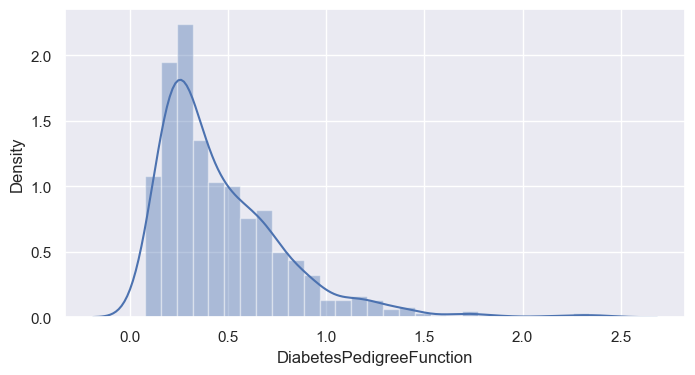

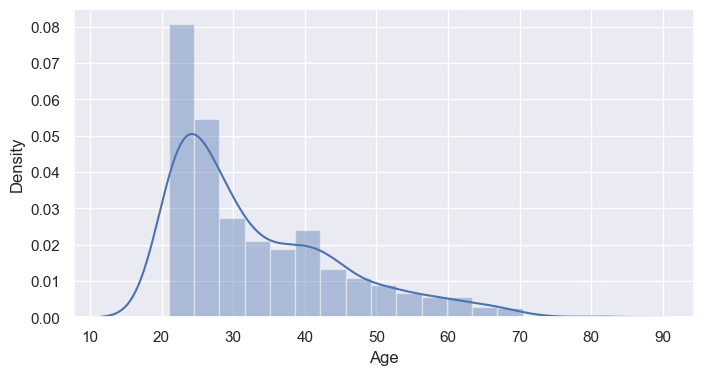

In [25]:
#Checking the distribution of Independent variables
field_names = data[[
    'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
]]

for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(data[column])
    plt.show()

From above code snippet we want to check the range of distribution of predictor variables and all the variables have bell shaved normalised curve which is normalisation curve.

<Axes: >

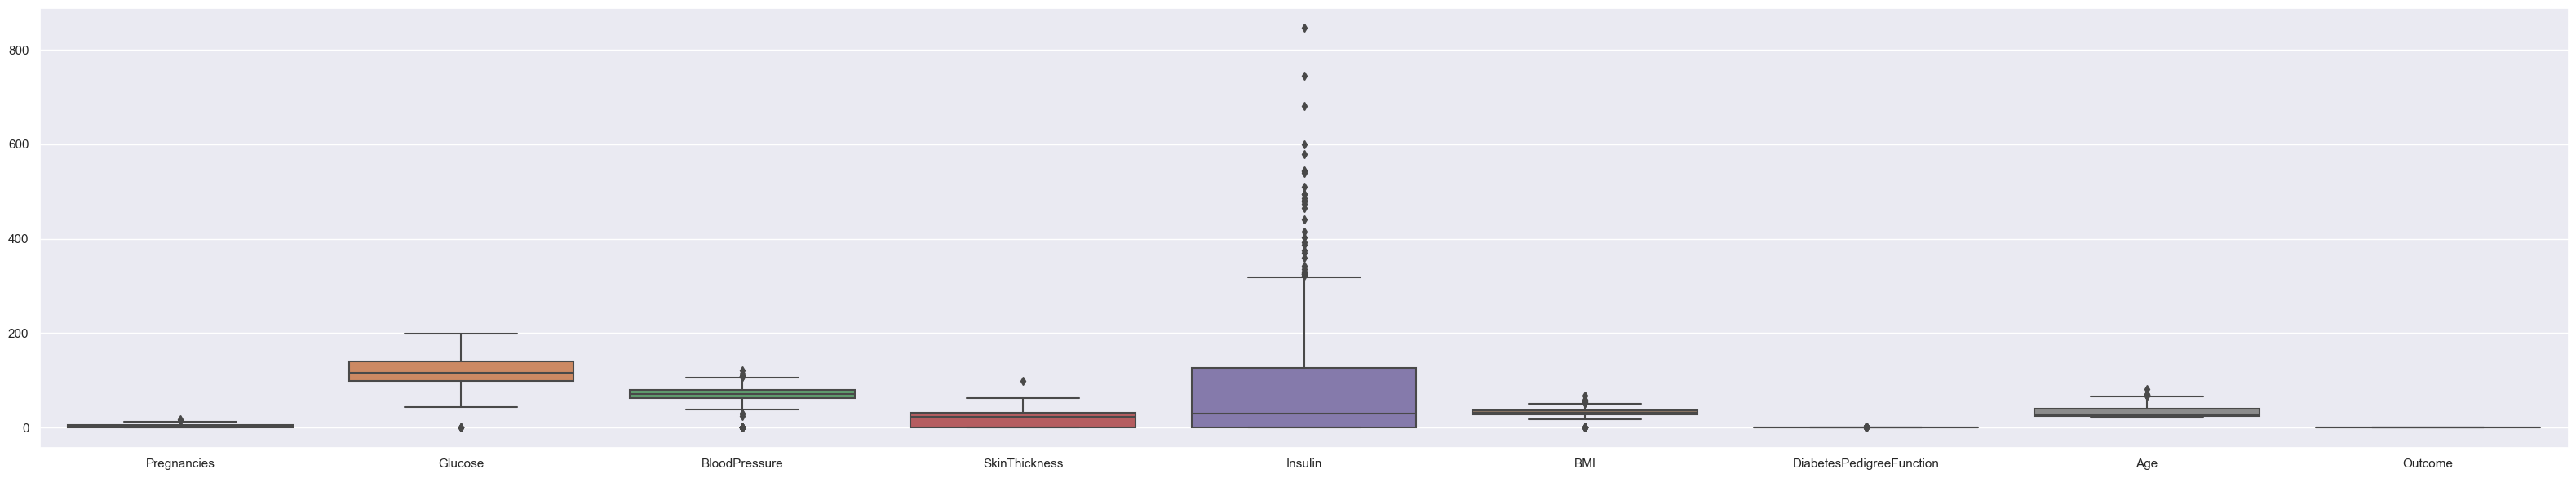

In [26]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,7))
sns.boxplot(data=data)

here we are getting range of predictor variables in form of quartiles.

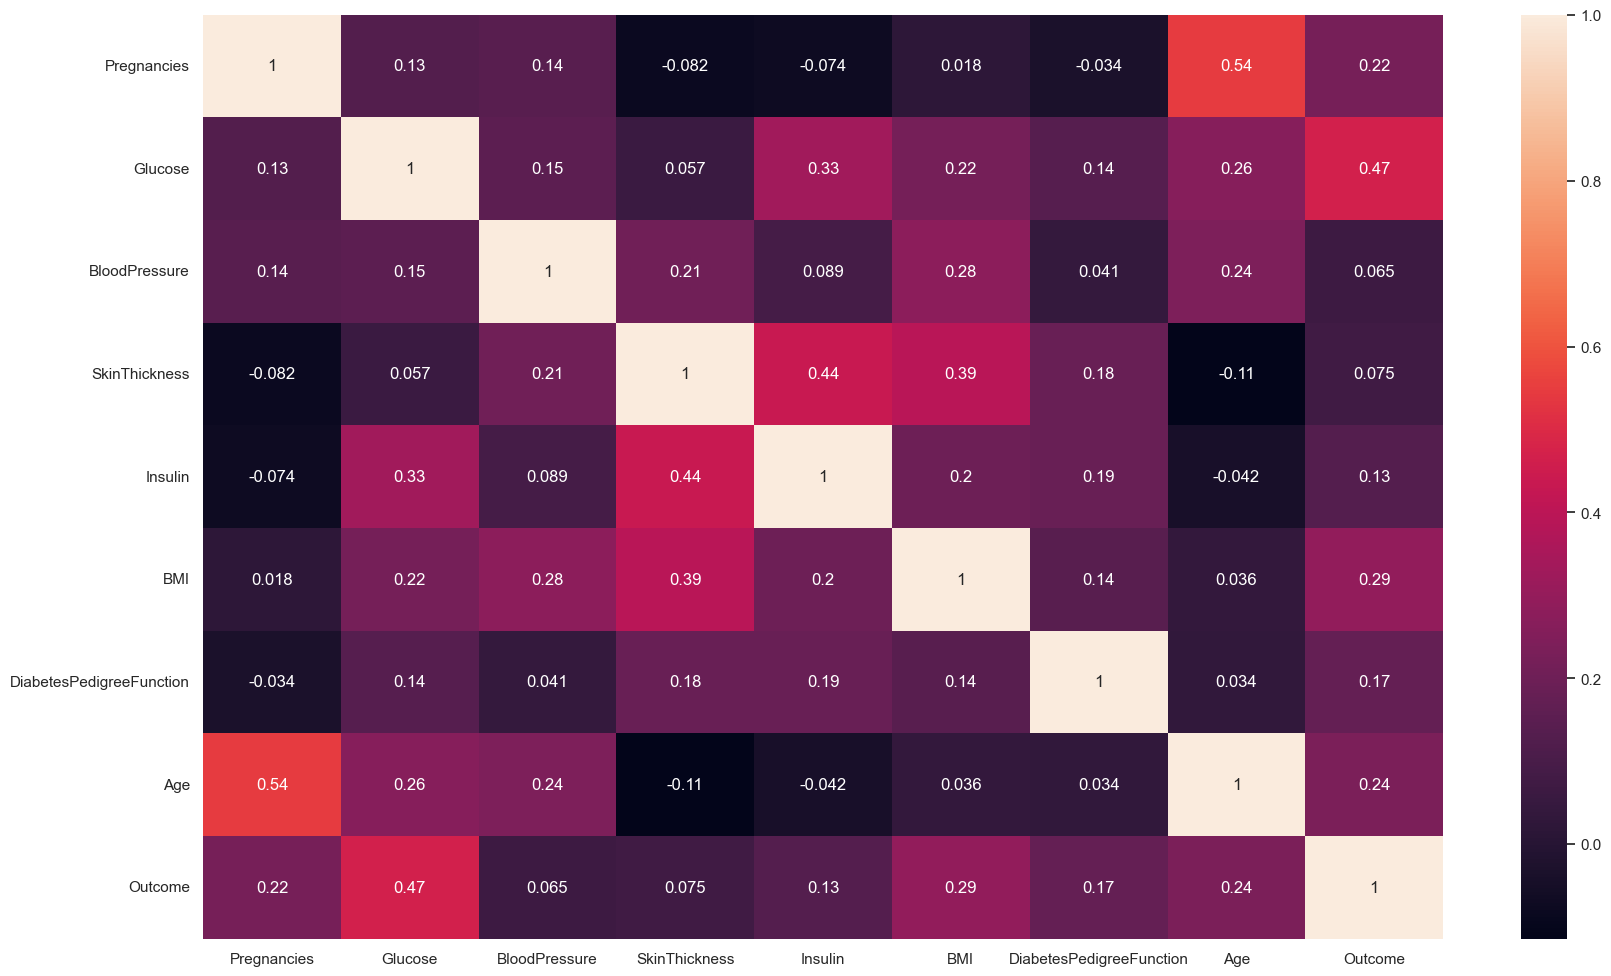

In [27]:
# Check colinearity among data columns
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

In above code snippet Representation of correlation in variables as per dependent variable in order to check the dependency of dependent variable to predictor variables.

In [28]:
# Dependency correlation with Outcome column
data.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

From above code snippet and its output we can observe that glucose,bmi and age as most important factor for getting/predicting the outcome and skinthickness,bloodpressure as the least important features.

In [29]:
#Dropping least important features for the sake of feature cleaning
columns_to_drop = [
    
   'BloodPressure',
    'SkinThickness',
    
]
data_with_corr = data.drop(columns_to_drop, axis=1)
data_with_corr.head()

Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148        0  33.6                     0.627   50        1
1            1       85        0  26.6                     0.351   31        0
2            8      183        0  23.3                     0.672   32        1
3            1       89       94  28.1                     0.167   21        0
4            0      137      168  43.1                     2.288   33        1

we are dropping bloodpressure and skin thickness here as these are least impotant variables for predicting outcome.

In [30]:
#Information after dropping less important features.
data_with_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [31]:
#Importing libraries for chi square and f1 testing.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier(random_state=42)

# First we make dummy data from original data
dummy_data_v2 = pd.get_dummies(data, columns=['DiabetesPedigreeFunction', 'Insulin'])


# Make Testing and Training Data
X = dummy_data_v2.drop(['Outcome'], axis=1)
y = dummy_data_v2['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=42)
# Make copy of this Test Data
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

f1_score_list = []

for k in range(1, 20):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v1, y_train_v1)
    
    sel_X_train_v1 = selector.transform(X_train_v1)
    sel_X_test_v1 = selector.transform(X_test_v1)
    
    dt.fit(sel_X_train_v1, y_train_v1)
    kbest_preds = dt.predict(sel_X_test_v1)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)
  
print(f1_score_list)

[0.641, 0.653, 0.691, 0.714, 0.7, 0.701, 0.71, 0.684, 0.693, 0.682, 0.701, 0.701, 0.701, 0.713, 0.688, 0.695, 0.695, 0.707, 0.713]


in above we have applied chi square test as well as f1_score test in order to find most and least important features which is second method to find out the dependency

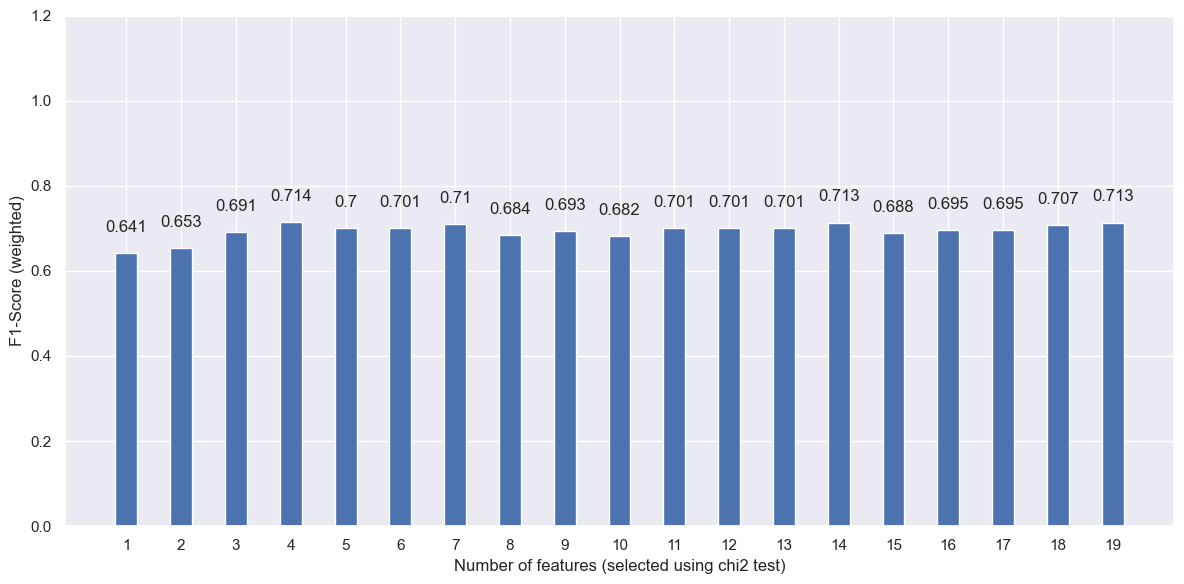

In [32]:
# We can now plot the F1-score for each number of variables used in the model:
fig, ax = plt.subplots(figsize=(12, 6))
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13', '14', '15', '16', '17', '18', '19']
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features (selected using chi2 test)')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

Above we are plotting chi square test chart for number of features involved in the findings of final prediction/result

In [33]:
X_new = dummy_data_v2.drop(['Outcome'], axis=1)
Y_new = dummy_data_v2['Outcome']

# Create and fit selector
selector = SelectKBest(f_classif, k=4)
selector.fit(X_new, Y_new)

# Now selector will take the best featured columns
cols = selector.get_support(indices=True)
new_feature_data = X_new.iloc[:,cols]
print(new_feature_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BMI          768 non-null    float64
 3   Age          768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB
None


After this above dummy drop and chi square test we get the best features involved in predicting the final outcome.

In [34]:
new_feature_data['Outcome'] = Y_new
new_feature_data.head()

Pregnancies  Glucose   BMI  Age  Outcome
0            6      148  33.6   50        1
1            1       85  26.6   31        0
2            8      183  23.3   32        1
3            1       89  28.1   21        0
4            0      137  43.1   33        1

# Implementation of logistic regression to find best features in this classified dataset.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

X_v2 = dummy_data_v2.drop(['Outcome'], axis=1)
y_v2 = dummy_data_v2[['Outcome']]
y_v2 = y_v2.values.ravel()

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_v2)
X_test = scaler.transform(X_test_v2)

In [36]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [37]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Outcome'], data[['Pregnancies', 'Glucose', 'BMI']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              212.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                   2.32e-100
Time:                        13:53:17   Log-Likelihood:                         -452.44
No. Observations:                 768   AIC:                                      910.9
Df Residuals:                     765   BIC:                                      924.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Pregnancies     0.0169      0.005      3.615      0.000       0.008       0.026
Glucose         0.0030      0.000      7.125      0.000       0.002       0.004
BMI            -0.0016      0.002     -1.014      0.311      -0.005       0.001
==============================================================================
Omnibus:                    21003.378   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.017
Skew:                           0.605   Prob(JB):                     5.78e-24
Kurtosis:                       1.628   Cond. No.                         38.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In above we will get r2 as well as p value to check significant value of best predictive feature.

In [38]:
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
X_dummy_data = dummy_data_v2[['Pregnancies', 'Glucose', 'BMI']]
y_dummy_data = dummy_data_v2[['Outcome']]
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_dummy_data, y_dummy_data, test_size=0.2, random_state=42, stratify=y_dummy_data)
logisticRegr.fit(X_train_data, y_train_data)
threshold = 0.5
logisticRegr.predict(X_test_data)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

Now after various sorting and cleaning features above we will now be working with 3 predictive as well as dependent variables.

# Applying logistic regression before and after applying outlier on the test data.

In [39]:
s1= logisticRegr.predict(X_test_data)

In [40]:
# Finding Root mean square error to check how much chances of error are there in our model
rms = mean_squared_error(y_test_v2, s1, squared=False)
rms

0.5405624776173353

In [41]:
#Checking the accuracy of our model with outliers
logisticRegr.score(X_test_data, y_test_data)

0.7077922077922078

In above code snippet ,Through the logistic regresiion we will get accuracy upto 70% which is good accuracy.

In [42]:
# Now we create confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_v2, s1)
print(conf_matrix)

[[79 21]
 [24 30]]


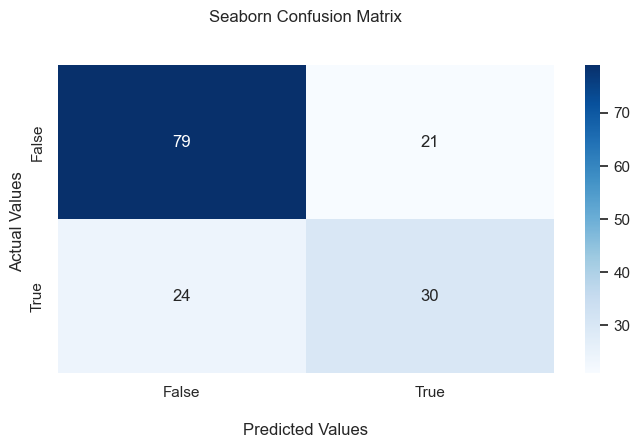

In [43]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The above representaion in seaborn chart is the representation of confusion matrix before applying any kind of outliers ,so that after applying it we will observe again the confusion matrix and we will get to know about the changes occured in dataset with outlier.

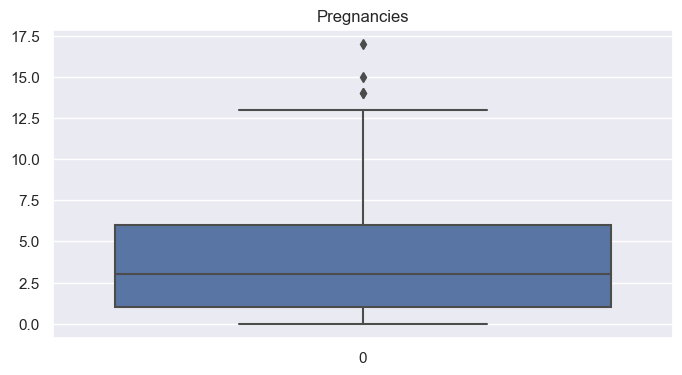

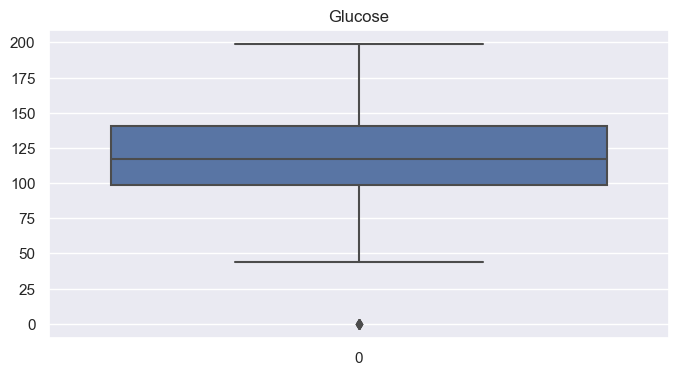

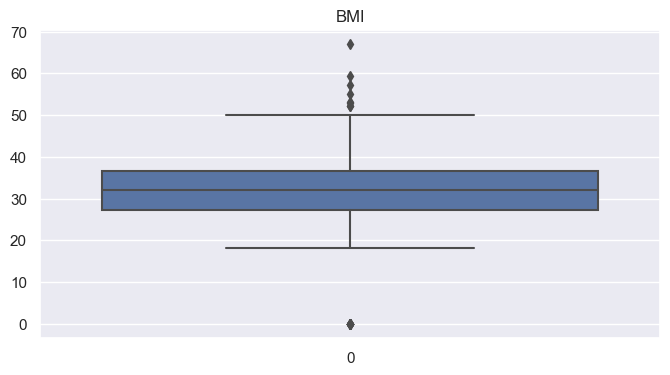

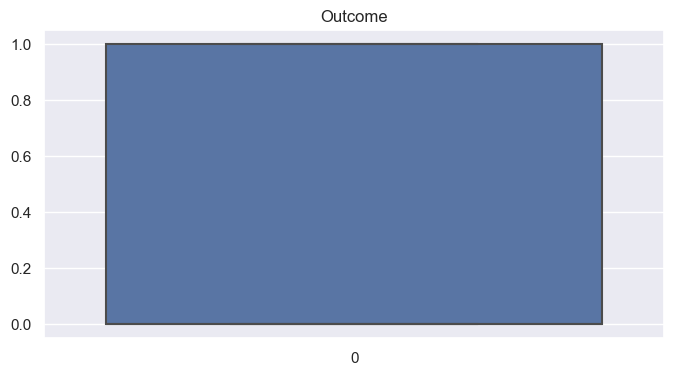

In [44]:
# First we make boxplot of the features we selected to predict the outliers and remove if any
featured_dataset = dummy_data_v2[['Pregnancies','Glucose', 'BMI','Outcome']]
fields = featured_dataset.columns
for column in fields:
    sns.boxplot(data=featured_dataset[column])
    plt.title(column)
    plt.show()

We are using above code snippet to check the quartile range and any outlier if occur in alreacy present dataset.

In [45]:
"""
Normalizing the data in the outcome and pregnancies column 
beacuse the value is too high when compared to other independent variable
"""

from sklearn import preprocessing

# Create x to store scaled values as floats
x = featured_dataset[['Outcome', 'Pregnancies','Glucose','BMI']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
featured_dataset[['Outcome', 'Pregnancies','Glucose','BMI']] = pd.DataFrame(x_scaled)

<Axes: >

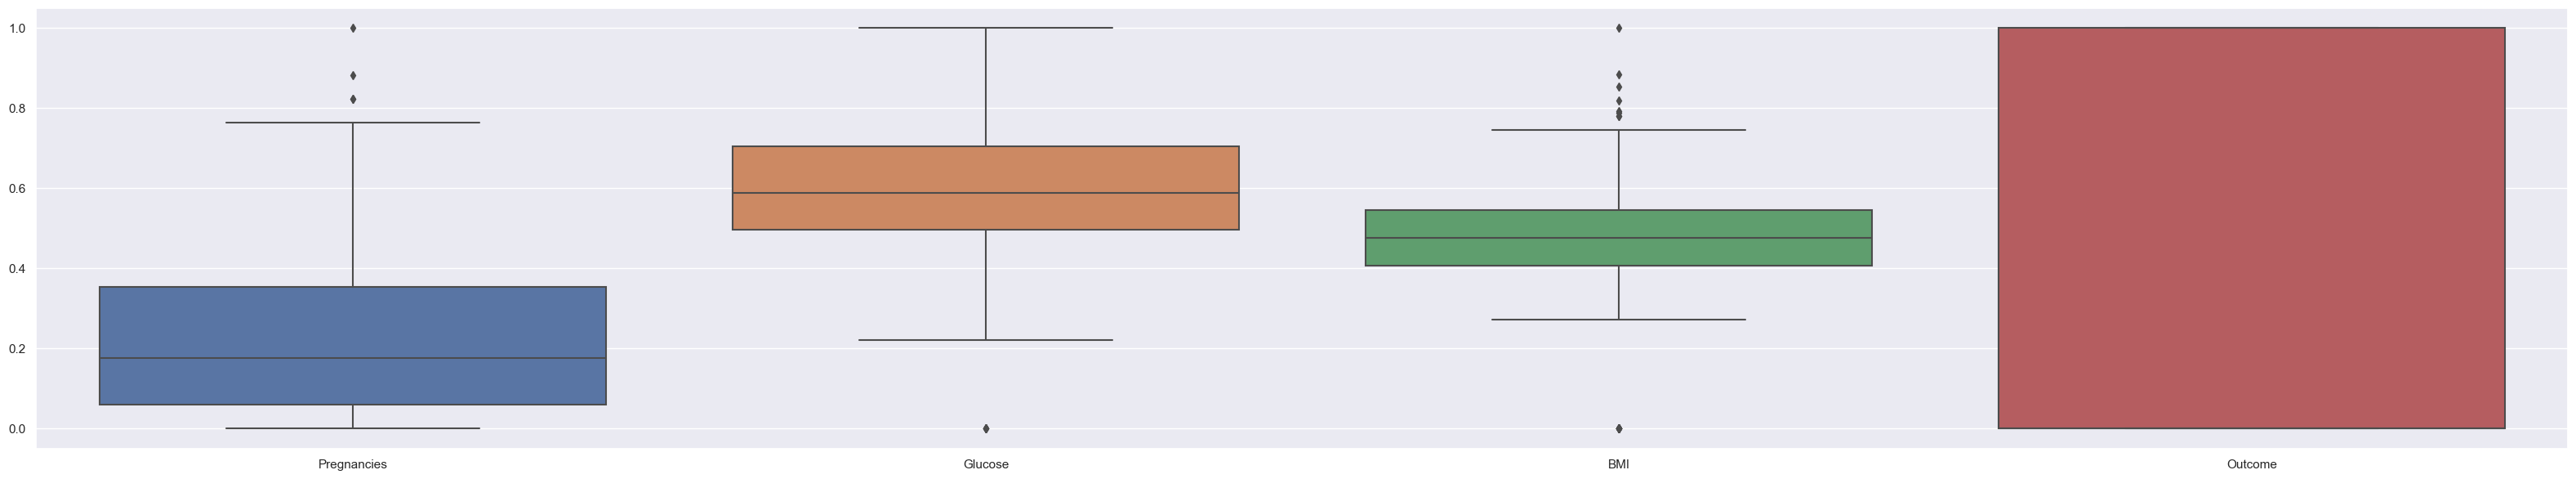

In [46]:
plt.figure(figsize=(40,7))
sns.boxplot(data=featured_dataset)

From above we get the range of all the most important predicted variable in form of quartile chart representation.

# Application of outliers in order to check and recheck any sort of value change. 

In [47]:
dataset_a = data.copy()

# Selecting 1% of data from height column
dataset_a_1_perc = dataset_a['Glucose'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['Glucose'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in outcome row 
dataset_a['Glucose'].isnull().sum()

8

After applying outlier and remoiving just 1% data we get 8 values in the dataset of glucose to be missing.

In [48]:
# Now we will be using Mean Imputation method to replace Null values
dataset_a['Glucose'] = dataset_a['Glucose'].fillna(dataset_a['Glucose'].mean())
dataset_a

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35        0  33.6   
1              1     85.0             66             29        0  26.6   
2              8    183.0             64              0        0  23.3   
3              1     89.0             66             23       94  28.1   
4              0    137.0             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48      180  32.9   
764            2    122.0             70             27        0  36.8   
765            5    121.0             72             23      112  26.2   
766            1    126.0             60              0        0  30.1   
767            1     93.0             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [49]:
#checking recovery after mean imputation in column 
dataset_a.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
#Now we detect the outliers and separate them
# We will be using Inter Quartile Range method to detect outliers

# First we calculate 25 and 75 percentile for both columns
total_diabetic_25_perc = featured_dataset['Outcome'].quantile(0.25)
total_diabetic_75_perc = featured_dataset['Outcome'].quantile(0.75)
total_diabetic_iqr = total_diabetic_75_perc - total_diabetic_25_perc

# Now we find the upper and lower limit
total_diabetic_limit_upper_perc = total_diabetic_75_perc + 1.5 * total_diabetic_iqr
total_diabetic_limit_lower_perc = total_diabetic_25_perc - 1.5 * total_diabetic_iqr

# Finding outliers
new_dataset = featured_dataset[featured_dataset['Outcome'] < total_diabetic_limit_upper_perc]
new_dataset = new_dataset[new_dataset['Outcome'] > total_diabetic_limit_lower_perc]

In the above code snippet Above 25 and 75 percent method is one of the good methods to detect outliers.

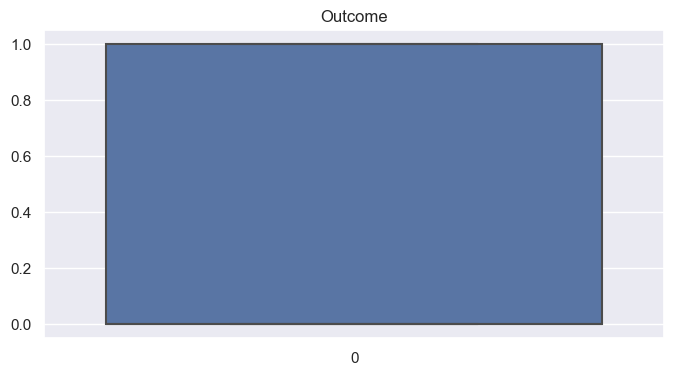

In [51]:
# Now we box plot the features with no outliers
featured_dataset_no_outliers = new_dataset[['Outcome']]
fields_no_outliers = featured_dataset_no_outliers.columns
for column in fields_no_outliers:
    sns.boxplot(data=featured_dataset_no_outliers[column])
    plt.title(column)
    plt.show()

In [52]:
# Now we apply Logistic Regression on our new dataset without Outliers
logisticRegrNoOutliers = LogisticRegression()

y_no_outlier_data = new_dataset[['Outcome']]
X_train_no_outlier_data, X_test_no_outlier_data, y_train_no_outlier_data, y_test_no_outlier_data = train_test_split(featured_dataset_no_outliers, y_no_outlier_data, test_size=0.2, random_state=42, stratify=y_no_outlier_data)
logisticRegrNoOutliers.fit(X_train_no_outlier_data, y_train_no_outlier_data)
threshold = 0.5
logisticRegrNoOutliers.predict(X_test_no_outlier_data)

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0.])

Applying above logistic regression approach again on outlier data to find out any change so far in the predictions.

In [53]:
s2= logisticRegrNoOutliers.predict(X_test_no_outlier_data)

In [54]:
# now we find Root Mean Square error for our new dataset with no outliers
rms = mean_squared_error(y_test_no_outlier_data, s2, squared=False)
rms

0.0

In [56]:
# Now we find our score for new dataset with no outliers
logisticRegrNoOutliers.score(X_test_no_outlier_data, y_test_no_outlier_data)

1.0

In [57]:
# Now we create confusion matrix for feature dataset with no outliers
from sklearn.metrics import confusion_matrix

conf_matrix_no_outliers = confusion_matrix(y_test_no_outlier_data, s2)
print(conf_matrix_no_outliers)

[[100   0]
 [  0  54]]


Observe above carefully and we get to know that due to the outliers just on 1% of the predictions we get different value of confusion matrix as compared to the first reading of complete data withou any cahnge.

# Below we have applied 1%,5%,10% removal of random data and observing the variance,bias and loss.

In [58]:
dataset_a = data.copy()

# Selecting 1% of data from Total day minutes column
dataset_a_1_perc = dataset_a['Outcome'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['Outcome'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in Income row 
dataset_a['Outcome'].isnull().sum()

8

In [59]:
# Now we will be using Mean Imputation method to replace Null values
dataset_a['Outcome'] = dataset_a['Outcome'].fillna(dataset_a['Outcome'].mean())
dataset_a

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50      1.0  
1                       0.351   31      0.0  
2                       0.672   32      1.0  
3                       0.167   21      0.0  
4                       2.288   33      1.0  
..                        ...  ...      ...  
763                     0.171   63      0.0  
764                     0.340   27      0.0  
765                     0.245   30      0.0  
766                     0.349   47      1.0  
767                     0.315   23      0.0  

[768 rows x 9 columns]

In [60]:
# # Checking Bias and Variance for 1% imputed data by mean
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

Expected loss: 0.455
Bias: 70.130
Variance: 0.000


From above we get to know about expected loss ,bias,and variance on random 1% dataset.


# Initialising the h2o with init function

From here the h2o ML algorithm begin ,and we will take care of importing dataset files through h2o and not via pandas.

In [62]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20.0.2" 2023-07-18; Java(TM) SE Runtime Environment (build 20.0.2+9-78); Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from /Users/sanatpopli/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpv_6rfq01
  JVM stdout: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpv_6rfq01/h2o_sanatpopli_started_from_python.out
  JVM stderr: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpv_6rfq01/h2o_sanatpopli_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.4
H2O_cluster_version_age:    2 months and 7 days
H2O_cluster_name:           H2O_from_python_sanatpopli_u5yi4g
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.4 final
--------------------------  ---------------------------------

# The purpose of this below code is to provide flexibility in generating plots.

When interactive is set to True, Matplotlib will generate plots in an interactive mode, which is useful for visualizing and exploring data within a Jupyter Notebook or similar environment. If interactive is set to False, it configures Matplotlib to generate plots in a non-interactive mode, which may be preferred when you want to save static images of plots without displaying them interactively.
interactive = True: This line sets the variable interactive to True, indicating that interactive plots should be generated.

In [63]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

#The h2o.import_file function is typically used to load a dataset into the H2O.ai environment for further analysis and machine learning tasks

In [64]:
## Please check we are importing dataset with H2O and not Pandas 
data = h2o.import_file( './diabetes-dataset/diabetes.csv' )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In data science and analysis, the data.describe() command is frequently used with libraries such as H2O to produce information about the dataset that has been imported into the data object, including summary statistics. Typically, data.describe() yields a summary of the dataset together with statistics for each of the numerical columns when it is executed. For every numerical attribute in the dataset,

In [65]:
# Data exploration and munging. Generate scatter plots 

def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

1)scatter_plot(data, x, y, max_points = 1000, fit = True): This function takes several arguments:

2)data: The dataset on which the scatter plot and regression fit will be generated.

3)x and y: The names of the two variables (columns) from the dataset that will be used for the scatter plot.

4)max_points: An optional argument that specifies the maximum number of points to be included in the scatter plot. It is set to a default value of 1000.

5)fit: An optional boolean argument that, when set to True, fits a linear regression line to the scatter plot. By default, it is set to True.

Inside the function, it performs the following steps: If fit is True, it trains a Generalized Linear Model (GLM) with a Gaussian family using H2O (H2OGeneralizedLinearEstimator) on the specified variables x and y. It creates a subset of the dataset by randomly selecting a maximum of max_points data points from the data based on a uniform random distribution. Converts the H2O data frame to a Pandas data frame (df_py) for visualization. If fit is True, it calculates the regression coefficients (coeff) from the GLM model and stores them. If the x variable is of the "object" data type (categorical variable), it generates a box-and-whisker plot for y by each category of x. Otherwise, it generates a scatter plot between x and y. If fit is True, it also plots the linear regression line. If interactive (global variable) is True, it displays the generated plot using Matplotlib (plt.show()).

In [66]:
data.describe()

Rows:768
Cols:9

Pregnancies        Glucose             BloodPressure       SkinThickness       Insulin             BMI                DiabetesPedigreeFunction    Age                 Outcome
-------  -----------------  ------------------  ------------------  ------------------  ------------------  -----------------  --------------------------  ------------------  -------------------
type     int                int                 int                 int                 int                 real               real                        int                 int
mins     0.0                0.0                 0.0                 0.0                 0.0                 0.0                0.078                       21.0                0.0
mean     3.845052083333336  120.89453125        69.10546874999994   20.536458333333357  79.79947916666666   31.99257812500003  0.4718763020833334          33.240885416666615  0.3489583333333333
maxs     17.0               199.0               122.0               99.0                846.0               67.1               2.42                        81.0                1.0
sigma    3.36957806269887   31.972618195136224  19.355807170644777  15.952217567727642  115.24400235133803  7.884160320375441  0.331328595012775           11.760231540678689  0.47695137724279896
zeros    111                5                   35                  227                 374                 11                 0                           0                   500
missing  0                  0                   0                   0                   0                   0                  0                           0                   0
0        6.0                148.0               72.0                35.0                0.0                 33.6               0.627                       50.0                1.0
1        1.0                85.0                66.0                29.0                0.0                 26.6               0.351                       31.0                0.0
2        8.0                183.0               64.0                0.0                 0.0                 23.3               0.672                       32.0                1.0
3        1.0                89.0                66.0                23.0                94.0                28.1               0.167                       21.0                0.0
4        0.0                137.0               40.0                35.0                168.0               43.1               2.288                       33.0                1.0
5        5.0                116.0               74.0                0.0                 0.0                 25.6               0.201                       30.0                0.0
6        3.0                78.0                50.0                32.0                88.0                31.0               0.248                       26.0                1.0
7        10.0               115.0               0.0                 0.0                 0.0                 35.3               0.134                       29.0                0.0
8        2.0                197.0               70.0                45.0                543.0               30.5               0.158                       53.0                1.0
9        8.0                125.0               96.0                0.0                 0.0                 0.0                0.232                       54.0                1.0
[768 rows x 9 columns]

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


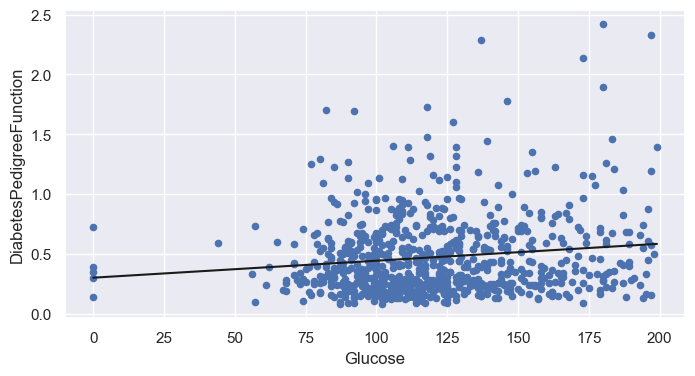

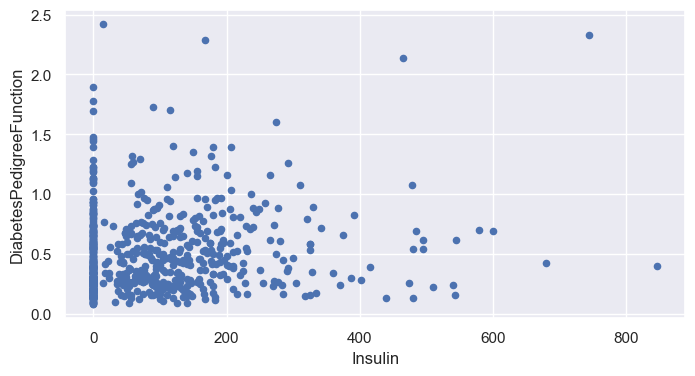

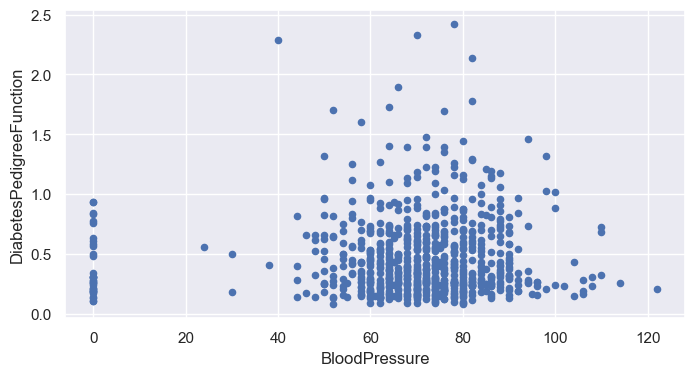

In [67]:
scatter_plot(data, "Glucose", "DiabetesPedigreeFunction", fit = True)
scatter_plot(data, "Insulin", "DiabetesPedigreeFunction", max_points = 5000, fit = False)
scatter_plot(data, "BloodPressure", "DiabetesPedigreeFunction", max_points = 5000, fit = False)


1)scatter_plot(data, "Glucose", "DiabetesPedigreeFunction", fit=True): This generates a scatter plot with "Glucose" on the x-axis and "DiabetesPedigreeFunction" on the y-axis. The fit=True parameter indicates that a linear regression line or best-fit line is drawn on the scatter plot.

2)scatter_plot(data, "Insulin", "DiabetesPedigreeFunction", max_points=5000, fit=False): This generates a scatter plot with "Insulin" on the x-axis and "DiabetesPedigreeFunction" on the y-axis. The max_points=5000 parameter suggests that only a maximum of 5000 data points will be plotted. The fit=False parameter means that no regression line will be drawn.

3)scatter_plot(data, "BloodPressure", "DiabetesPedigreeFunction", max_points=5000, fit=False): Similar to the second call, this generates a scatter plot with "BloodPressure" on the x-axis and "DiabetesPedigreeFunction" on the y-axis, with the same max_points and fit settings.

In [68]:
# Create a test/train split
train,test = data.split_frame([.9])

train, test = data.split_frame([.9]): This line of code splits your dataset, represented by the data variable, into two parts: train: This part contains approximately 90% of the data, as specified by [.9]. The [.9] argument indicates that I want to allocate 90% of the data to the training set. test: This part contains the remaining approximately 10% of the data (since 100% - 90% = 10%). This will be used as the test set for evaluating your models.

In [69]:
#  Set response variable and your choice of predictor variables
myY = "DiabetesPedigreeFunction"
myX = ["DiabetesPedigreeFunction","Glucose","Insulin","BloodPressure"]

1)myY = "DiabetesPedigreeFunction": This line specifies the response variable, which is the target variable or the variable I want to predict. In this case, it is set to "DiabetesPedigreeFunction."

2)myX = ["DiabetesPedigreeFunction", "Glucose", "Insulin", "BloodPressure"]: Here, you define the predictor variables, which are the features or independent variables used to predict the response variable. You've selected four predictor variables: "DiabetesPedigreeFunction," "Glucose," "Insulin," and "BloodPressure." These variables will be used in your machine learning models to make predictions based on their values.

# Before starting the GLM Model let me explain what GLM is

A Generalized Linear Model (GLM) is a type of statistical model that extends the concept of linear regression to a broader class of models, allowing for more flexibility in modeling different types of data. GLMs were introduced by Nelder and Wedderburn in 1972.

Here are some key characteristics and concepts related to GLMs:

Linear Relationship: Like linear regression, GLMs assume that there is a linear relationship between the predictor variables (independent variables) and the response variable (dependent variable). However, this linearity assumption is applied to a transformed function of the expected response, not the response itself.

Generalized Linear Model Components: A GLM consists of three main components: 

Random Component (Distribution Family): This component describes the probability distribution of the response variable, which can be any distribution from the exponential family (e.g., Gaussian, Poisson, Binomial, Gamma). The choice of distribution family depends on the nature of the response variable.

Systematic Component (Linear Predictor): The linear predictor is a linear combination of the predictor variables, with coefficients to be estimated. It's usually denoted as η (eta). The link function connects the expected response to the linear predictor.

Link Function: The link function relates the expected value of the response variable to the linear predictor. It transforms the linear predictor to the appropriate scale for the response variable. Common link functions include the identity, logit, log, and inverse functions. Fitting the Model: GLMs are typically fit to the data using the method of maximum likelihood estimation (MLE) to estimate the model parameters (coefficients) that best describe the relationship between the predictors and the response.

Applications: GLMs are versatile and can be used for a wide range of applications, including linear regression (Gaussian distribution), logistic regression (Binomial distribution), Poisson regression (Poisson distribution), and gamma regression (Gamma distribution), among others. They are well-suited for regression analysis and classification problems.

Model Interpretability: GLMs offer interpretable coefficients that describe the strength and direction of the relationships between predictor variables and the response. The interpretation depends on the choice of the distribution family and the link function. Assumptions: While GLMs relax some of the assumptions of classical linear regression, they still have their own set of assumptions, such as the correct choice of the distribution family and the appropriate link function. Violations of these assumptions can affect the model's accuracy. Extensions: Generalized Linear Models have been extended to include Generalized Additive Models (GAMs) and Generalized Linear Mixed Models (GLMMs), which further expand their capabilities for modeling complex relationships in data.

In [70]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702322218930_2


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.249E-4 )  3                             3                              1                       py_11_sid_b863

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.10535647593825068
RMSE: 0.3245866231659134
MAE: 0.24020725898276257
RMSLE: 0.19514123544033044
Mean Residual Deviance: 0.10535647593825068
R^2: 0.04317315542118372
Null degrees of freedom: 695
Residual degrees of freedom: 692
Null deviance: 76.63675791339334
Residual deviance: 73.32810725302247
AIC: 418.8800919557971

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.10327380349050626
RMSE: 0.3213624176696869
MAE: 0.2394890496637794
RMSLE: 0.19659795885289616
Mean Residual Deviance: 0.10327380349050626
R^2: 0.010283994241751304
Null degrees of freedom: 71
Residual degrees of freedom: 68
Null deviance: 7.568680414754829
Residual deviance: 7.435713851316451
AIC: 50.86039851845164

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2          validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  -------------------  ------------------  ---------------------  ------------------  --------------------
    2023-12-11 14:19:22  0.000 sec   0             76.63675675718392          0.11011028269710332
    2023-12-11 14:19:22  0.006 sec   1                                                             0.3245866231659134  0.10535647593825068  0.24020725898276257  0.04317315542118372  0.3213624176696869  0.10327380349050626    0.2394890496637794  0.010283994241751304

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Insulin        0.0519437              1                    0.587568
Glucose        0.0287641              0.553755             0.325369
BloodPressure  0.00769673             0.148174             0.0870627

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# In this part of the code, I am building a simple Generalized Linear Model (GLM) using H2O. Let's break down what this code does:

a)data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True): I create an instance of the H2OGeneralizedLinearEstimator class, which is used to build generalized linear models. I specify the model parameters:

b)family="gaussian": This parameter specifies the distribution family for the GLM. In this case, I am using a Gaussian distribution, which is appropriate for regression tasks where the response variable is continuous and normally distributed.

c)standardize=True: This parameter indicates that the predictor variables should be standardized before fitting the model. Standardization involves scaling the variables to have a mean of 0 and a standard deviation of 1. It can help improve model convergence and interpretability.

d)data_glm.train(x=myX, y=myY, training_frame=train, validation_frame=test): You train the GLM model using the train method of the data_glm object. Here's what each argument does: x=myX: This specifies the predictor variables you defined earlier, which will be used to make predictions. y=myY: This specifies the response variable, which is the variable you want to predict. training_frame=train: You use the train dataset as the training data for building the model. The train dataset is typically larger and used to train the model.

e)validation_frame=test: You use the test dataset for validation, which helps assess the model's performance on data it hasn't seen during training. This can be used to evaluate the model's generalization ability.


#Lets focus on GBM theory first-

A Gradient Boosting Machine (GBM) is a type of machine learning model that belongs to the ensemble learning family. GBM combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model.

In [71]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1702322218930_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          830                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.10498154118935173
RMSE: 0.3240085511052937
MAE: 0.24025619010730037
RMSLE: 0.19449431439572196
Mean Residual Deviance: 0.10498154118935173

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.10222983561821815
RMSE: 0.3197340076035362
MAE: 0.24408895786038798
RMSLE: 0.19534720439448058
Mean Residual Deviance: 0.10222983561821815

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-12-11 14:19:39  0.004 sec   0                  0.331829         0.246192        0.11011              0.324223           0.251752          0.105121
    2023-12-11 14:19:39  0.035 sec   1                  0.330562         0.245016        0.109271             0.322681           0.24977           0.104123
    2023-12-11 14:19:39  0.042 sec   2                  0.329532         0.24402         0.108592             0.321407           0.247988          0.103302
    2023-12-11 14:19:39  0.045 sec   3                  0.328559         0.243605        0.107951             0.321798           0.248123          0.103554
    2023-12-11 14:19:39  0.048 sec   4                  0.327756         0.242817        0.107424             0.320791           0.246625          0.102907
    2023-12-11 14:19:39  0.052 sec   5                  0.326995         0.24247         0.106925             0.321228           0.246745          0.103187
    2023-12-11 14:19:39  0.055 sec   6                  0.326297         0.241603        0.10647              0.320142           0.245284          0.102491
    2023-12-11 14:19:39  0.058 sec   7                  0.325647         0.241354        0.106046             0.320181           0.245247          0.102516
    2023-12-11 14:19:39  0.061 sec   8                  0.325073         0.241057        0.105672             0.320618           0.24535           0.102796
    2023-12-11 14:19:39  0.064 sec   9                  0.324514         0.240309        0.105309             0.319714           0.244114          0.102217
    2023-12-11 14:19:39  0.068 sec   10                 0.324009         0.240256        0.104982             0.319734           0.244089          0.10223

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Insulin        11.6948                1                    0.622482
Glucose        7.09257                0.606471             0.377518
BloodPressure  0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Let's break down what this code does:
1)data_gbm = H2OGradientBoostingEstimator(balance_classes=True, ntrees=10, max_depth=1, learn_rate=0.1, min_rows=2): I create an instance of the H2OGradientBoostingEstimator class, which is used to build Gradient Boosting Machine models. I specify several model parameters:

2)balance_classes=True: This parameter balances the class distribution, which is particularly useful in classification tasks when the classes are imbalanced. It helps ensure that the model pays equal attention to each class during training.

3)ntrees=10: This parameter determines the number of trees (weak learners) that will be created in the ensemble. In this case, I am building a GBM model with 10 trees.

4)max_depth=1: This parameter sets the maximum depth of each tree in the ensemble. A value of 1 indicates that the trees are shallow, with a maximum of one split node, making them weak learners.

5)learn_rate=0.1: The learning rate controls the step size when updating the model parameters during each iteration. A smaller learning rate can lead to more stable training but may require more iterations. min_rows=2: This parameter sets the minimum number of observations required to create a new split in a tree. It can help prevent overfitting by requiring a certain amount of data in each leaf node. data_gbm.train(x=myX, y=myY, training_frame=train, validation_frame=test): You train the GBM model using the train method of the data_gbm object. Here's what each argument does:

6)x=myX: This specifies the predictor variables I defined earlier, which will be used to make predictions.

7)y=myY: This specifies the response variable, which is the variable I want to predict.

8)training_frame=train: I use the train dataset as the training data for building the model. The train dataset is typically larger and used to train the model.

9)validation_frame=test: I used the test dataset for validation, which helps assess the model's performance on data it hasn't seen during training. This can be used to evaluate the model's generalization ability.

In [72]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor     |   Normalized Coefficient |
|---------------+--------------------------|
| Intercept     |               0.469269   |
| Insulin       |               0.0519437  |
| Glucose       |               0.0287641  |
| BloodPressure |               0.00769673 |


[('Insulin', 11.694816589355469, 1.0, 0.6224824523472704),
 ('Glucose', 7.092566967010498, 0.6064709876225077, 0.37751754765272966),
 ('BloodPressure', 0.0, 0.0, 0.0)]

I am calculating variable importances from both the Generalized Linear Model (GLM) and the Gradient Boosting Machine (GBM) models. Variable importances help to understand which predictor variables have the most significant impact on the model's predictions.

The purpose of calculating and inspecting variable importances is to identify which predictor variables have the most significant influence on the model's predictions. This information can be used for feature selection, model interpretation, and understanding the drivers of the model's output. Variable importances are often used for identifying key features in predictive modeling tasks.

In [73]:
dir(data_glm)

['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',

# Using the dir(data_glm) statement provides a list of the attributes, methods, and properties associated with the data_glm object, which is an instance of the H2OGeneralizedLinearEstimator class in H2O.

Here's what you might find in the list of attributes and methods when you run dir(data_glm):
Attributes: These are typically properties or data associated with the object, and they provide information about the model or its configuration. Common attributes might include information about model parameters, training statistics, and model performance metrics.

Methods: These are functions that can be called on the object. They allow you to perform actions or operations related to the model. Common methods might include fitting the model, making predictions, and accessing model-specific information.

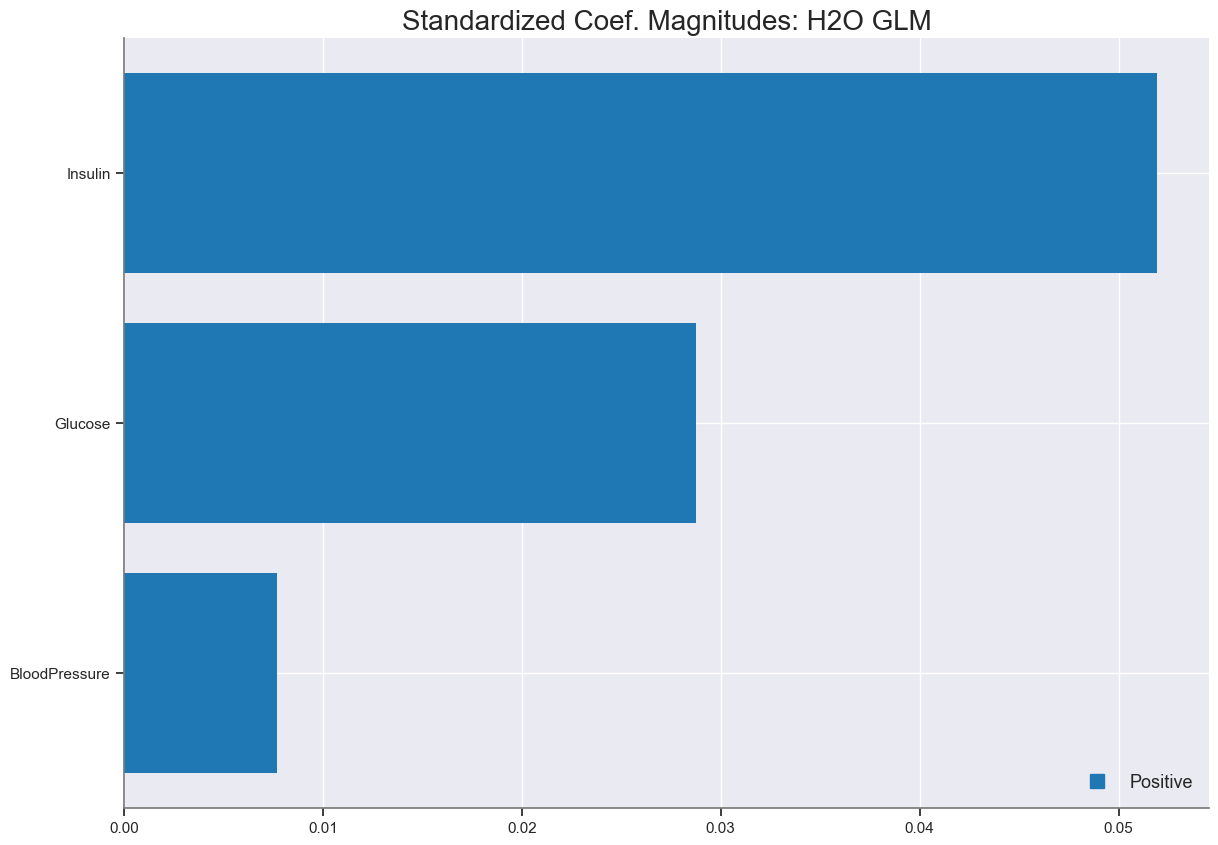

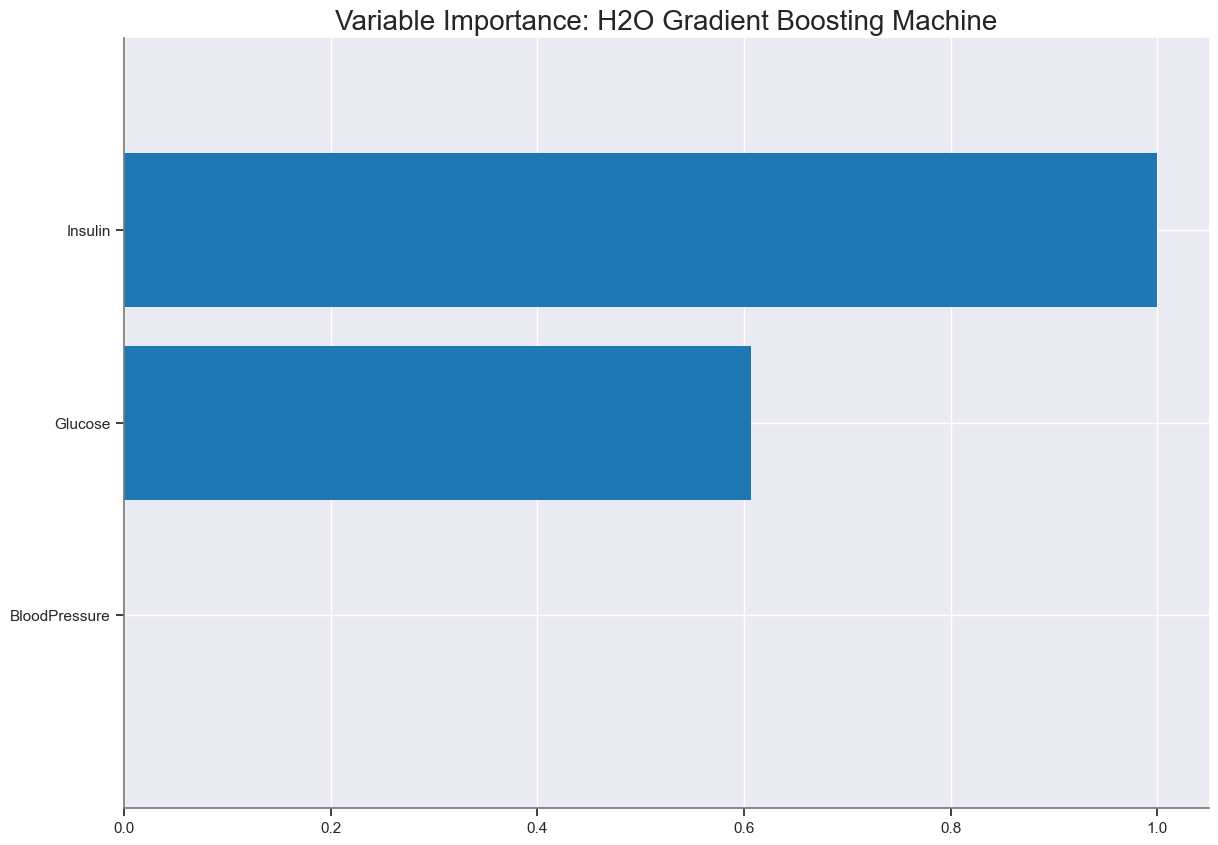

<Figure size 800x400 with 0 Axes>

In [74]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

a)data_glm.std_coef_plot(): This function is used to create a standardized coefficient plot for the GLM model. In this type of plot, the coefficients of the predictor variables in the GLM model are displayed, and they are standardized to have a mean of 0 and a standard deviation of 1. This standardization allows for a fair comparison of the magnitudes and directions of the coefficients. The plot typically shows each predictor variable on the x-axis and its corresponding standardized coefficient on the y-axis. The vertical bars represent the magnitude of the coefficients, and the bars' colors may indicate their direction (positive or negative impact on the response variable). This plot helps you understand the relative importance of each predictor in the GLM model.

b)data_gbm.varimp_plot(): This function generates a variable importance plot for the GBM model. In GBM, variable importance is usually calculated based on how often each predictor variable is used for splitting nodes in the ensemble of decision trees. The more a variable is used for splitting, the more important it is considered. The plot typically displays each predictor variable on the x-axis and its corresponding variable importance score on the y-axis. The bars or points represent the variable importances, and they are typically sorted in descending order. This plot is useful for identifying which predictors have the most influence in the GBM model.

In [75]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.10222983561821815
RMSE: 0.3197340076035362
MAE: 0.24408895786038798
RMSLE: 0.19534720439448058
Mean Residual Deviance: 0.10222983561821815

data_gbm.model_performance(test): This line of code calls the model_performance method on the data_gbm object, which represents your trained GBM model. The test argument specifies the dataset (in this case, the test dataset) on which you want to evaluate the model's performance.

In [76]:
data=data[["DiabetesPedigreeFunction","Glucose","BloodPressure"]]

# Pause.. it is important to check that output and understand it. Key is know your data best to validate the results

What you think was not normal in above plots ?? Insulin as standard deviation as 1 ?? How is that possible ?
so We dropped Insulin.

NOW again repeat the same steps as performed above but this time it must be without insulin.

In [77]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here 
train,test = data.split_frame([.9])

# train, test = data.split_frame([.9]): This line of code is splitting the dataset data into two parts:
train: This will be the training dataset, and it will contain approximately 90% (0.9) of the original data. The specific ratio of 0.9 indicates that 90% of the data will be used for training.
test: This will be the testing dataset, and it will contain the remaining approximately 10% (0.1) of the original data. 

In [78]:
#  Set response variable and your choice of predictor variables
#myY target 
#myX features 
myY = "DiabetesPedigreeFunction"
myX = ["DiabetesPedigreeFunction","Glucose","BloodPressure"]

myY = "DiabetesPedigreeFunction": Here, defining myY as the response variable. The response variable is the variable we are trying to predict in our modeling task. In this case, we are using "DiabetesPedigreeFunction" as the response variable. This variable is typically the target of the predictive model, and will be trying to predict its values based on the predictor variables.

myX = ["DiabetesPedigreeFunction", "Glucose", "BloodPressure"]: This line defines myX as a list of predictor variables. Predictor variables are the features or attributes that uses to make predictions about the response variable. In this case, I have selected "DiabetesPedigreeFunction," "Glucose," and "BloodPressure" as the predictor variables. These are the attributes that will use to make predictions about the values of the response variable.

In [79]:
# Build simple GLM model
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702322218930_4


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.054E-4 )  2                             2                              1                       py_15_sid_b863

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.1027678261037861
RMSE: 0.32057421309859924
MAE: 0.24048795708344714
RMSLE: 0.19425145868667665
Mean Residual Deviance: 0.1027678261037861
R^2: 0.026415694050465954
Null degrees of freedom: 698
Residual degrees of freedom: 696
Null deviance: 73.78375966782507
Residual deviance: 71.83471044654648
AIC: 401.2532869561324

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.15642406575088144
RMSE: 0.39550482392871195
MAE: 0.28999760788366835
RMSLE: 0.23136730826194196
Mean Residual Deviance: 0.15642406575088144
R^2: -0.04161490265314449
Null degrees of freedom: 68
Residual degrees of freedom: 66
Null deviance: 10.421827577203587
Residual deviance: 10.79326053681082
AIC: 75.80578089841664

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae         training_r2           validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  -------------------  --------------------  -------------------  ---------------------  -------------------  --------------------
    2023-12-11 14:21:38  0.000 sec   0             73.7837584549356           0.10555616374096652
    2023-12-11 14:21:38  0.004 sec   1                                                             0.32057421309859924  0.1027678261037861   0.24048795708344714  0.026415694050465954  0.39550482392871195  0.15642406575088144    0.28999760788366835  -0.04161490265314449

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Glucose        0.0521159              1                    0.94516
BloodPressure  0.00302387             0.058022             0.0548401

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

a)Creating the GLM Model: 1)data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True): You are creating an instance of the H2OGeneralizedLinearEstimator class, which is used to build GLM models. This line initializes the GLM model with the following settings:
family="gaussian": The family parameter specifies the distribution family for the GLM. In this case, you are using the "gaussian" family, which is appropriate for regression tasks with continuous numeric response variables.
standardize=True: This parameter specifies whether the predictor variables should be standardized. When set to True, it means that the model will standardize (mean-center and scale) the predictor variables. Standardization is often used to ensure that predictor variables are on the same scale, making it easier to compare their coefficients.


(b)Training the GLM Model: 
1)data_glm.train(x=myX, y=myY, training_frame=train, validation_frame=test): This line of code trains the GLM model using the specified data:

2)x=myX: You specify the predictor variables defined in myX. y=myY: You specify the response variable defined in myY.

3)training_frame=train: You use the train dataset as the training data for building the model. The train dataset typically contains a large portion of the data and is used for training the model.

4)validation_frame=test: The test dataset is used for model validation. It helps assess the model's performance on data that it hasn't seen during training, which is important for evaluating its generalization capability.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

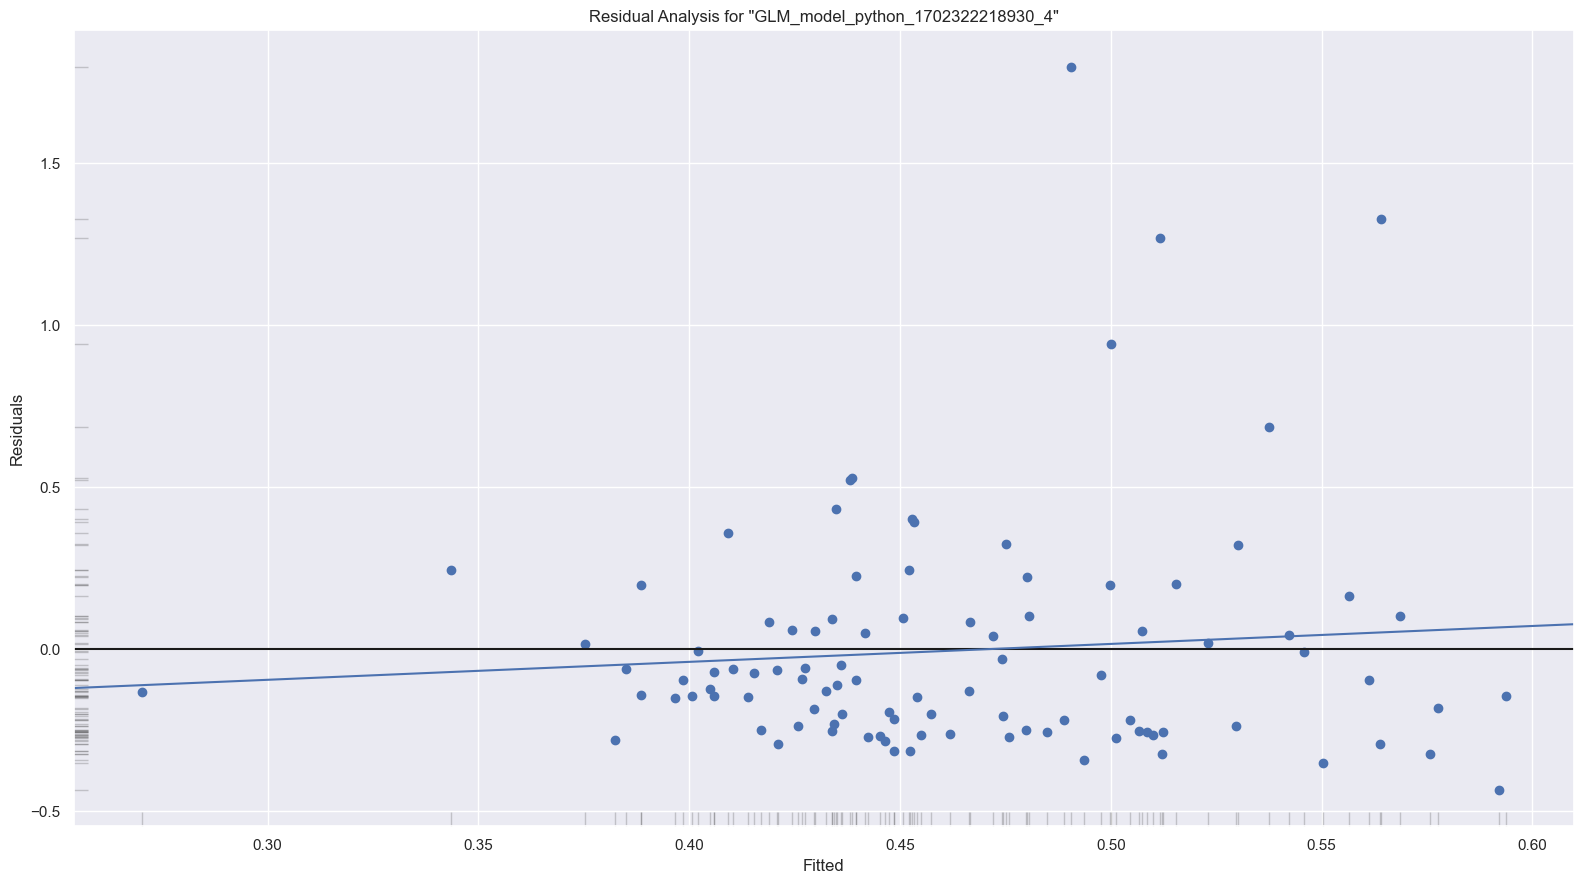

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

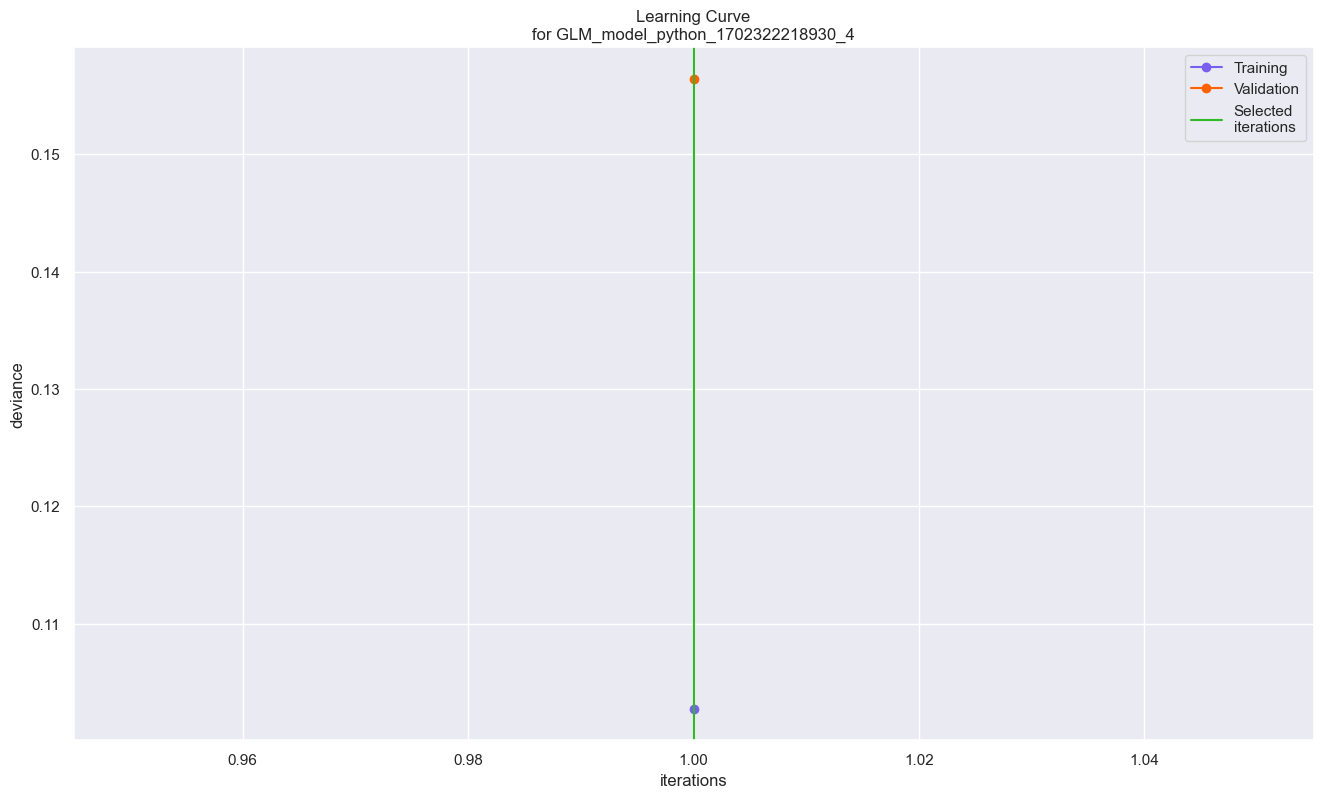

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

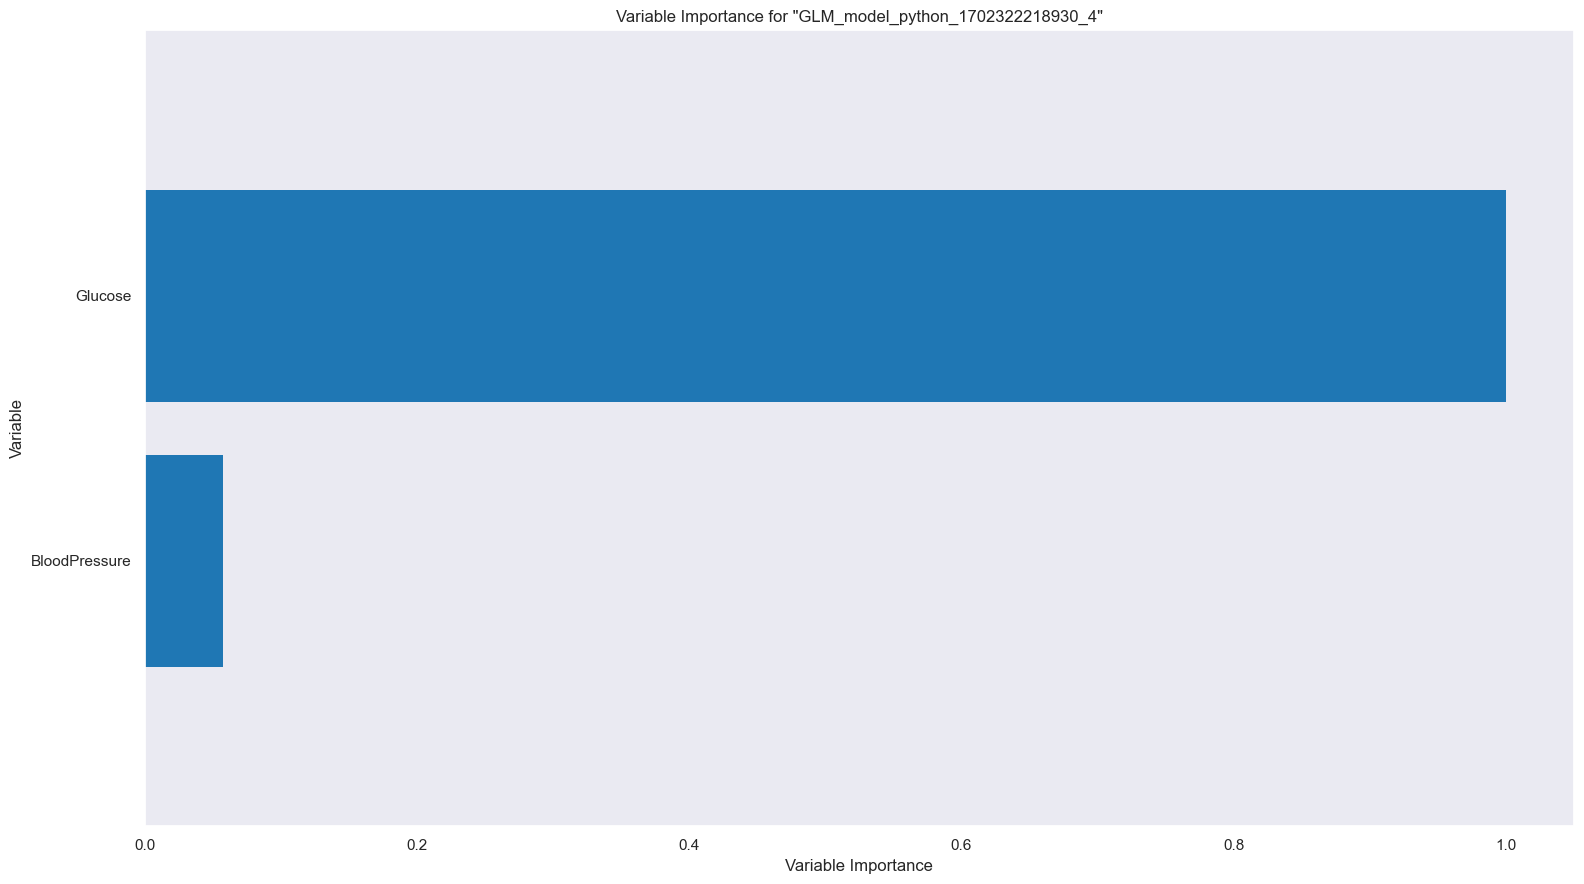

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

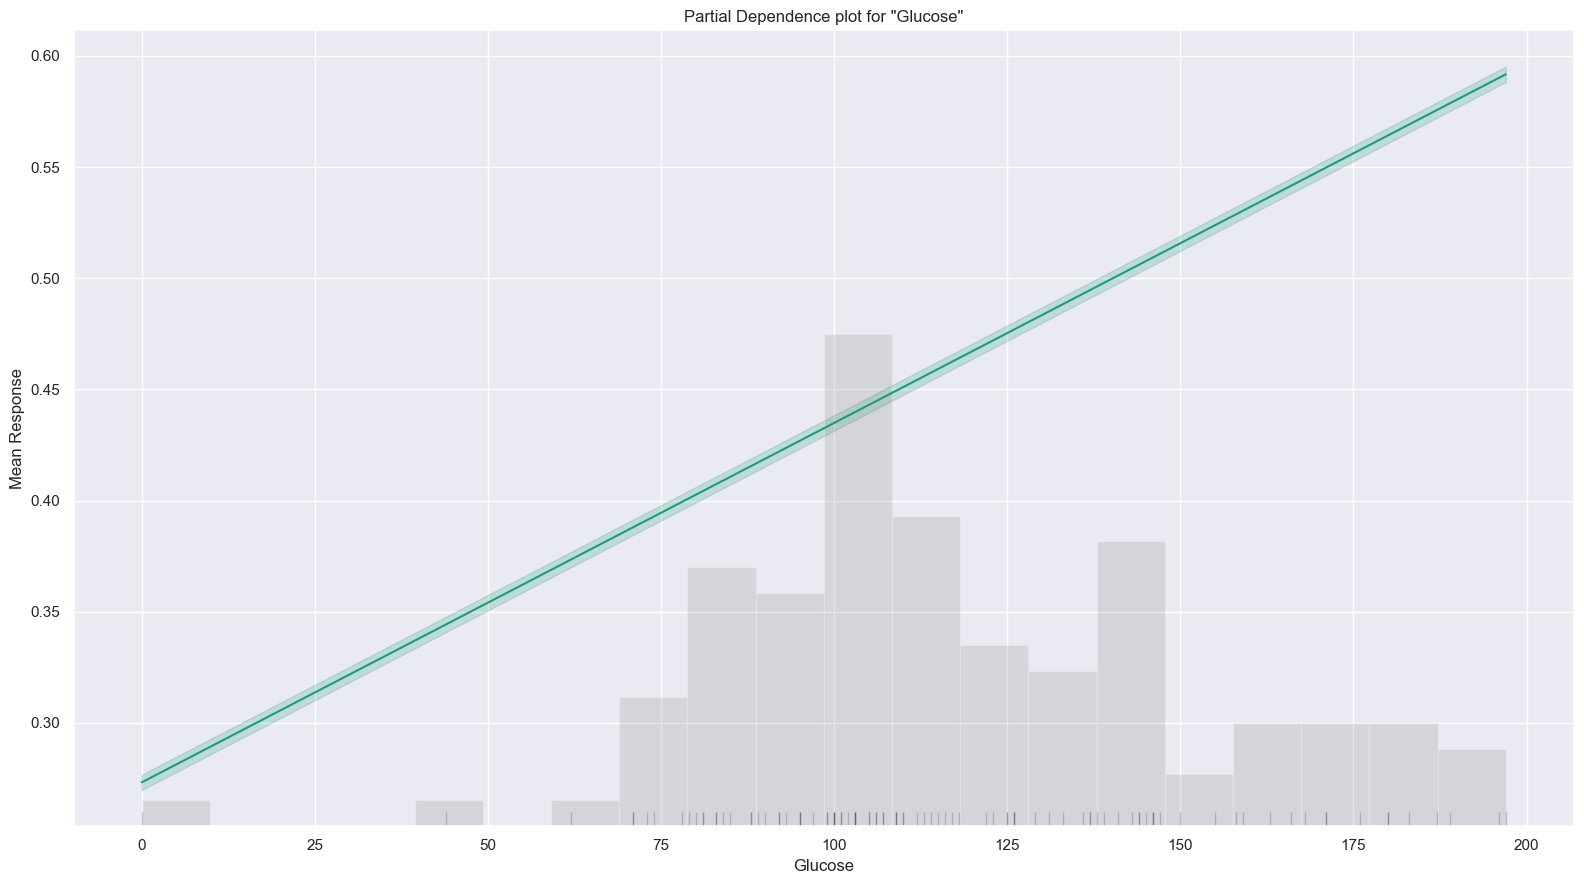

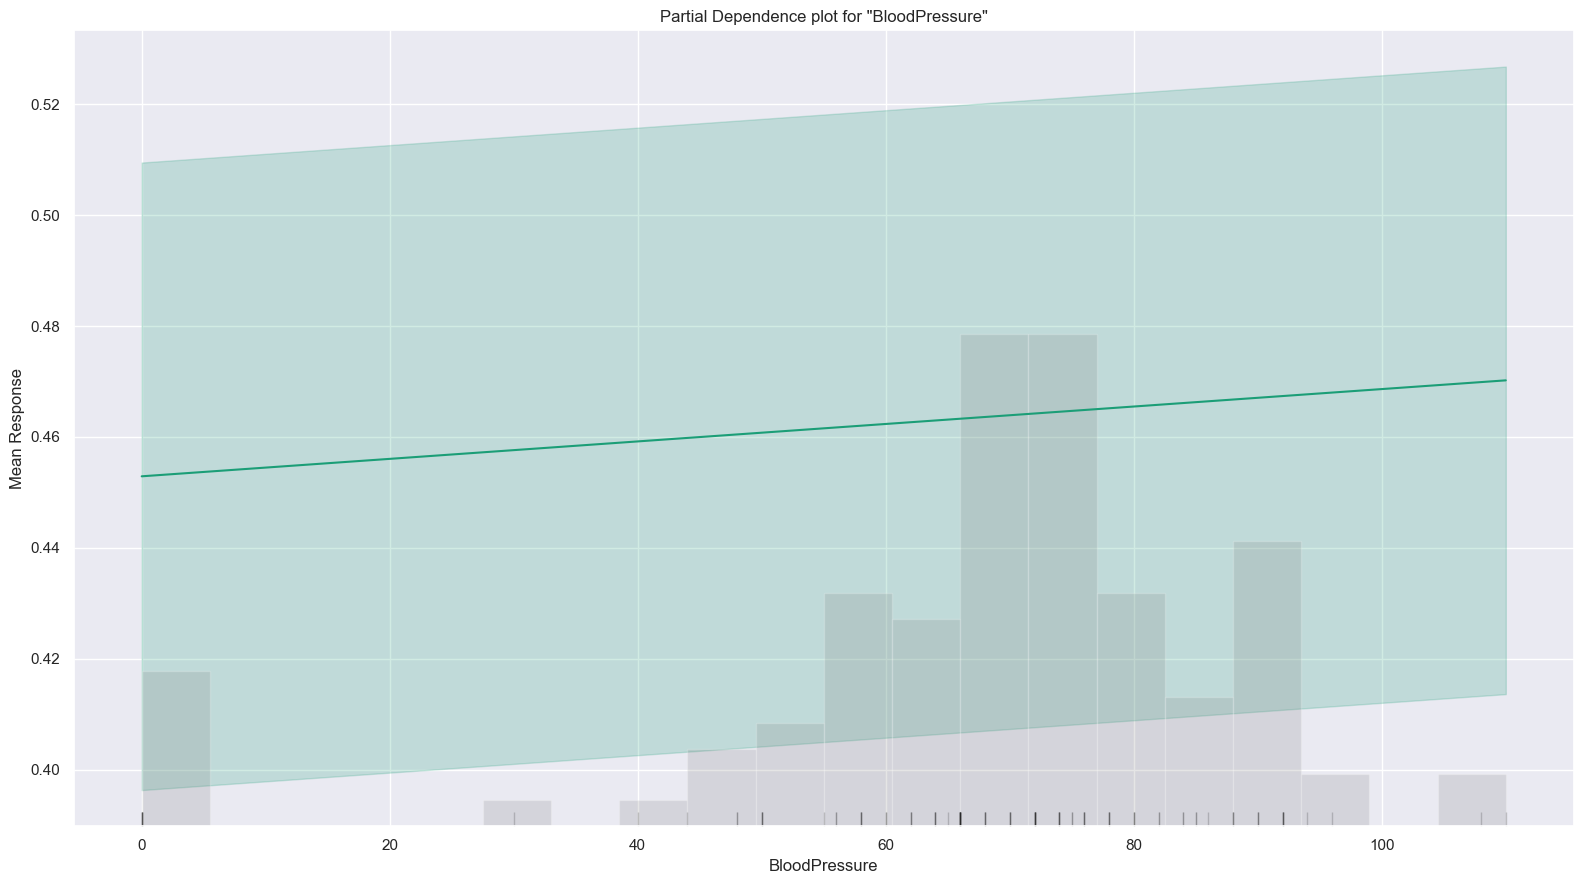

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

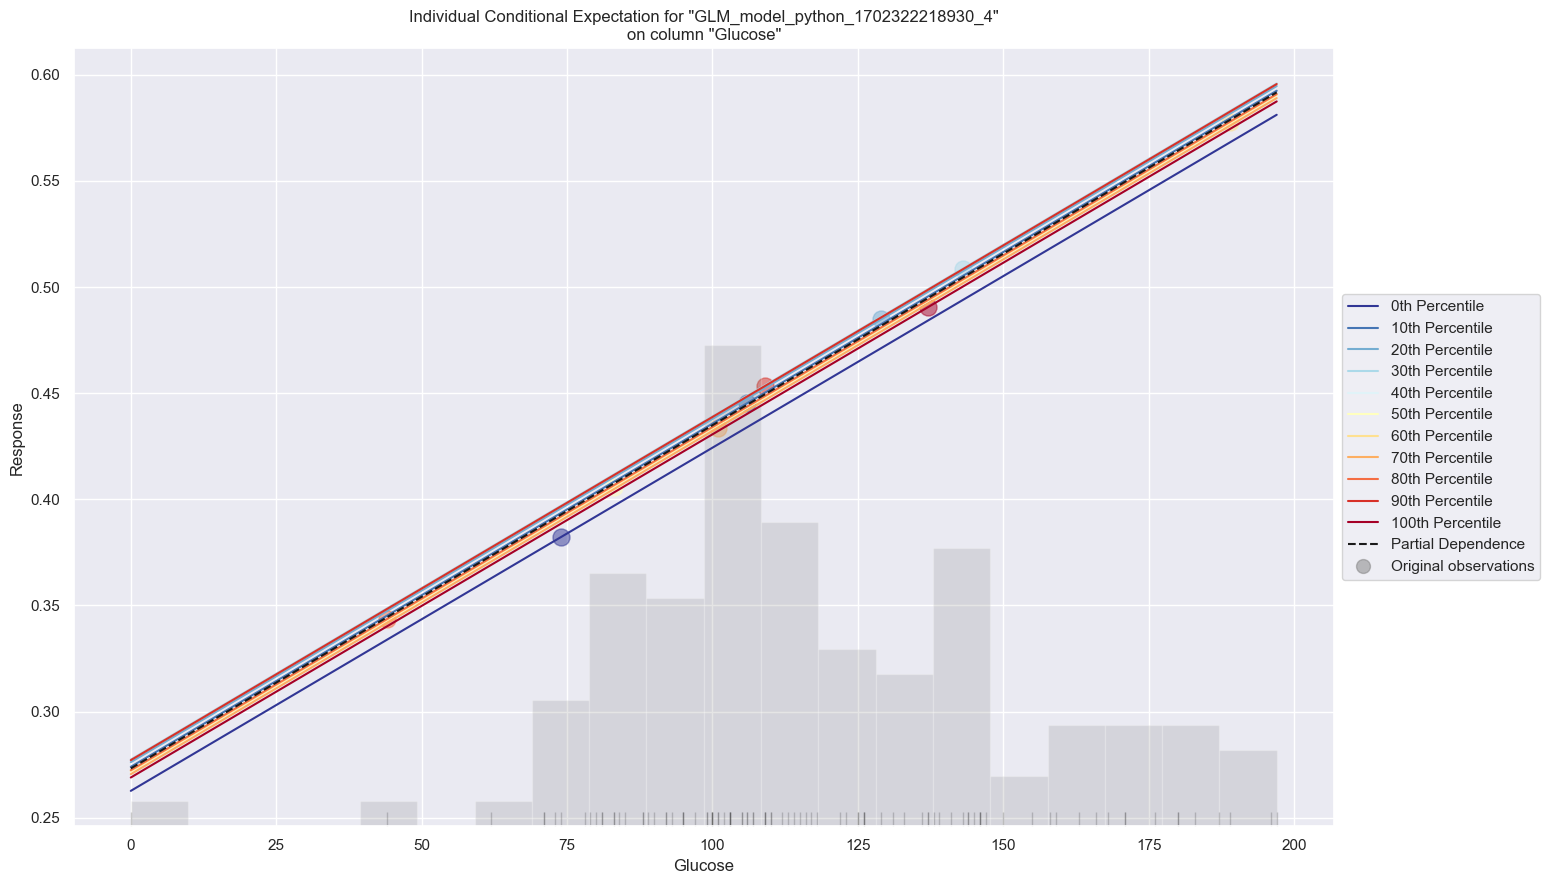

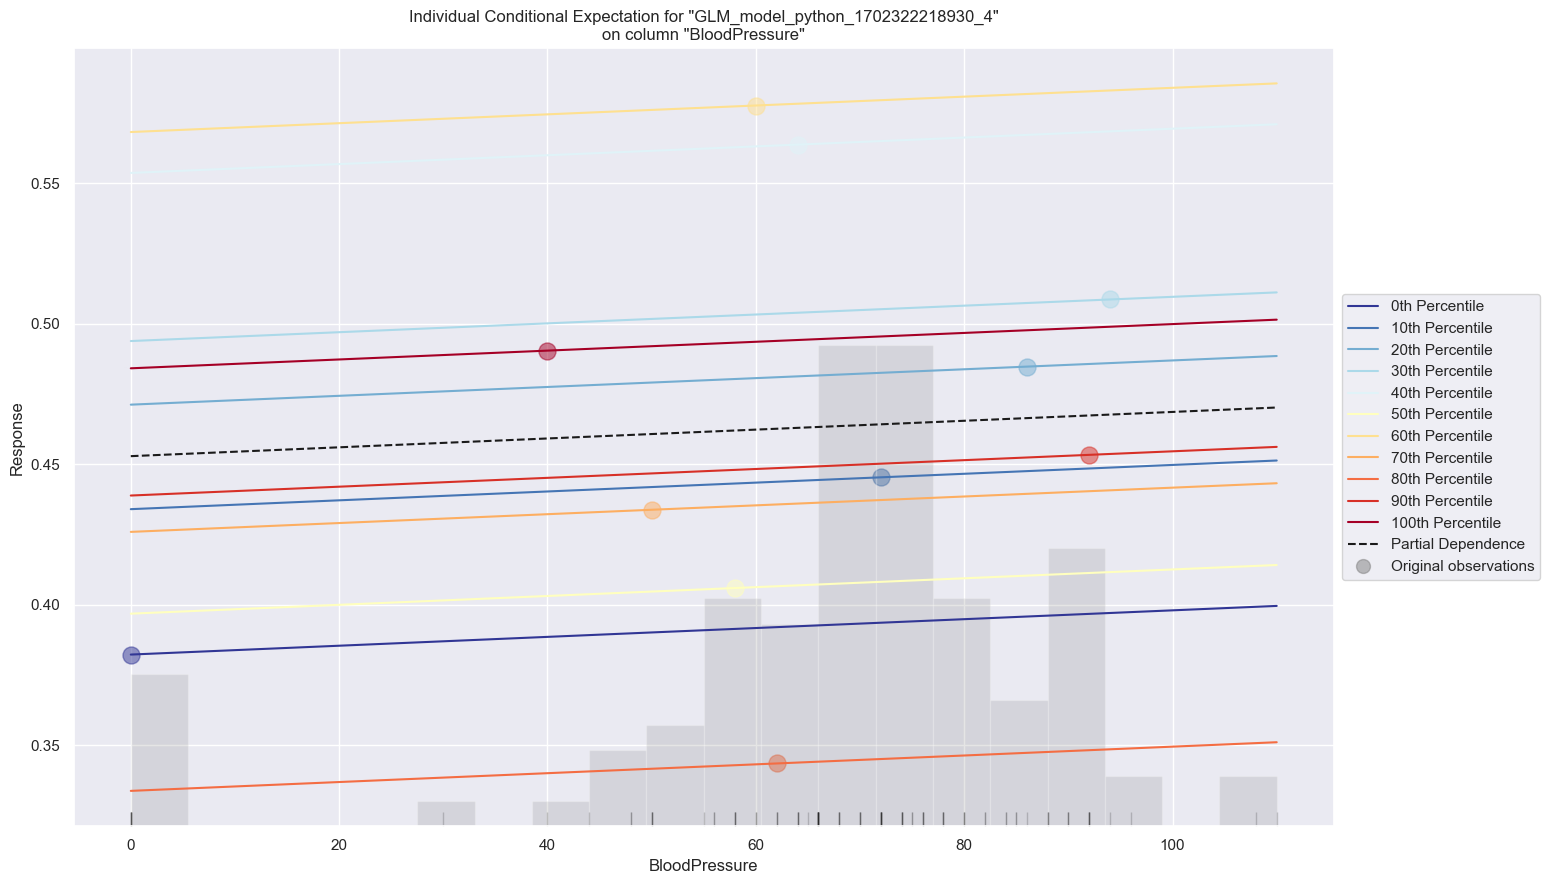

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [80]:
data_glm.explain(train[1:100,:])

The explanations generated by this method typically include details about how the model's coefficients (weights) for the predictor variables affect the predicted values. This can help to understand the relationship between the predictor variables and the response variable based on the specific data subset.

Keep in mind that model explanations can be valuable for model interpretation and understanding the drivers behind the model's predictions. It can provide insights into why the model is making certain predictions and how each predictor variable contributes to those predictions.

The specific content and format of the explanations may vary depending on the machine learning library or framework you are using. It's a valuable tool for understanding the inner workings of your GLM model.

In [81]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1702322218930_5


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          830                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.10193422295797808
RMSE: 0.31927139389237186
MAE: 0.2405377884364776
RMSLE: 0.1933370408372028
Mean Residual Deviance: 0.10193422295797808

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.15168727731282147
RMSE: 0.3894705089128334
MAE: 0.2859059387287783
RMSLE: 0.22705764850653906
Mean Residual Deviance: 0.15168727731282147

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-12-11 14:22:14  0.002 sec   0                  0.324894         0.242909        0.105556             0.38864            0.285157          0.151041
    2023-12-11 14:22:14  0.012 sec   1                  0.323942         0.242527        0.104938             0.388355           0.284626          0.150819
    2023-12-11 14:22:14  0.015 sec   2                  0.323169         0.24219         0.104438             0.38817            0.28415           0.150676
    2023-12-11 14:22:14  0.017 sec   3                  0.322479         0.241941        0.103993             0.388205           0.284026          0.150703
    2023-12-11 14:22:14  0.018 sec   4                  0.321889         0.24169         0.103613             0.3881             0.283648          0.150622
    2023-12-11 14:22:14  0.020 sec   5                  0.321337         0.241361        0.103258             0.388561           0.284621          0.15098
    2023-12-11 14:22:14  0.022 sec   6                  0.32082          0.241277        0.102926             0.388591           0.284514          0.151003
    2023-12-11 14:22:14  0.023 sec   7                  0.32038          0.240996        0.102644             0.389041           0.285417          0.151353
    2023-12-11 14:22:14  0.025 sec   8                  0.319969         0.240921        0.10238              0.389068           0.285332          0.151374
    2023-12-11 14:22:14  0.027 sec   9                  0.319599         0.24076         0.102144             0.389043           0.285065          0.151355
    2023-12-11 14:22:14  0.028 sec   10                 0.319271         0.240538        0.101934             0.389471           0.285906          0.151687

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Glucose        13.3249                1                    1
BloodPressure  0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

(1)Creating the GBM Model: 

a)data_gbm = H2OGradientBoostingEstimator(balance_classes=True, ntrees=10, max_depth=1, learn_rate=0.1, min_rows=

2): You are creating an instance of the H2OGradientBoostingEstimator class, which is used to build GBM models. This line initializes the GBM model with the following settings:

balance_classes=True: This parameter is set to True, which balances the class distribution in the dataset. It's often used for classification tasks to ensure that the model doesn't favor the majority class.

ntrees=10: This parameter specifies the number of trees (base learners) in the ensemble. In this case, you are building a GBM model with 10 trees. max_depth=1: This parameter sets the maximum depth of the individual trees. A max_depth of 1 indicates that the trees are shallow and have a single split. learn_rate=0.1: The learning rate controls the step size at each iteration when building the ensemble. A value of 0.1 is set here.

min_rows=2: This parameter defines the minimum number of observations (rows) required to create a node in a tree. Training the GBM Model:

data_gbm.train(x=myX, y=myY, training_frame=train, validation_frame=test): This line of code trains the GBM model using the specified data and parameters:

x=myX: You specify the predictor variables defined in myX. y=myY: You specify the response variable defined in myY. training_frame=train: The train dataset is used as the training data for building the model. The train dataset is typically a large portion of the data and is used for training the model. validation_frame=test: The test dataset is used for model validation. It helps assess the model's performance on data that it hasn't seen during training, which is essential for evaluating its generalization capability.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

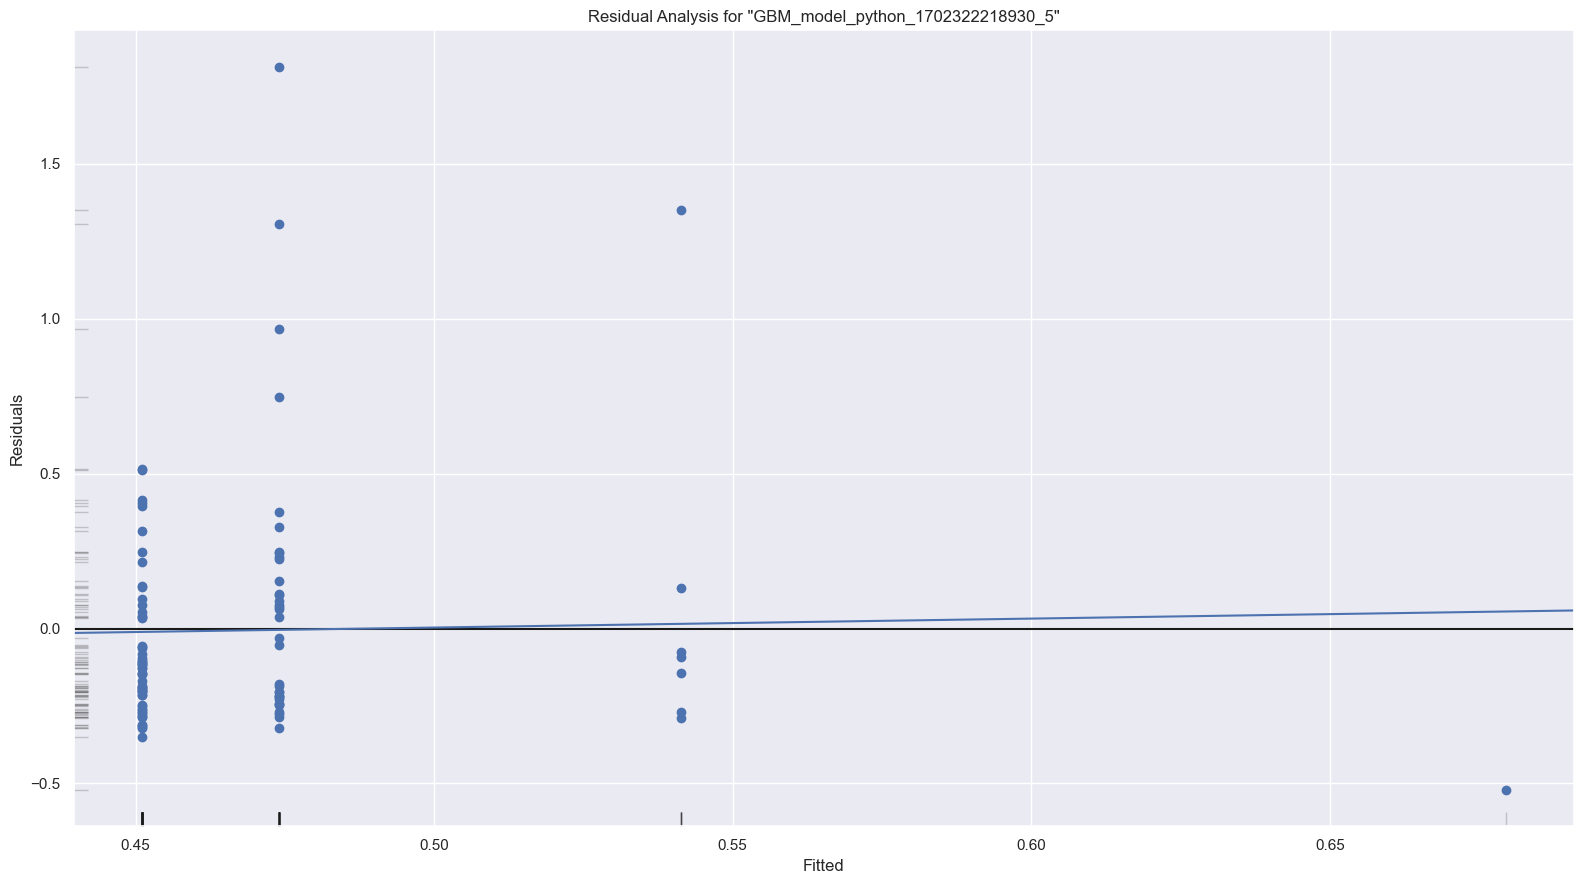

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

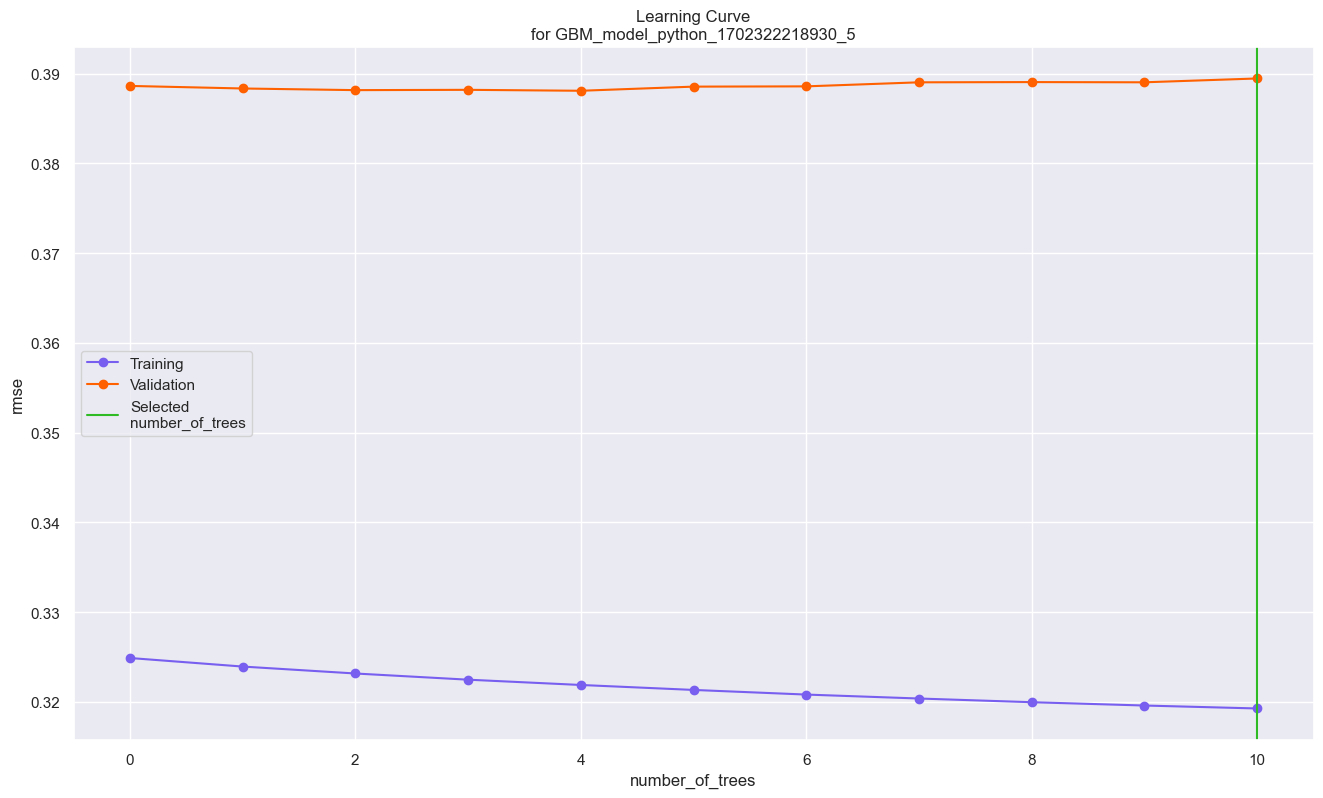

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

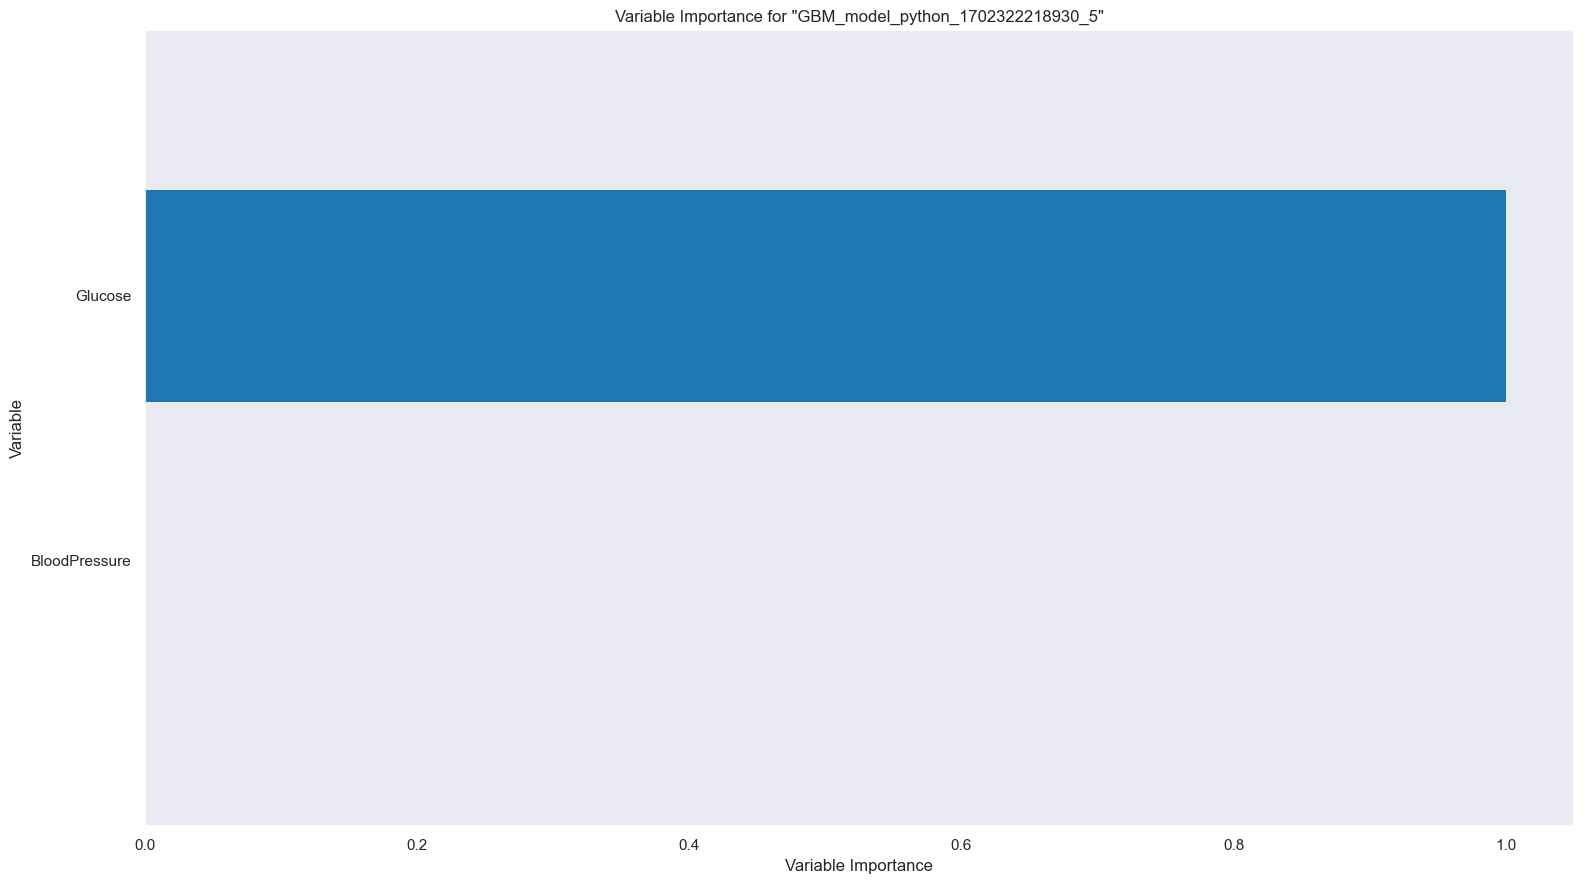

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

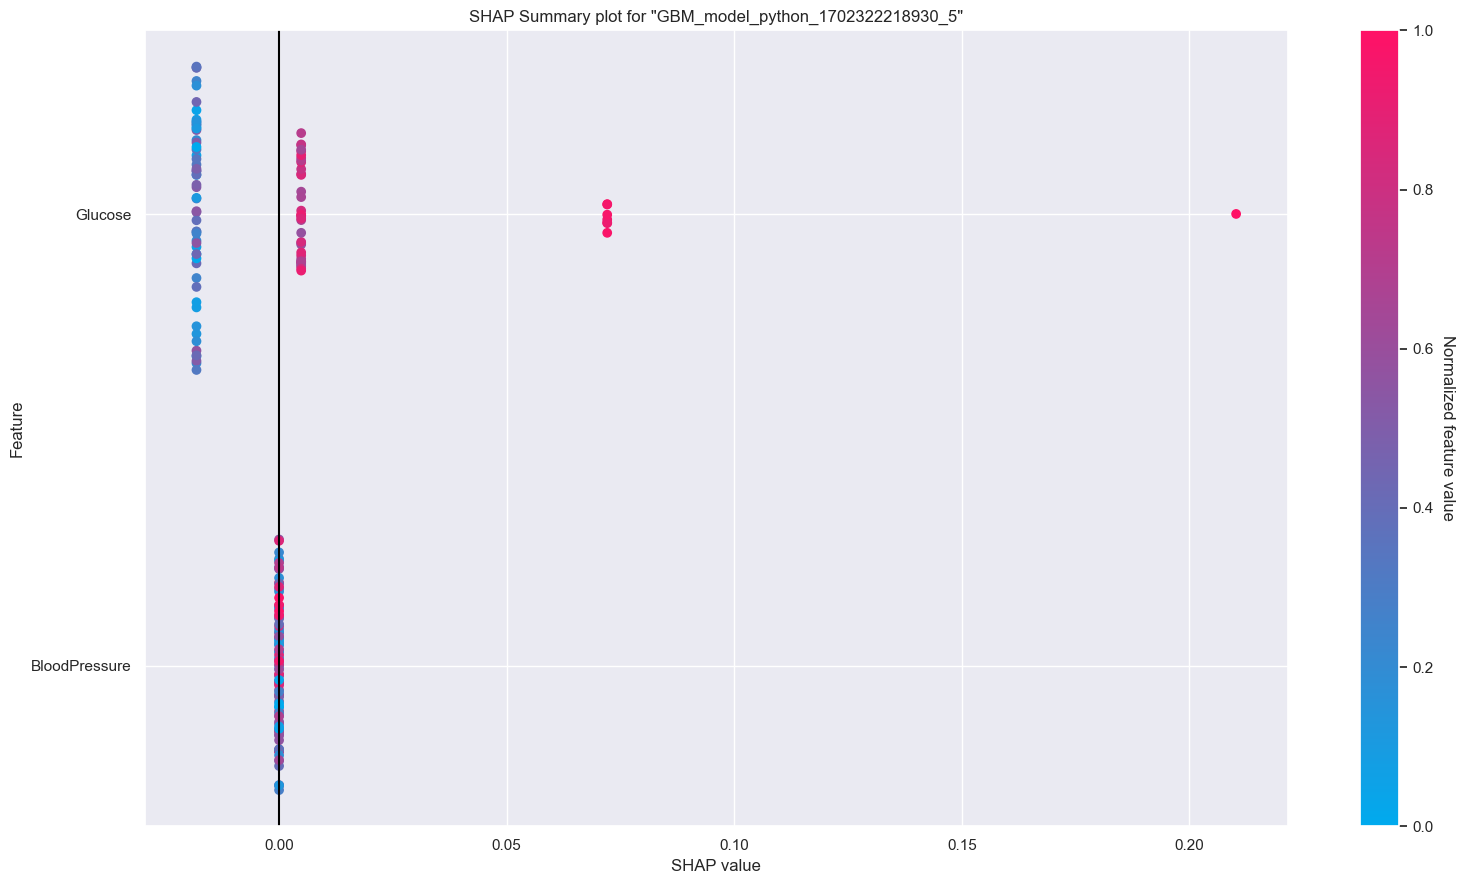

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

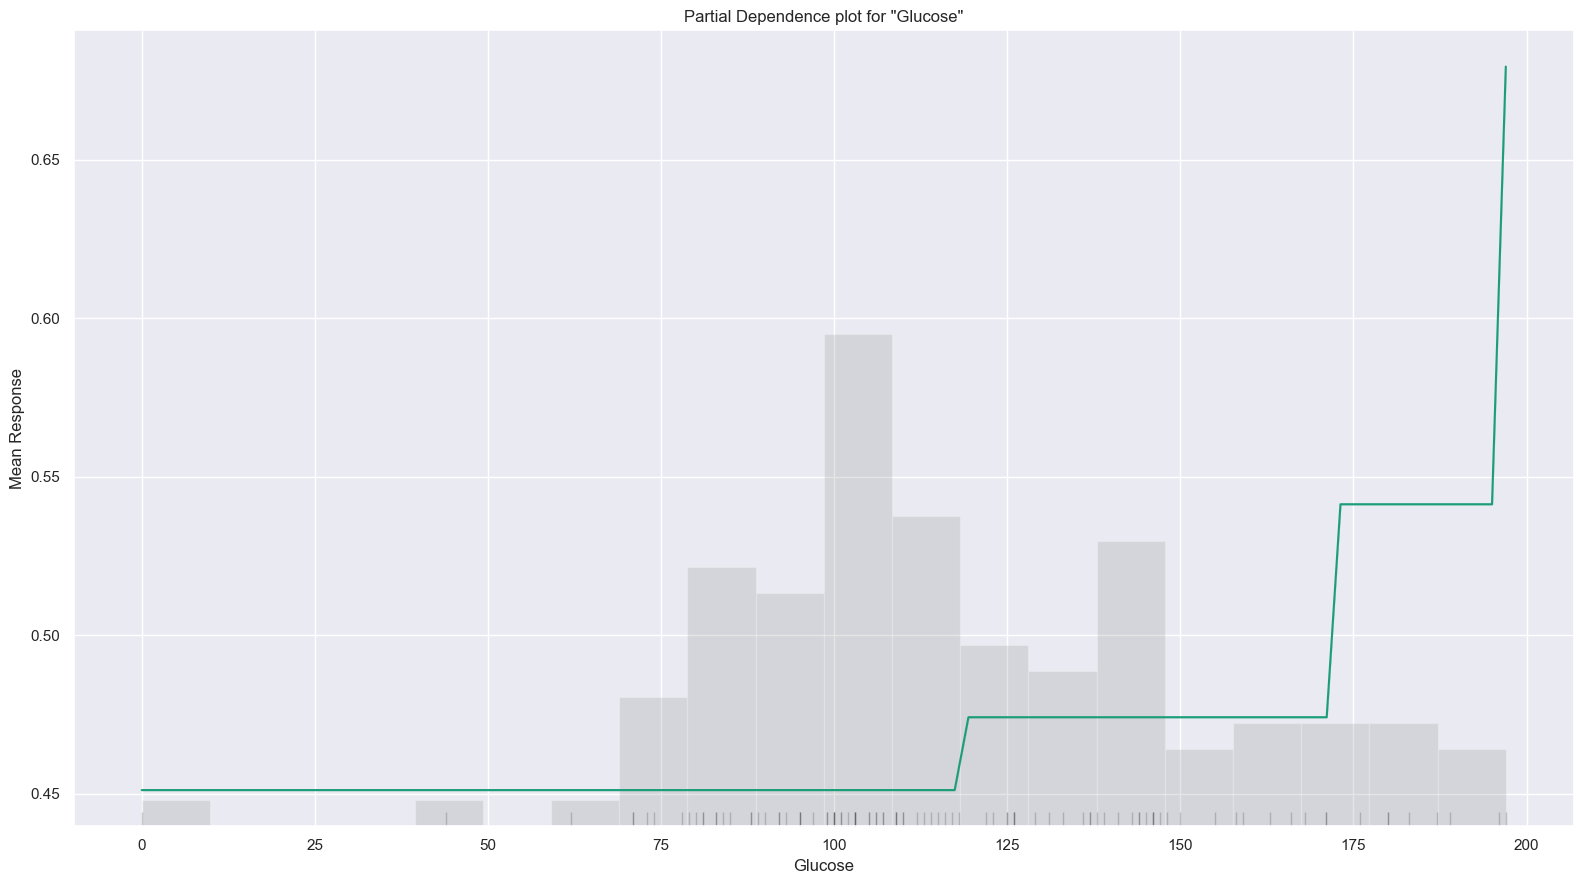

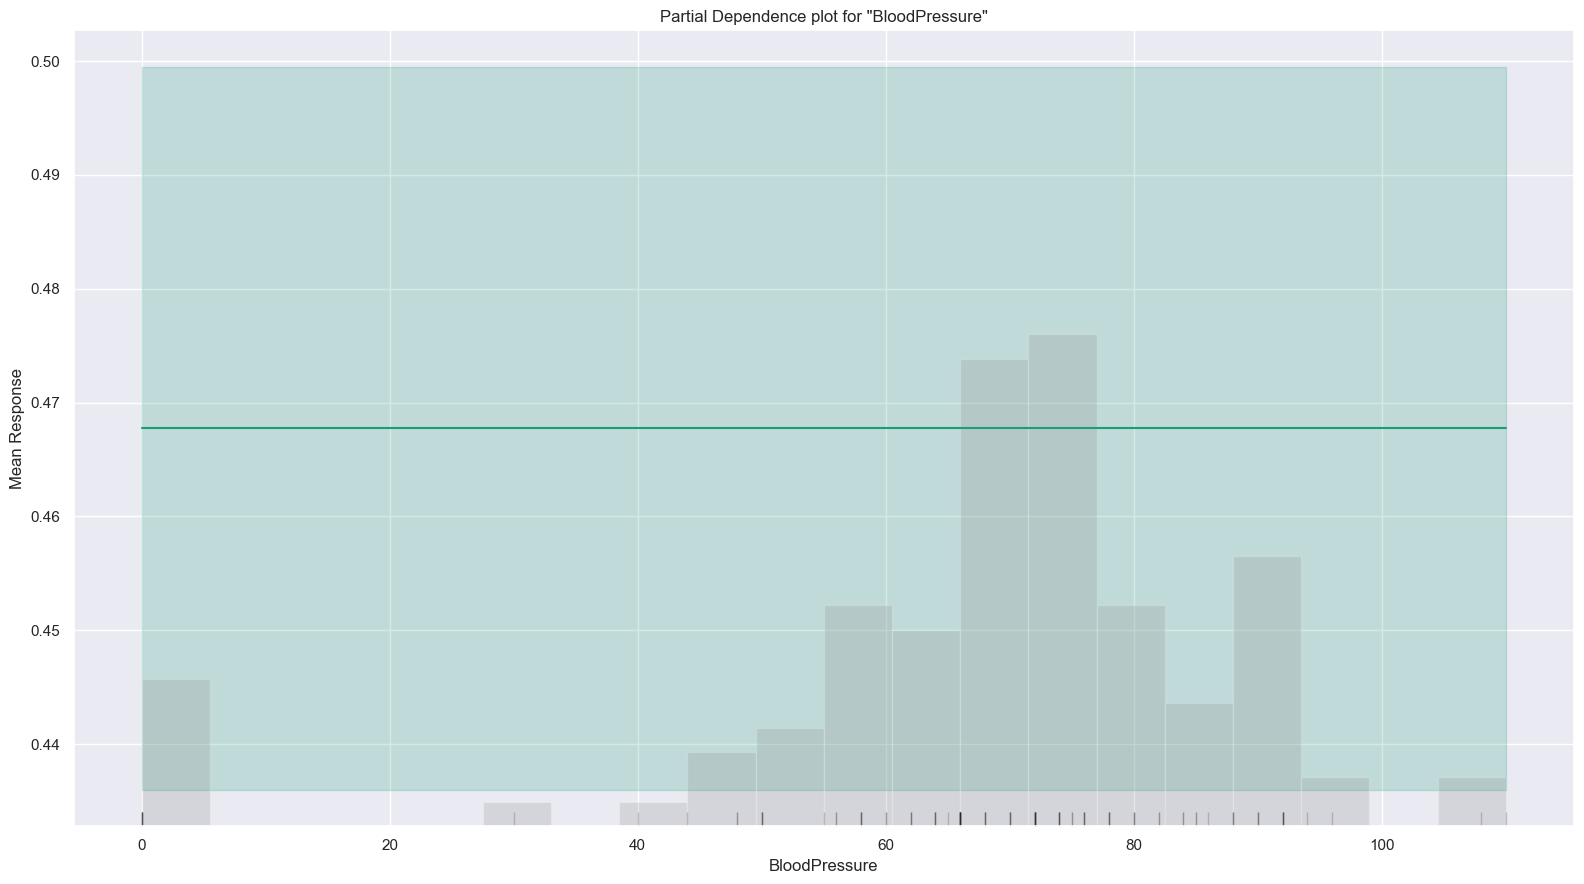

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

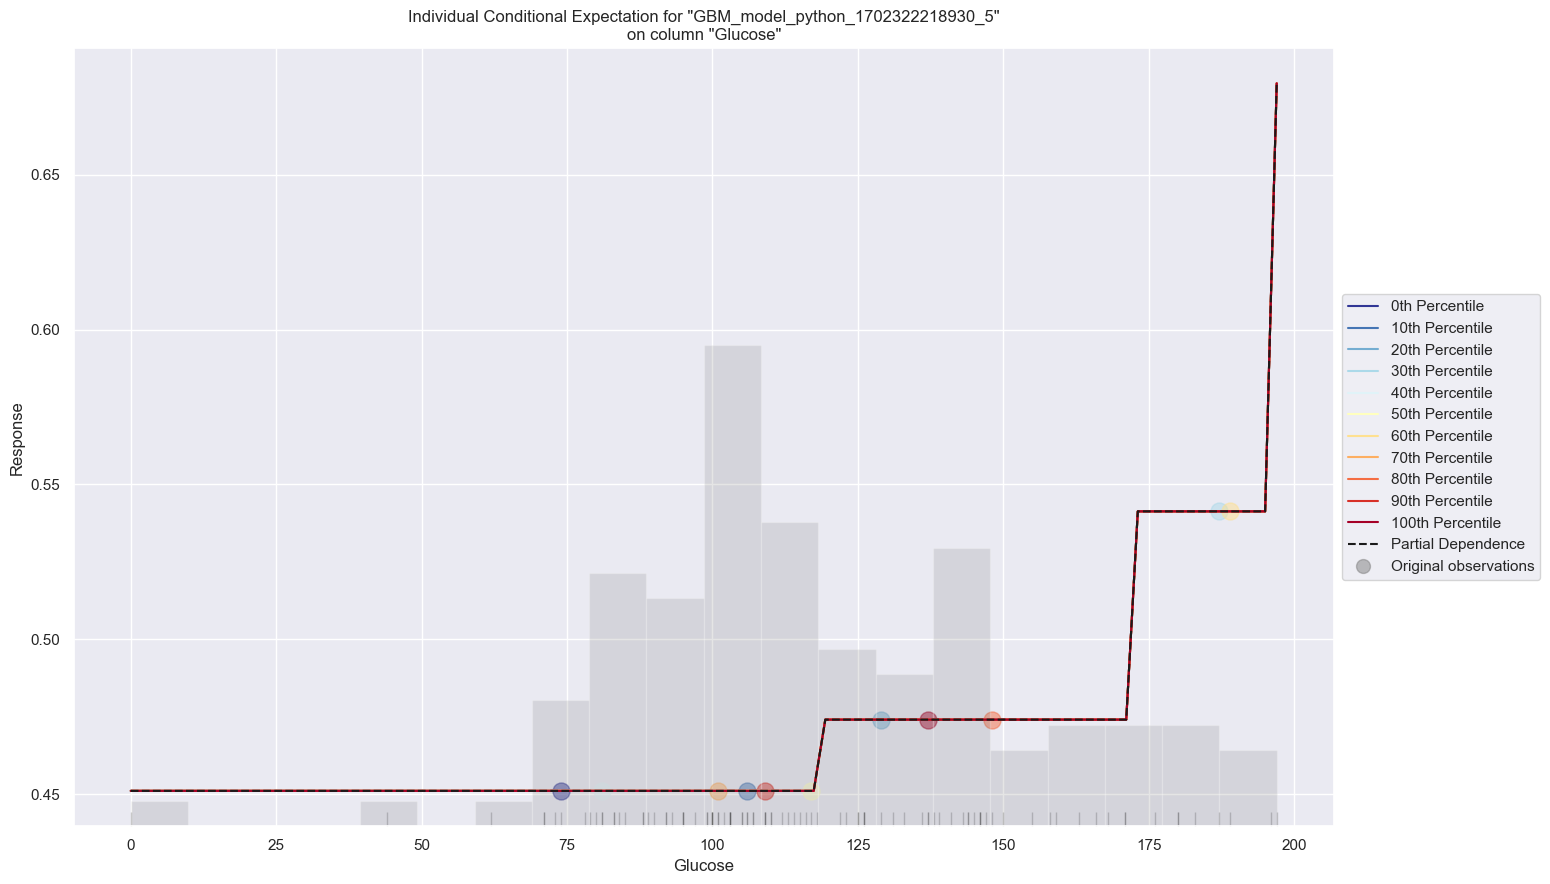

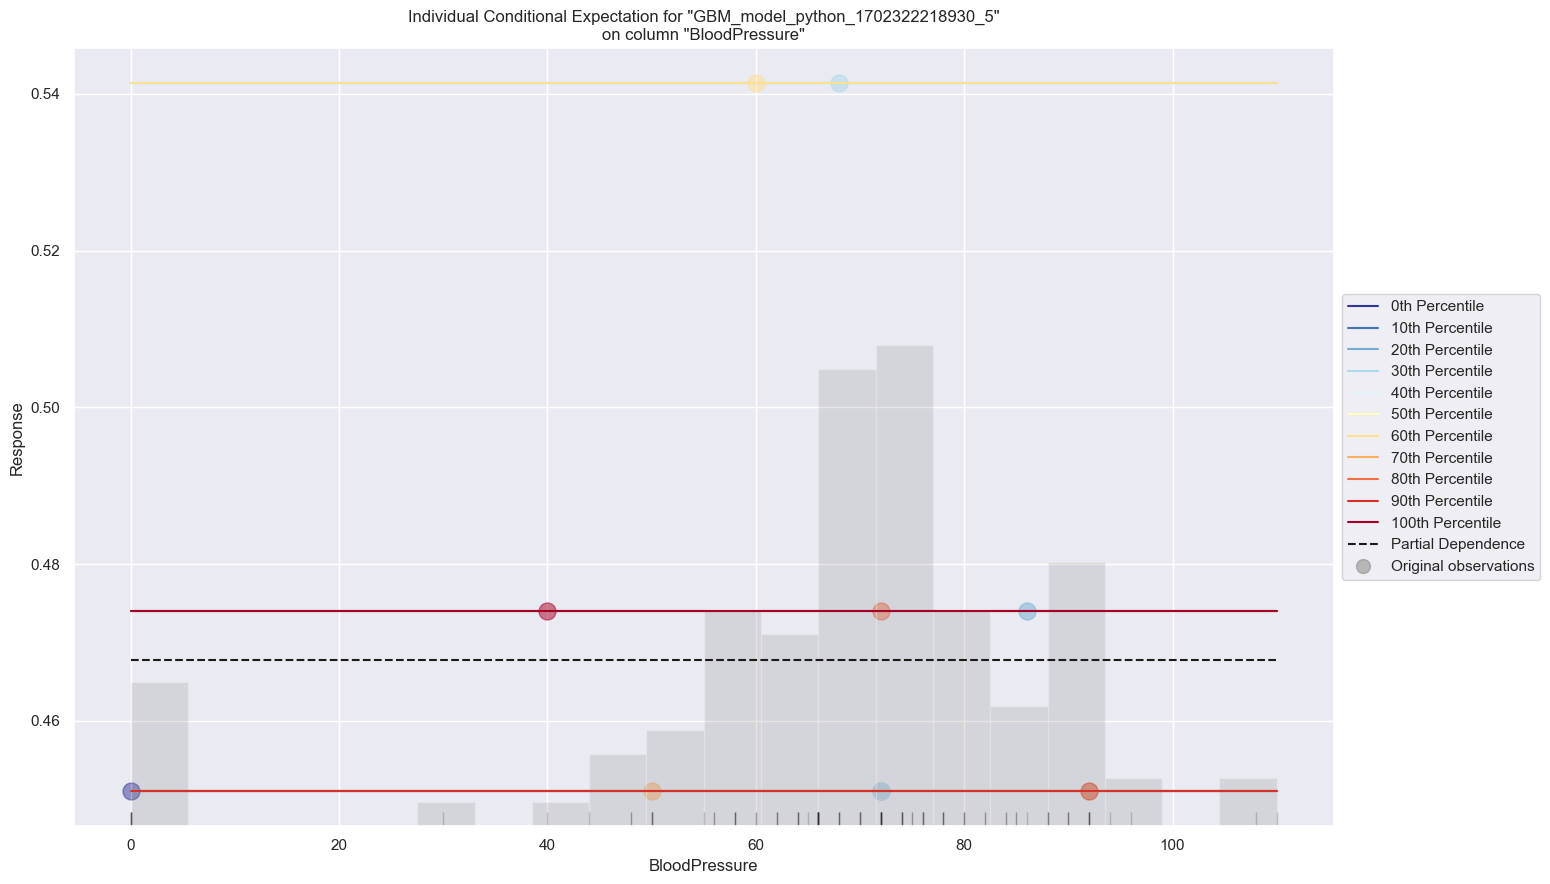

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [82]:
data_gbm.explain(train[0:100,:])

We're using a method called explain on a model named best_model with training data "data_train". However, the specific implementation of the explain method and its parameters depend on the machine learning library or framework we're using. Different libraries may have different ways of implementing model explanation methods.

The data_gbm.explain(train[0:100,:]) code is used to generate explanations for the Gradient Boosting Machine (GBM) model using a subset of the training data. Let's break down what this code does:

data_gbm: This is the GBM model that you previously trained.
.explain(train[0:100,:]): This method is used to explain or provide insights into how the GBM model makes predictions based on a specific dataset. In this case, you are providing it with a subset of the training data, specifically the first 100 rows (observations), denoted as train[0:100, :]. This subset is used to generate explanations for a limited set of data points.

In [83]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor     |   Normalized Coefficient |
|---------------+--------------------------|
| Intercept     |               0.469232   |
| Glucose       |               0.0521159  |
| BloodPressure |               0.00302387 |


# Let's break down what this code does:
1)Calculating Variable Importances for GLM: glm_varimp = data_glm.coef_norm(): This line of code calculates the normalized coefficients for the GLM model. The coef_norm method returns a dictionary where the keys are the predictor variables, and the values are the normalized coefficients. These coefficients indicate the impact of each predictor variable on the response variable.

2)Calculating the Magnitude of Coefficients: for k, v in iteritems(glm_varimp): glm_varimp[k] = abs(glm_varimp[k]): This loop iterates through the dictionary of normalized coefficients (glm_varimp) and calculates the absolute (magnitude) value of each coefficient. This step ensures that both positive and negative coefficients are considered when measuring variable importance. Sorting the Coefficients:

3)glm_sorted = sorted(glm_varimp.items(), key=operator.itemgetter(1), reverse=True): After calculating the magnitudes of the coefficients, this line of code sorts the coefficients in descending order based on their magnitude. This sorting allows you to identify the most important predictor variables, with the largest magnitudes, first.

4)Displaying Variable Importances: table = tabulate(glm_sorted, headers=["Predictor", "Normalized Coefficient"], tablefmt="orgtbl"): The code uses the tabulate function to format and display the sorted coefficients in a tabular format. The table includes two columns: "Predictor" (the name of the predictor variable) and "Normalized Coefficient" (the magnitude of the coefficient). This table provides a clear view of the variable importances.

5)Printing the Variable Importances: print("Variable Importances:\n\n" + table): This line prints the table of variable importances to the console, making it visible for analysis.

In [84]:
data_glm.varimp()

[('Glucose', 0.05211593583226204, 1.0, 0.9451598918682438),
 ('BloodPressure',
  0.003023873083293438,
  0.058022043258053296,
  0.054840108131756216)]

# Here's a breakdown of what the function does:

1-Obtaining Variable Importances: data_glm.varimp(): This function call calculates and returns the variable importances for the GLM model stored in the data_glm object.

2-Variable Importance Information: The function returns a list of dictionaries, where each dictionary contains the following information for a predictor variable: 

a)"variable": The name of the predictor variable. 

b)"relative_importance": The relative importance score, indicating the impact of the variable on the model's predictions. c)"scaled_importance": The scaled importance score, which is the relative importance normalized to sum to 1. This provides a relative ranking of variable importance.

In [85]:
#importance of variables (predictor variables)
data_gbm.varimp()

[('Glucose', 13.324934005737305, 1.0, 1.0), ('BloodPressure', 0.0, 0.0, 0.0)]

The data_gbm.varimp() function is used to obtain the variable importances from a Gradient Boosting Machine (GBM) model in H2O. Variable importances provide information about the impact of each predictor variable on the model's predictions. This function returns a list of dictionaries, where each dictionary contains information about a predictor variable and its importance.

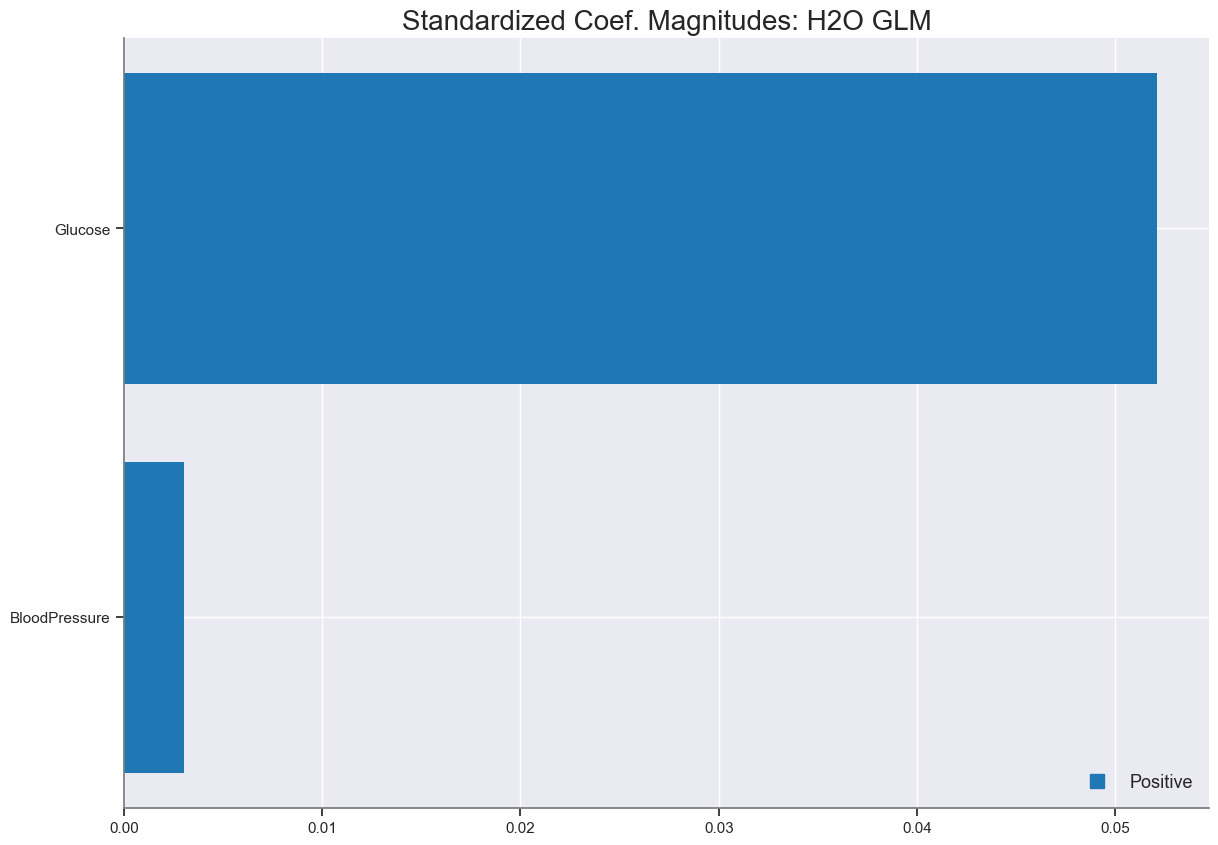

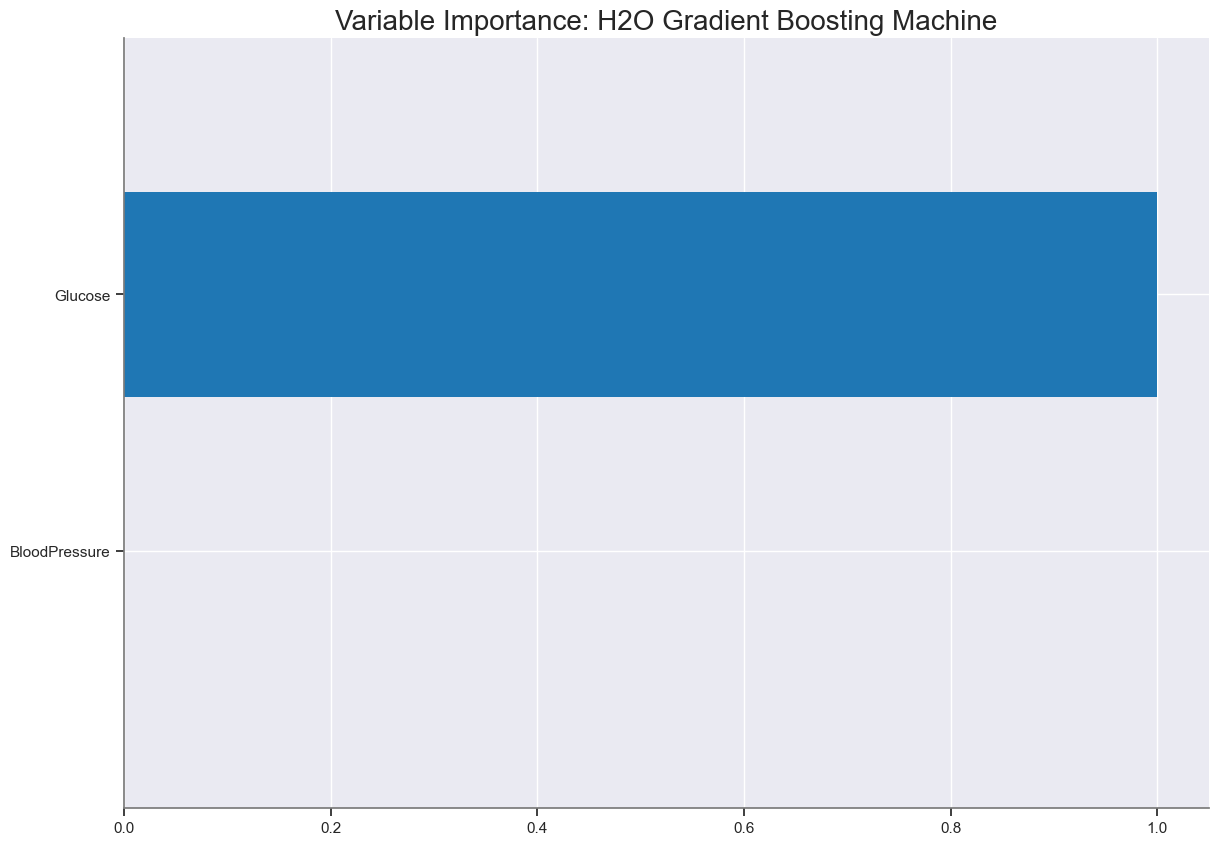

<Figure size 800x400 with 0 Axes>

In [86]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

# The code I provided consists of two commands related to the visualization of model information:

a)data_glm.std_coef_plot(): This command is used to create a standard coefficient plot for the Generalized Linear Model (GLM) represented by the data_glm object. The standard coefficient plot visualizes the standardized coefficients for each predictor variable in the GLM. It allows to assess the importance and direction (positive or negative) of each predictor variable's impact on the response variable.

b)data_gbm.varimp_plot(): This command is used to create a variable importance plot for the Gradient Boosting Machine (GBM) model represented by the data_gbm object. The variable importance plot displays the relative importance of each predictor variable in the GBM model. It helps you identify which predictor variables have the most significant impact on the model's predictions. 

In [87]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.15168727731282147
RMSE: 0.3894705089128334
MAE: 0.2859059387287783
RMSLE: 0.22705764850653906
Mean Residual Deviance: 0.15168727731282147

# data_gbm.model_performance(test), it generates a set of performance metrics and statistics based on how well the model's predictions match the actual values in the test dataset.

In [88]:
#check the model performance of glm test dataset
data_glm.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.15642406575088144
RMSE: 0.39550482392871195
MAE: 0.28999760788366835
RMSLE: 0.23136730826194196
Mean Residual Deviance: 0.15642406575088144
R^2: -0.04161490265314449
Null degrees of freedom: 68
Residual degrees of freedom: 66
Null deviance: 10.421827577203587
Residual deviance: 10.79326053681082
AIC: 75.80578089841664

Here's what this code does:

data_glm: This is the GLM model that you previously trained.

model_performance(test): This method is used to generate a set of performance metrics and statistics based on how well the GLM model's predictions match the actual values in the test dataset. The test dataset is typically a subset of the data that the model has not seen during training, and it is used to assess the model's generalization performance.

In [89]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='DiabetesPedigreeFunction']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

The get_independent_variables function appears to be a custom function that is designed to extract the independent variables (predictor variables) from a dataset, excluding the response variable (targ) and a specific variable named 'DiabetesPedigreeFunction'.

In [90]:
#getting dependent and independent variables
X=get_independent_variables(train, myY) 
print(X)
print(myY)

['Glucose', 'BloodPressure']
DiabetesPedigreeFunction


The purpose of this code is to extract the independent variables from the train dataset and store their names in the X variable. It is a common step in preparing data for machine learning, as we need to specify which variables will be used as predictors (independent variables) and which one will be the target (response variable).

In [91]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

Here's what the code does:

run_time=333: This line defines the maximum runtime in seconds for the AutoML experiment. The variable run_time is set to 333 seconds, which means that the AutoML experiment will run for a maximum of 333 seconds (approximately 5 minutes and 33 seconds).

aml = H2OAutoML(max_runtime_secs=run_time): This line initializes an AutoML object named aml. We are using the H2OAutoML class from the H2O library. The max_runtime_secs parameter is set to the value of the run_time variable, which specifies the maximum runtime for the AutoML experiment.

In [92]:
model_start_time = time.time()
  
aml.train(x=X,y=myY,training_frame=train) 

AutoML progress: |
14:24:48.458: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20231211_142448_model_4


Status of Neuron Layers: predicting DiabetesPedigreeFunction, regression, gaussian distribution, Quadratic loss, 81 weights/biases, 4.1 KB, 6,996,990 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate               rate_rms                momentum    mean_weight           weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ----------------------  ----------------------  ----------  --------------------  -------------------  ------------------  -----------------------
    1        2        Input             15.0
    2        20       RectifierDropout  40.0       0.0   0.0   0.006959440470291156    0.024684958159923553    0.0         0.15925864252785688   0.39629602432250977  0.2478801298415795  0.23009121417999268
    3        1        Linear                       0.0   0.0   0.00023359361698567228  0.00028363976161926985  0.0         -0.12411108628293732  0.20295292139053345  0.0802929269486881  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.10279066719431659
RMSE: 0.32060983639669666
MAE: 0.2384324284057724
RMSLE: 0.19328536301297602
Mean Residual Deviance: 0.10279066719431659

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.10334927685706155
RMSE: 0.32147982340585785
MAE: 0.2397643477358665
RMSLE: 0.19405749229248034
Mean Residual Deviance: 0.10334927685706155

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.239801  0.0148784  0.23749       0.226584      0.235864      0.233714      0.265352
mean_residual_deviance  0.103419  0.0280941  0.0870581     0.0891079     0.102421      0.0862232     0.152285
mse                     0.103419  0.0280941  0.0870581     0.0891079     0.102421      0.0862232     0.152285
r2                      0.01372   0.0333847  0.0275167     0.0345167     0.00631321    -0.0411703    0.0414239
residual_deviance       0.103419  0.0280941  0.0870581     0.0891079     0.102421      0.0862232     0.152285
rmse                    0.319495  0.0409606  0.295056      0.298509      0.320033      0.293638      0.390238
rmsle                   0.193712  0.0135859  0.187232      0.185212      0.191873      0.186643      0.217602

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-12-11 14:25:38  0.000 sec                     0         0             0            nan              nan                  nan             nan
    2023-12-11 14:25:38  47.809 sec  1398000 obs/sec   10        1             6990         0.322718         0.104147             0.238198        0.0133493
    2023-12-11 14:25:42  51.291 sec  2006593 obs/sec   10010     1001          6.99699e+06  0.32061          0.102791             0.238432        0.0261993

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
BloodPressure  1                      1                    0.70548
Glucose        0.417475               0.417475             0.29452

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# In above command we have implemented and get cross validations,scoring history

model_start_time = time.time(): This line records the current time (in seconds) using the time.time() function and stores it in the model_start_time variable. This time serves as a reference point for measuring how long the AutoML training process takes.

aml.train(x=X, y=myY, training_frame=train): This line initiates the AutoML training process.

In [93]:
#getting the time of execution of model and that to is total time
execution_time = time.time() - model_start_time
print(execution_time)

348.3828709125519


execution_time = time.time() - model_start_time: This line calculates the execution time of the AutoML training process by subtracting the model_start_time (the start time of the training process) from the current time, obtained using time.time(). The result is stored in the execution_time variable, representing the total time taken for the AutoML training process to complete.

print(execution_time): This line prints the execution_time to the console. It shows the duration in seconds for how long the AutoML training process ran.

The execution_time provides valuable information about the time it took to search for and evaluate various machine learning models using AutoML. It is helpful for assessing the efficiency of the model selection process, especially when we have limited time or computational resources and need to monitor the runtime of the experiment.

In [94]:
#to find the aml leaderboard
print(aml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20231211_142448_model_4     0.32148   0.103349  0.239764  0.194057                  0.103349
DeepLearning_grid_1_AutoML_1_20231211_142448_model_10    0.321772  0.103537  0.237536  0.193483                  0.103537
StackedEnsemble_BestOfFamily_7_AutoML_1_20231211_142448  0.321859  0.103593  0.242064  0.195136                  0.103593
DeepLearning_grid_1_AutoML_1_20231211_142448_model_11    0.322287  0.103869  0.241757  0.195243                  0.103869
DeepLearning_grid_1_AutoML_1_20231211_142448_model_8     0.322298  0.103876  0.239919  0.194756                  0.103876
DeepLearning_grid_1_AutoML_1_20231211_142448_model_9     0.322305  0.10388   0.239252  0.194683                  0.10388
DeepLearning_grid_1_AutoML_1_20231211_142448_model_13    0.32232   0.10389   0.242004  0.195277                  0.10389
GLM_1_AutoML_1_20231211_14

The aml.leaderboard command is used to display the leaderboard of models generated by the H2O AutoML experiment. The leaderboard provides a summary of the performance of various machine learning models that were automatically trained and evaluated during the AutoML process.

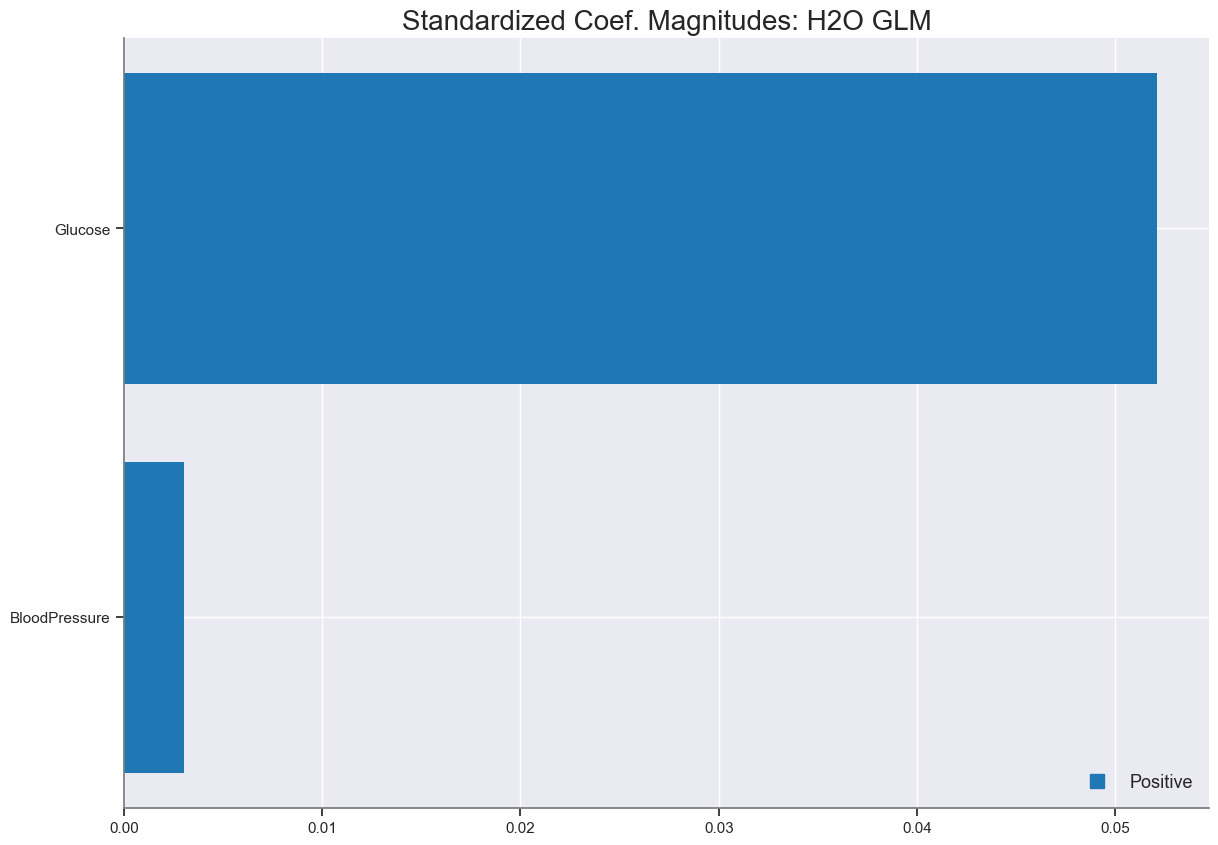

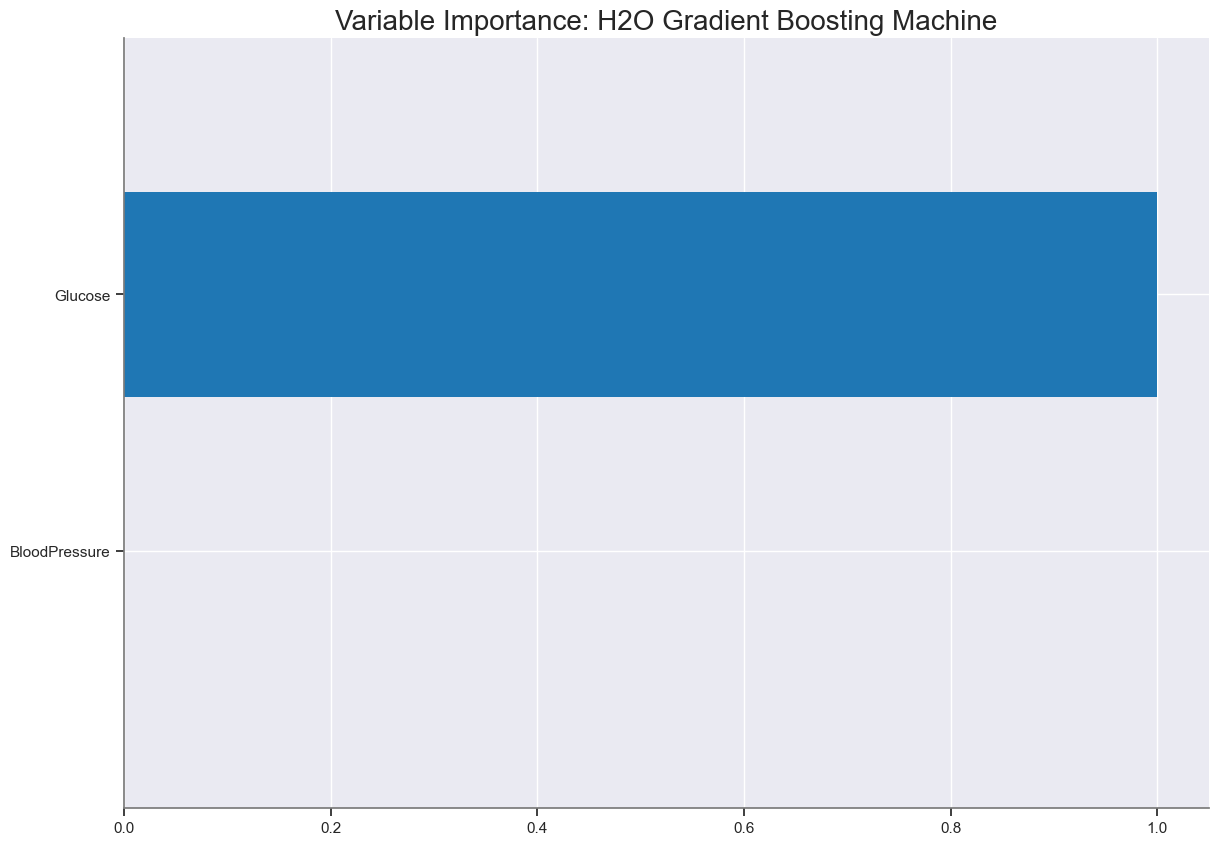

<Figure size 800x400 with 0 Axes>

In [95]:
#to retrive the variable importance
data_glm.std_coef_plot()
data_gbm.varimp_plot()

##The provided code contains two commands to create plots for model analysis and interpretation:

data_glm.std_coef_plot(): This command generates a standard coefficient plot for the Generalized Linear Model (GLM) represented by the data_glm object. The standard coefficient plot displays the standardized coefficients for each predictor variable in the GLM. These coefficients indicate the impact and direction (positive or negative) of each predictor variable on the response variable.

data_gbm.varimp_plot(): This command creates a variable importance plot for the Gradient Boosting Machine (GBM) model represented by the data_gbm object. The variable importance plot visualizes the relative importance of each predictor variable in the GBM model. It helps identify which predictor variables have the most significant impact on the model's predictions.

Both of these plots are valuable for model interpretation and understanding the role of individual predictor variables in the model's performance. They provide insights into feature importance, their direction of influence, and their relative significance in the model. These plots can assist in feature selection, identifying strong predictors, and understanding the relationships between variables in our machine learning models.

In [96]:
#to depict best model in h2o
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [97]:
best_model.algo

'deeplearning'

we are retrieving the best-performing model from the leaderboard generated by the H2O AutoML experiment.

In [98]:
#if else conditions 
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DeepLearning_grid_1_AutoML_1_20231211_142448_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/DeepLearning_grid_1_AutoML_1_20231211_142448_model_4'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20231211_142448_training_py_15_sid_b863', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20231211_142448_training_py_15_sid_b863'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20231211_142448_training_py_15_sid_b863', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20231211_142448_training_py_15_sid_b863'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_mod

In [99]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

variable  relative_importance  scaled_importance  percentage
0  BloodPressure             1.000000           1.000000    0.605394
1        Glucose             0.651818           0.651818    0.394606

aml.leaderboard[5,'model_id']: This expression accesses the model identifier in the sixth row (position 5) of the AutoML leaderboard. It retrieves the unique identifier for a specific model ranked at that position.

In [100]:
h2o.cluster().shutdown()

H2O session _sid_b863 closed.


In above snippet it is important to shutdown automl in order to perform further operations on the project such as model interpretability which we will begin now.

In [102]:
datasetA.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

# Splitting the data into training and testing dataset

In [104]:
y= datasetA.Outcome
x=datasetA.drop('Outcome',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Linear model building using Logistic Regression

In [105]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In above code we have fit the model to the training data using the fit method, where x_train is the feature matrix and y_train is the target variable.

In [106]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
     

coef
DiabetesPedigreeFunction  1.421291
Pregnancies               0.121987
BMI                       0.113527
Glucose                   0.033566
Age                       0.008594
Insulin                  -0.000964
SkinThickness            -0.006518
BloodPressure            -0.015295

Convert above log odd functions to regular odds:

Fit a linear model and interpret the regression coefficients Ans: When the variable DiabetesPedigreeFunction is increased by one unit, the odds of having Diabetes in the target class ("2") increase by more than 1x (i.e. 4.6509) compared to the odds of not having Diabetes in the target class. In contrast, as BloodPressure concentration rises by one unit, the chances of lung cancer in the target class rise by only 0.982730.

In [107]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
DiabetesPedigreeFunction  4.142464
Pregnancies               1.129739
BMI                       1.120222
Glucose                   1.034135
Age                       1.008631
Insulin                   0.999037
SkinThickness             0.993503
BloodPressure             0.984822

We are calculating and displaying the odds ratios of the features in our logistic regression model. The code provided uses NumPy and pandas to compute and display the odds ratios.

# Tree based model building using XGBoost

In [108]:
#bEGINNING OF XGBoost algorithm.
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

1)import the XGBClassifier class from the xgboost library.

2)Create an instance of the XGBClassifier model. This initializes the XGBoost model with default parameters. we can customize the parameters based on your specific needs and the nature of our dataset.

3)Fit the model to the training data using the fit method, where x_train is the feature matrix, and y_train is the target variable.

In [109]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))

0.6753246753246753


We're using the XGBoost classifier (xgb_cl) to make predictions on the test set (x_test) and then evaluating the accuracy of the predictions using the accuracy_score function.
The prediction accuracy is 67.53%.

# Fit the tree model and interpret the nodes-

Fit a tree-based model and interpret the nodes Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'Glucose'. Node interpretability for first 3 trees is shown below. 

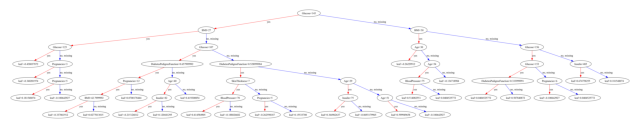

In [110]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

# Second tree plotted with XGBoost algorithm

In [111]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

# Third tree plotted with XGBoost algorithm.

In [112]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

# Using AutoML to find the best model.

In [113]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Note: you may need to restart the kernel to use updated packages.


In [114]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [115]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [116]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


This above code calculates the min_mem_size (minimum memory size) based on a percentage (pct_memory) of the available virtual memory on the system using the psutil library.

In [117]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:24043..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20.0.2" 2023-07-18; Java(TM) SE Runtime Environment (build 20.0.2+9-78); Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from /Users/sanatpopli/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpcx_qk0k5
  JVM stdout: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpcx_qk0k5/h2o_sanatpopli_started_from_python.out
  JVM stderr: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpcx_qk0k5/h2o_sanatpopli_started_from_python.err
  Server is running at http://127.0.0.1:24043
Connecting to H2O server at http://127.0.0.1:24043 ... successful.


--------------------------  ---------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.4
H2O_cluster_version_age:    2 months and 7 days
H2O_cluster_name:           H2O_from_python_sanatpopli_oi35xj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:24043
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.4 final
--------------------------  ---------------------------------

This above code snippet is attempting to start an H2O server with a randomly chosen port number in the range of 5555 to 55555 using the h2o.init function in Python. If an exception occurs during initialization, it logs the error, downloads all logs, shuts down the H2O cluster, and exits the script with a status code of 2.

In [118]:
data = h2o.import_file( './diabetes-dataset/diabetes.csv' )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [119]:
data['Outcome'] = data['Outcome'].asfactor()
print(data['Outcome'].isfactor())

[True]


1)data['Outcome'].asfactor(): This converts the 'Outcome' column in the H2O data frame (data) to a factor type. Factors are categorical variables in H2O.

2)print(data['Outcome'].isfactor()): This prints whether the 'Outcome' column is a factor or not. The isfactor() method returns a boolean indicating whether the column is a factor.

In [120]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [121]:
print(data_train.shape)
print(data_test.shape)

(619, 9)
(149, 9)


In [122]:
# Set the features and target
X=data.columns
print(X)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [123]:
# Set target and predictor variables
y ='Outcome'
#y_numeric ='churn_bit'
X.remove(y) 
#X.remove(y_numeric) 
print(X)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In above snippet we are working with a dataset and we are setting the target variable (y) and predictor variables (X). Additionally, it appears that we are removing the target variable from the predictor variables.

# Application of h20 AutoML again now for checking best model for above testing

In [124]:
# Set up AutoML
auml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [125]:
auml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |
14:46:02.217: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_7_AutoML_1_20231211_144602


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/5
# GBM base models (used / total)           1/1
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03941763766072573
RMSE: 0.19853875606723673
LogLoss: 0.1672700120450848
AUC: 0.9979352078519298
AUCPR: 0.9965075667159656
Gini: 0.9958704157038596
Null degrees of freedom: 618
Residual degrees of freedom: 614
Null deviance: 803.1974155076157
Residual deviance: 207.08027491181494
AIC: 217.08027491181494

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3986322864244273
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      394  7    0.0175   (7.0/401.0)
1      5    213  0.0229   (5.0/218.0)
Total  399  220  0.0194   (12.0/619.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.398632     0.972603  177
max f2                       0.350884     0.979053  183
max f0point5                 0.570502     0.981262  158
max accuracy                 0.470669     0.980614  169
max precision                0.998417     1         0
max recall                   0.262727     1         212
max specificity              0.998417     1         0
max absolute_mcc             0.398632     0.957627  177
max min_per_class_accuracy   0.398632     0.977064  177
max mean_per_class_accuracy  0.398632     0.979804  177
max tns                      0.998417     401       0
max fns                      0.998417     217       0
max fps                      0.000119164  401       399
max tps                      0.262727     218       212
max tnr                      0.998417     1         0
max fnr                      0.998417     0.995413  0
max fpr                      0.000119164  1         399
max tpr                      0.262727     1         212

Gains/Lift Table: Avg response rate: 35.22 %, avg score: 33.82 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113086                   0.991282           2.83945    2.83945            1                0.993839     1                           0.993839            0.0321101       0.0321101                  183.945   183.945            0.0321101
2        0.0210016                   0.983586           2.83945    2.83945            1                0.986863     1                           0.99062             0.0275229       0.059633                   183.945   183.945            0.059633
3        0.0306947                   0.97429            2.83945    2.83945            1                0.977729     1                           0.986549            0.0275229       0.087156                   183.945   183.945            0.087156
4        0.0403877                   0.961172           2.83945    2.8

1)auml: This is your H2O AutoML object.

2)train: This method is used to initiate the training process.

3)x=X, y=y: Here, X represents the list of predictor variables, and y represents the target variable. This specifies the features (X) and the target variable (y) for training the model.

4)training_frame=data_train: This specifies the H2O frame (data_train) containing the training data. The training data includes both the predictor variables (X) and the target variable (y).

In [126]:
print(auml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_7_AutoML_1_20231211_144602  0.847543   0.464138  0.713194                0.224713  0.387869  0.150443
StackedEnsemble_BestOfFamily_6_AutoML_1_20231211_144602  0.846713   0.468776  0.711247                0.226052  0.388371  0.150832
StackedEnsemble_BestOfFamily_4_AutoML_1_20231211_144602  0.845999   0.471843  0.698429                0.22131   0.389092  0.151393
StackedEnsemble_BestOfFamily_2_AutoML_1_20231211_144602  0.844471   0.475257  0.70379                 0.222712  0.389315  0.151566
GBM_grid_1_AutoML_1_20231211_144602_model_38             0.843774   0.465373  0.71054                 0.223913  0.391554  0.153315
StackedEnsemble_BestOfFamily_3_AutoML_1_20231211_144602  0.843179   0.469653  0.69672                 0.225142  0.389957  0.152066
GBM_grid_1_AutoML_1_20231211_144602_model_33             0.843144   0.469447  0.709

The print(auml.leaderboard) statement would typically display the leaderboard of models generated by the H2O AutoML process. The leaderboard provides information about each model, such as model ID, model type, performance metrics, and other details.

In [127]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_BestOfFamily_7_AutoML_1_20231211_144602': 0,
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20231211_144602': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20231211_144602': 2,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20231211_144602': 3,
 'GBM_grid_1_AutoML_1_20231211_144602_model_38': 4,
 'GLM_1_AutoML_1_20231211_144602': 10}

we're working with H2O's AutoML (auml) in Python. The code we provided in above cell is creating a dictionary (models_dict) where the keys are model IDs and the values are corresponding indices. The indices are determined based on the order of appearance of different types of models in the leaderboard.
Here's a breakdown of the code:

1)model_index and glm_index are initialized to 0.

2)A loop is used to iterate through the model IDs in the AutoML leaderboard (auml_leaderboard_df).

3)For each model ID, the code updates the dictionary (models_dict) with the model ID as the key and the current index (model_index or glm_index) as the value. 

4)The loop breaks when it encounters a model ID that does not contain 'StackedEnsemble', and the model_index is incremented.

5)Another loop is used to find the index of the first model ID that contains 'GLM', and the corresponding glm_index is updated.

In [128]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

4


Use auto ml to find the best model 

Using AutoML, we have conclude'GBM' as the best model to determine whether a patient has diabetes. By referring the below variable importance and shap summary plots, we can say that 'Glucose' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'Insulin' and 'Skin thickness' according to variable importance and shap summary plots respectively.

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20231211_144602_model_38

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4799147577282292
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      363  38   0.0948   (38.0/401.0)
1      49   169  0.2248   (49.0/218.0)
Total  412  207  0.1405   (87.0/619.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

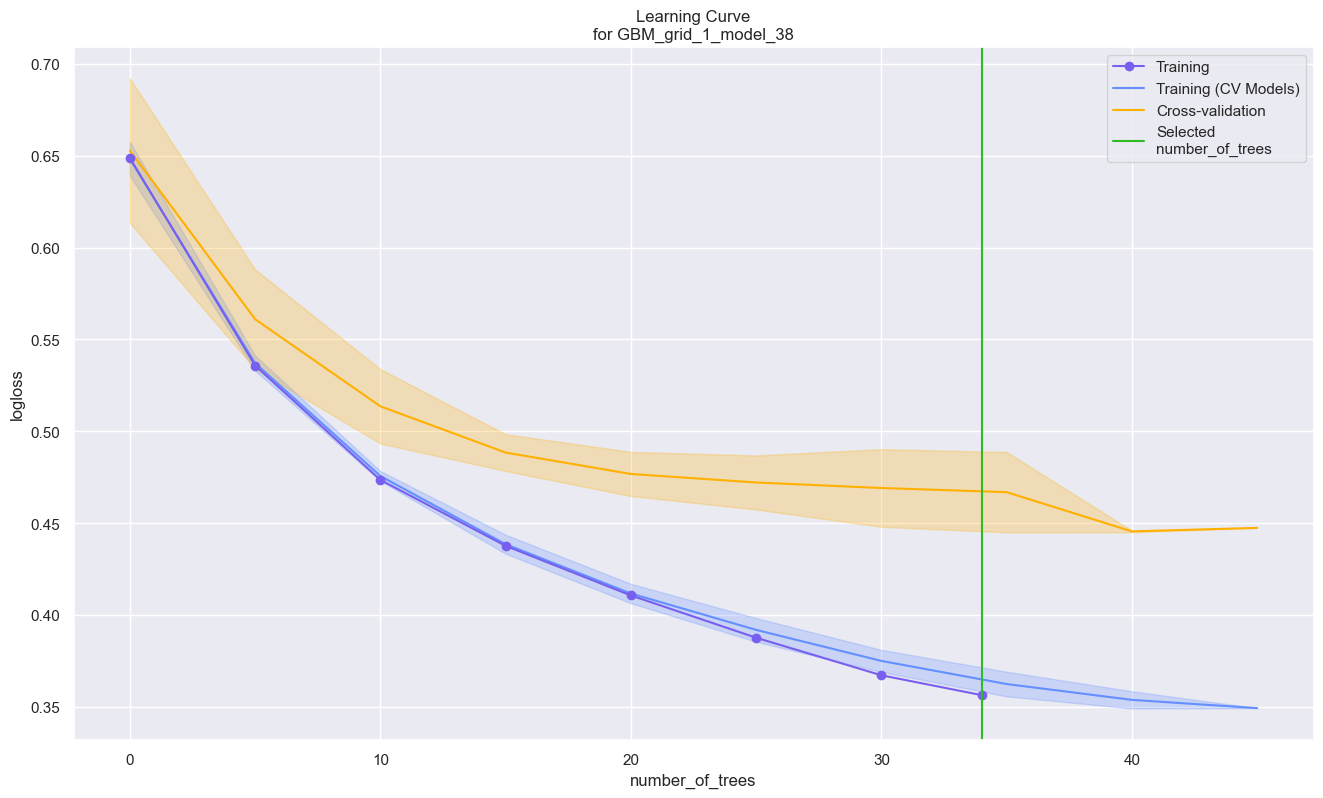

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

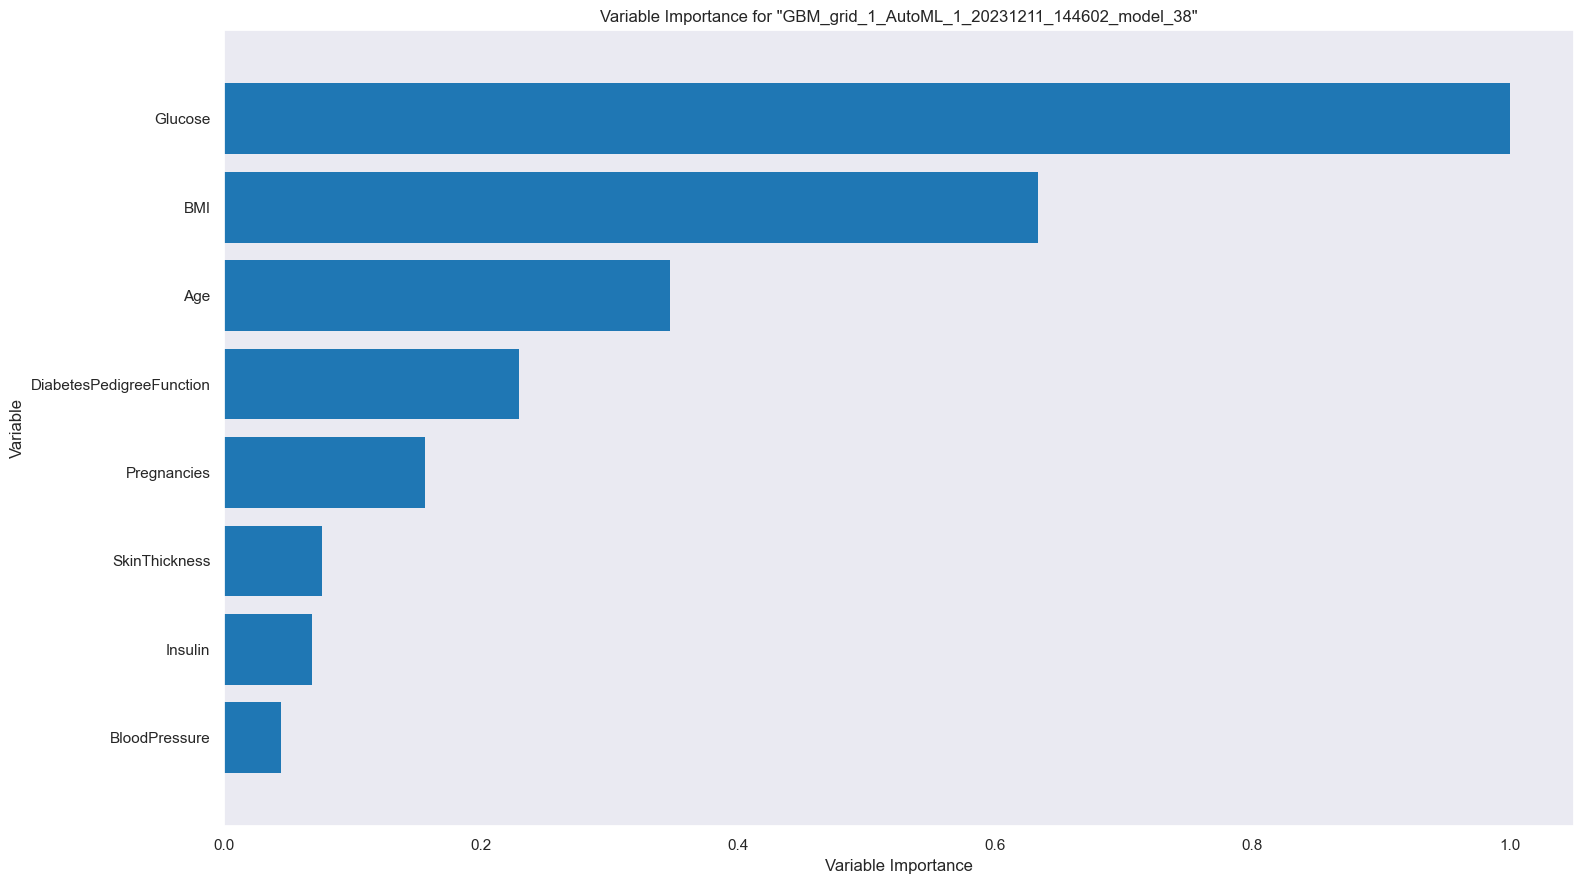

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

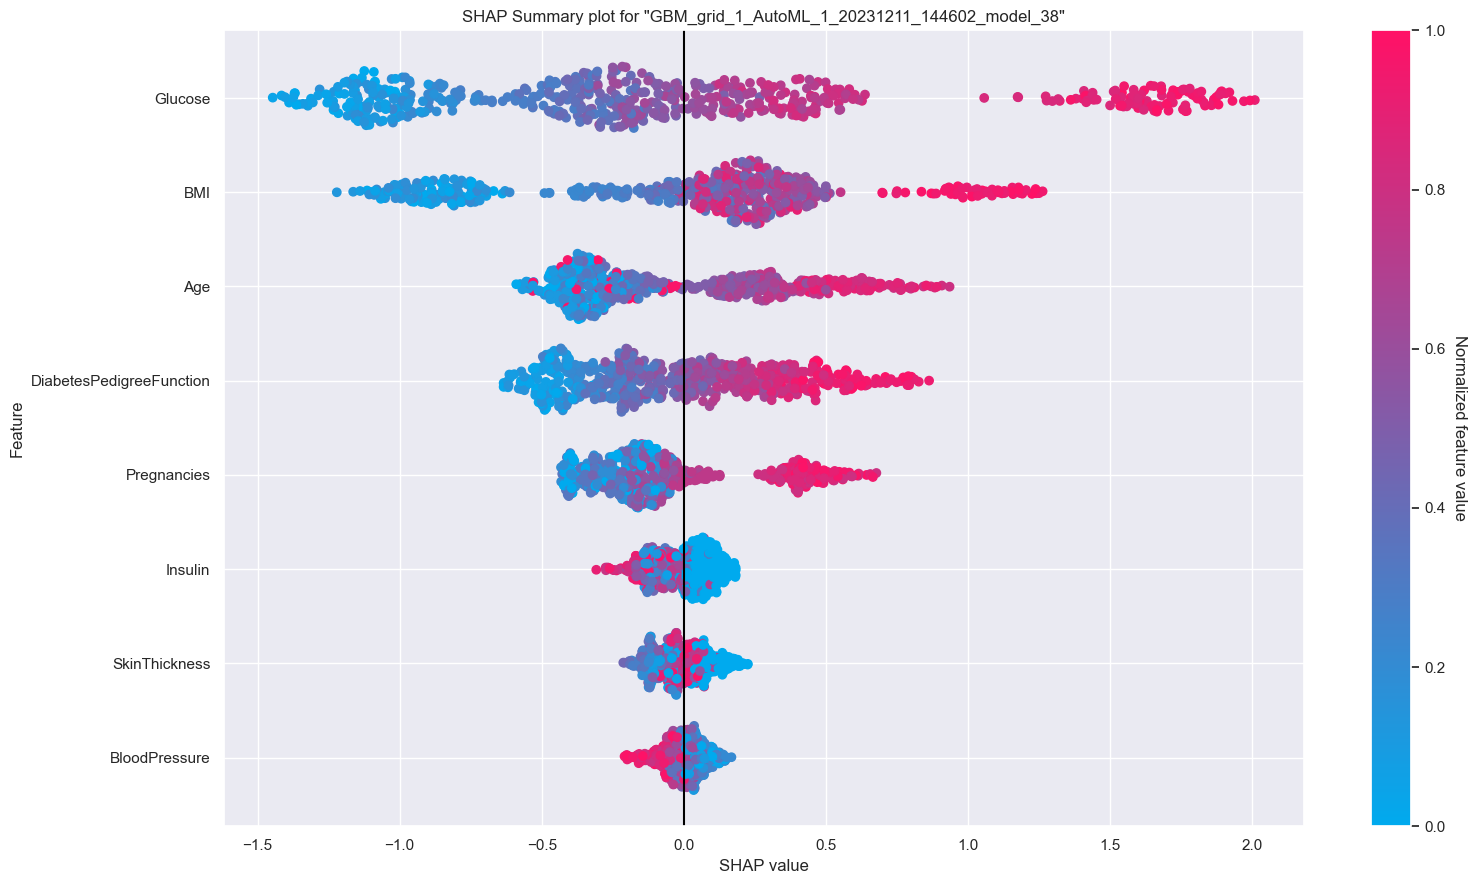

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

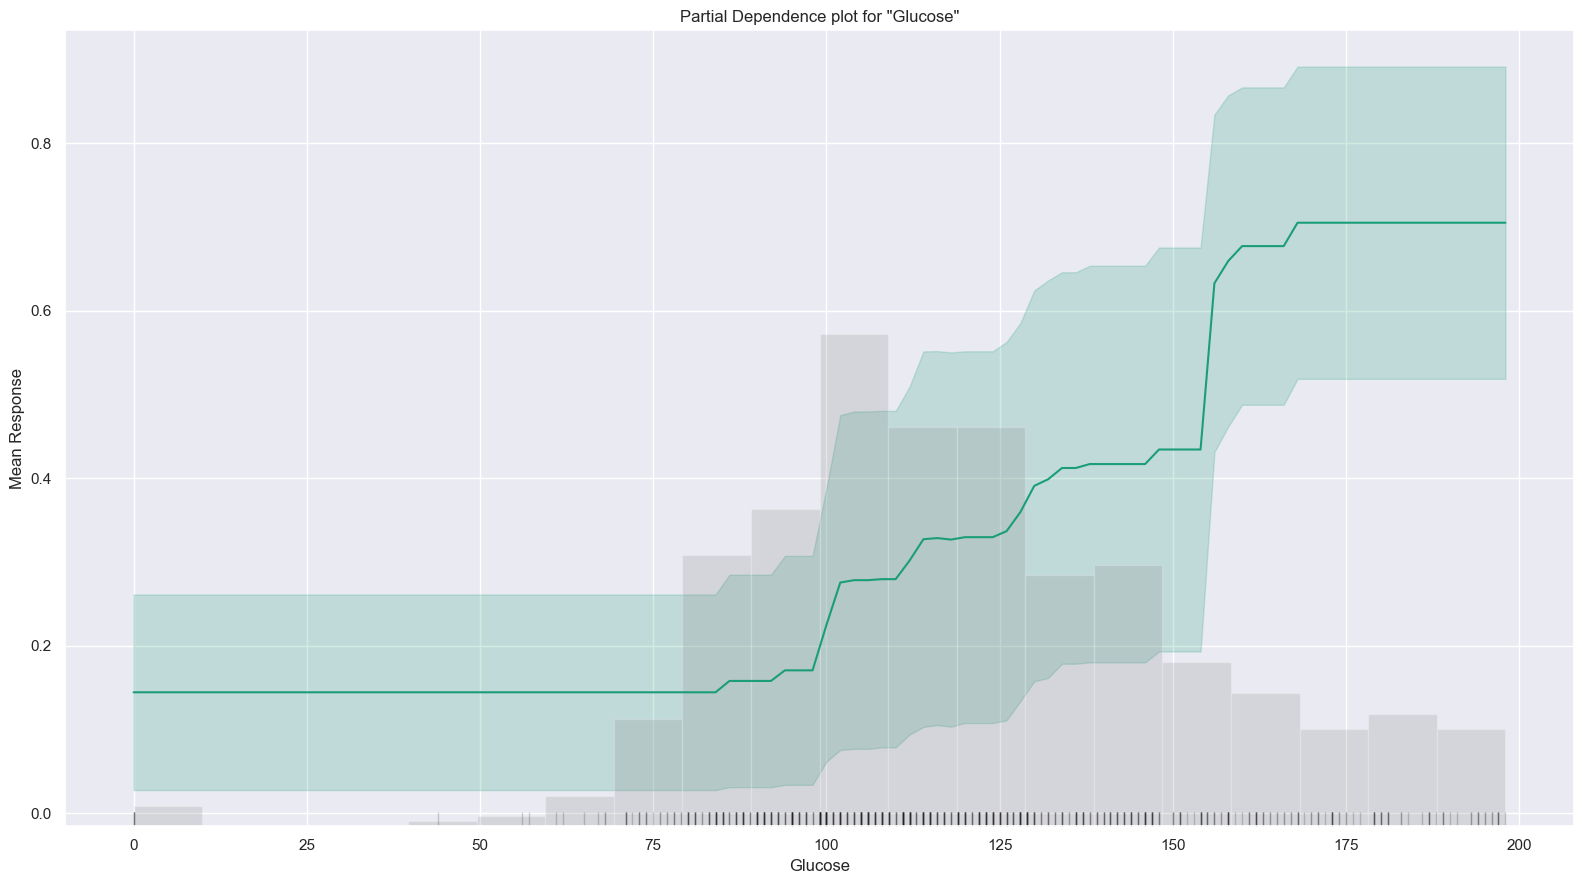

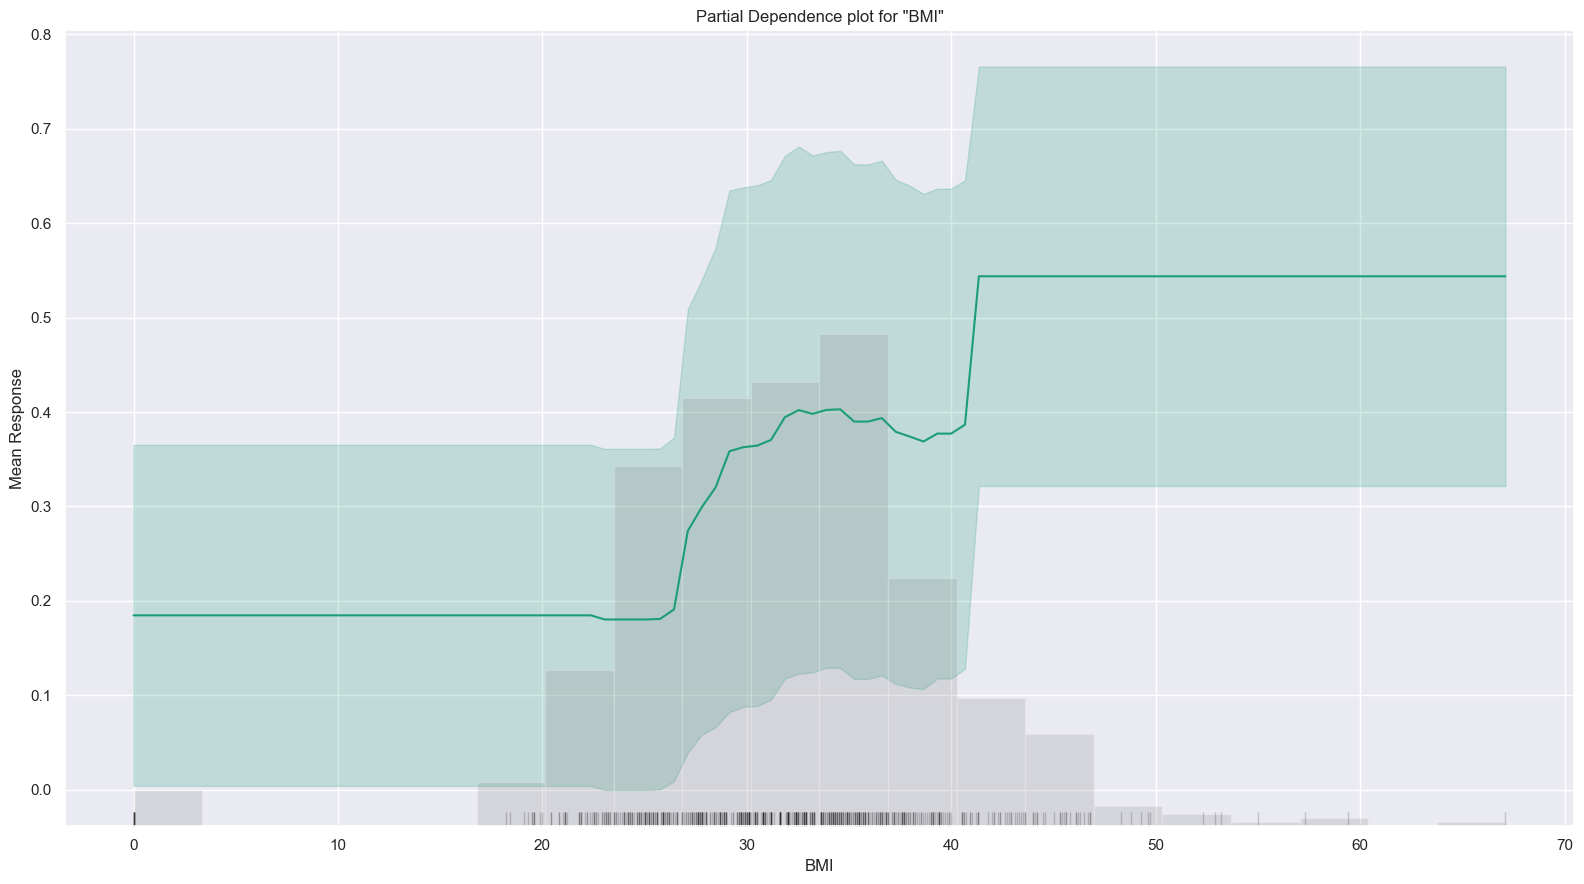

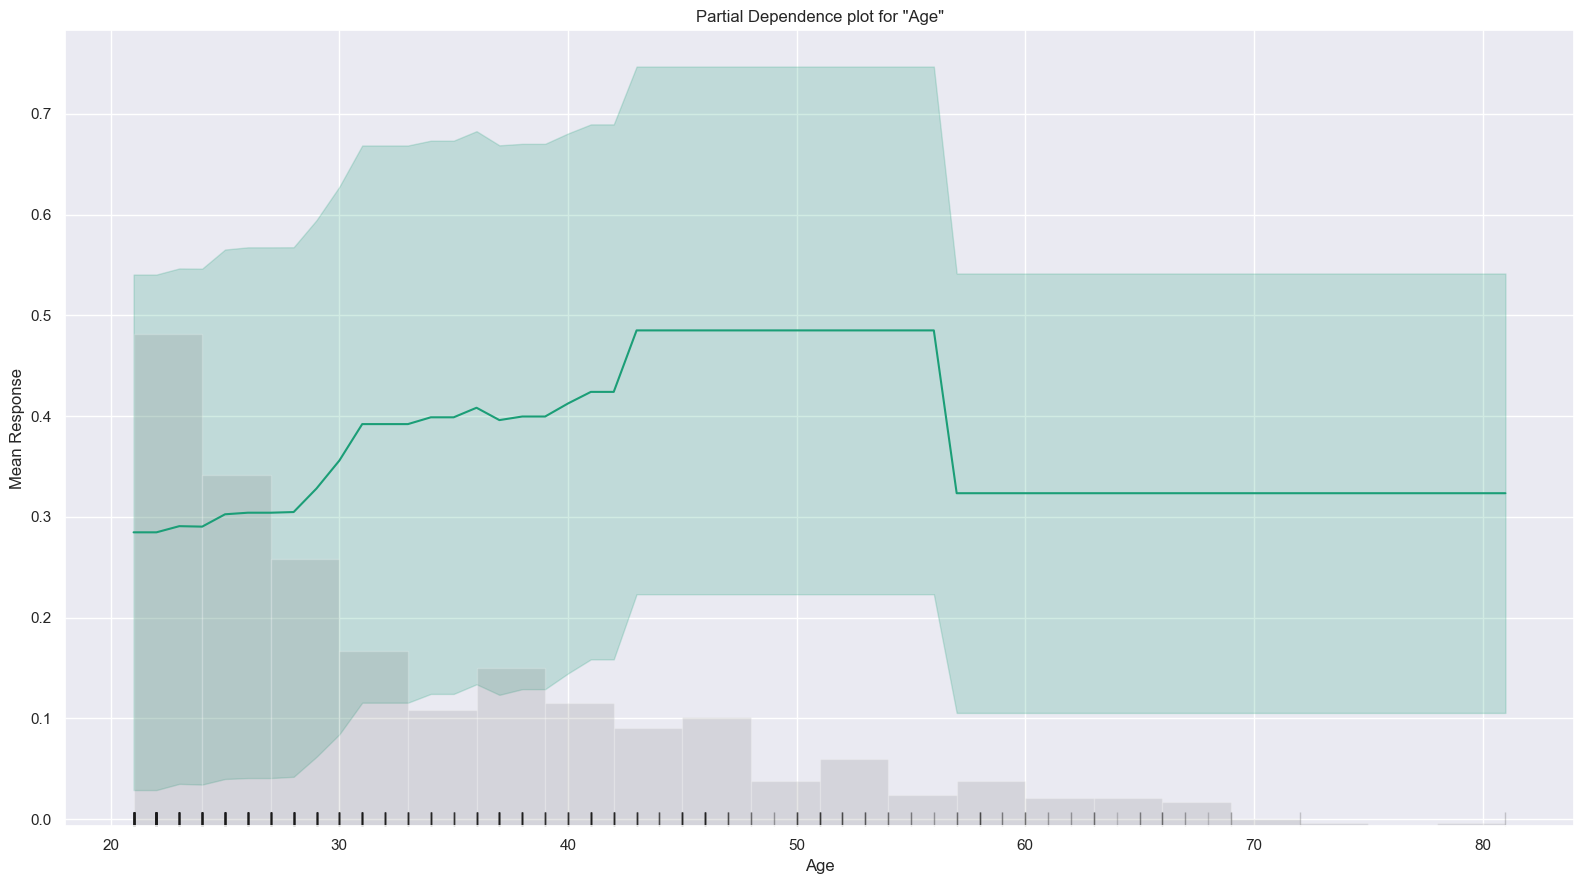

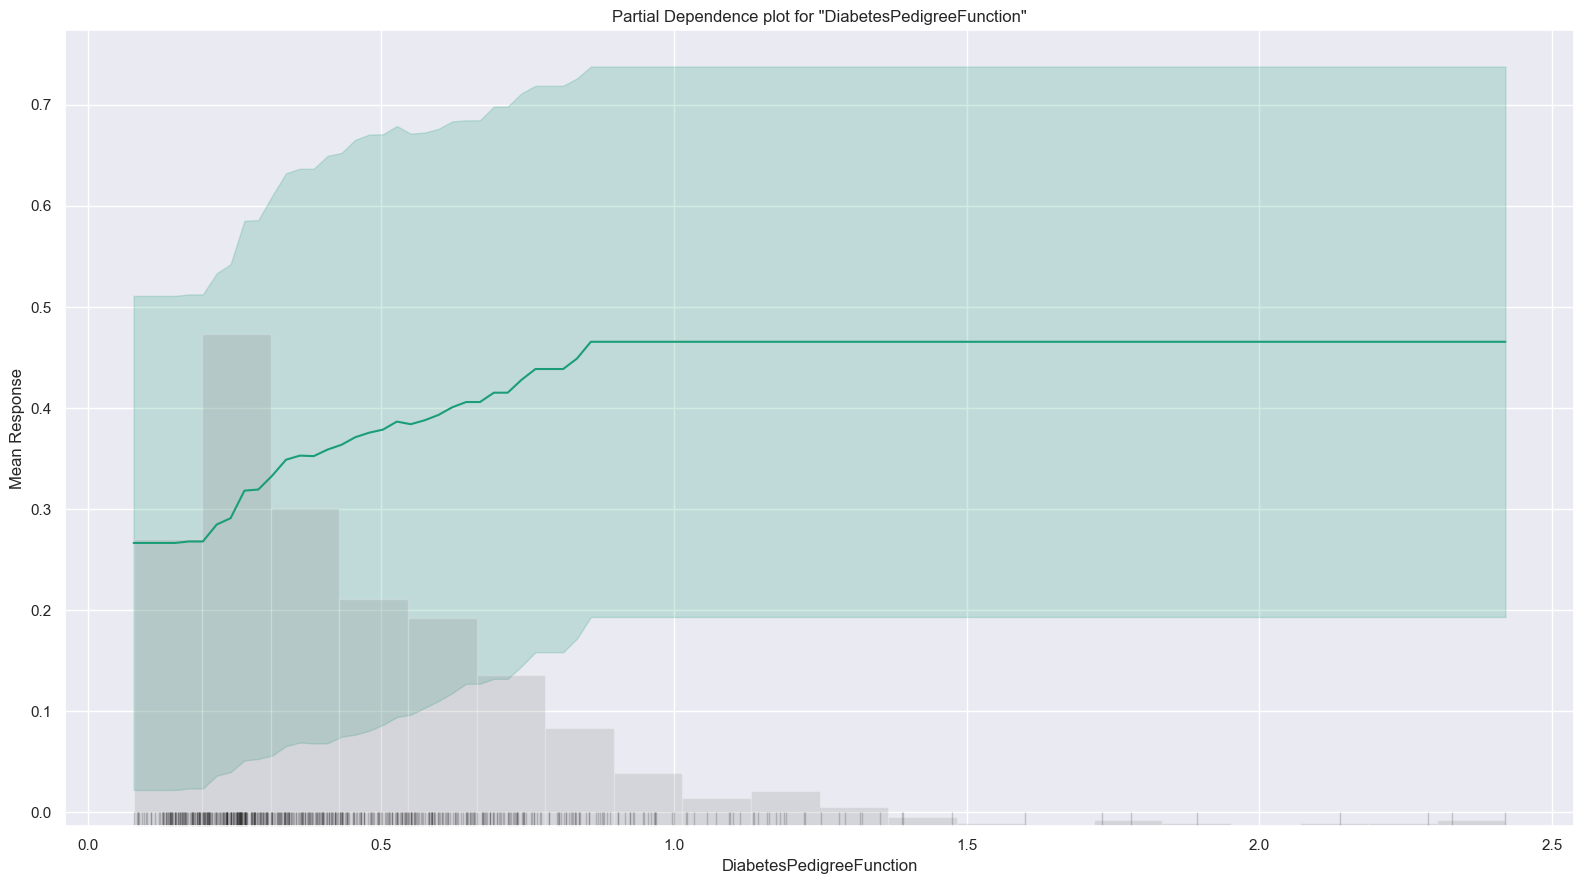

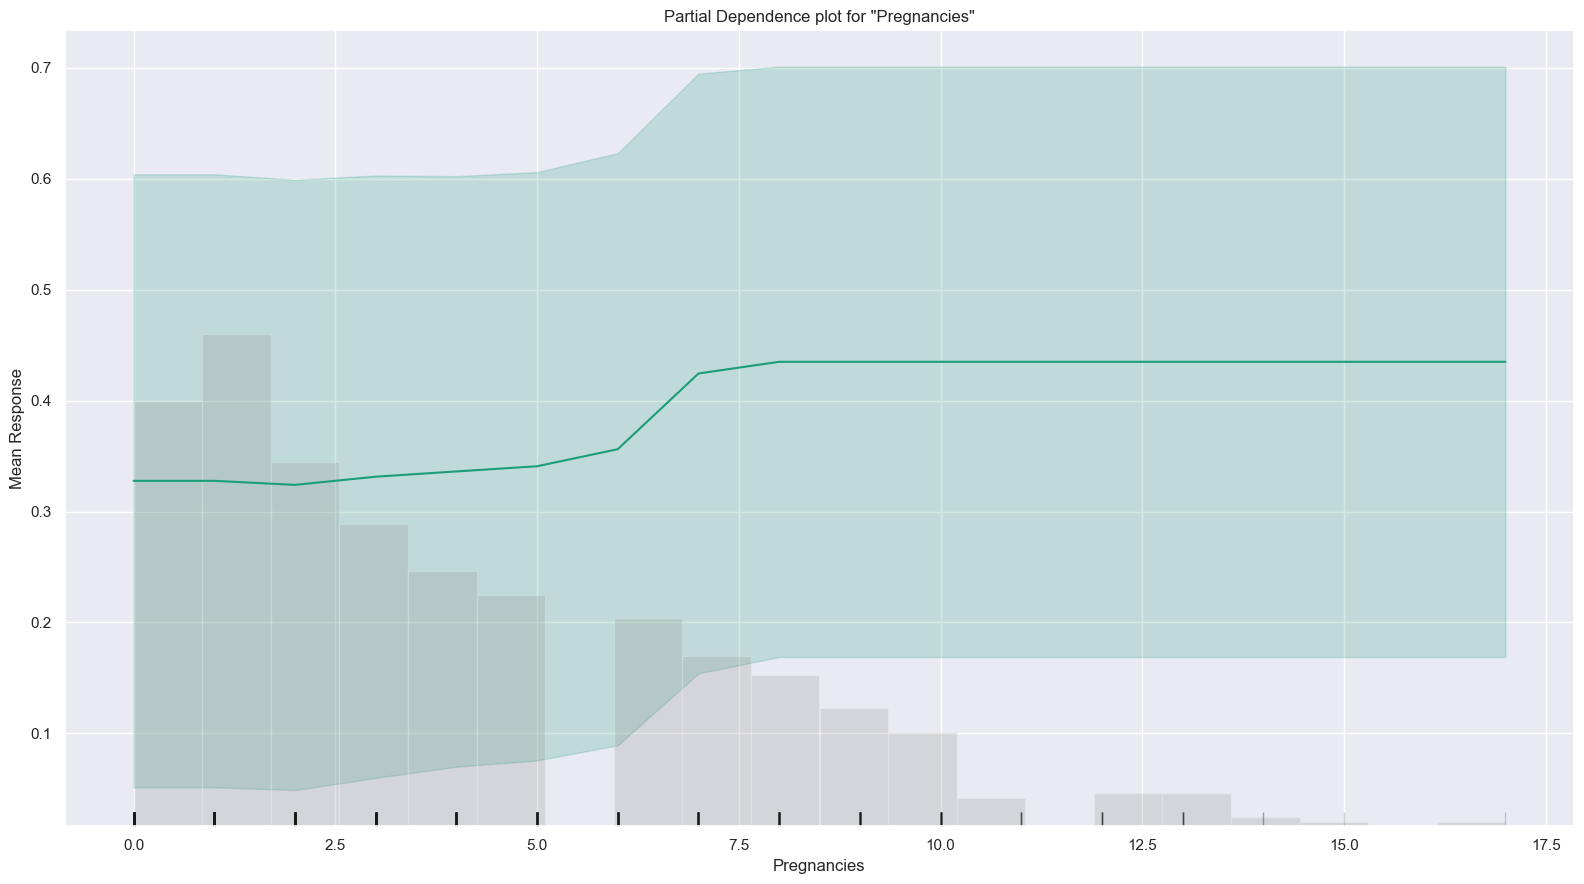

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20231211_144602_model_38

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4799147577282292
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      363  38   0.0948   (38.0/401.0)
1      49   169  0.2248   (49.0/218.0)
Total  412  207  0.1405   (87.0/619.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [129]:
best_model.explain(data_train)

We're using a method called explain on a model named best_model with training data "data_train". However, the specific implementation of the explain method and its parameters depend on the machine learning library or framework we're using. Different libraries may have different ways of implementing model explanation methods.

In [130]:
best_model.algo

'gbm'

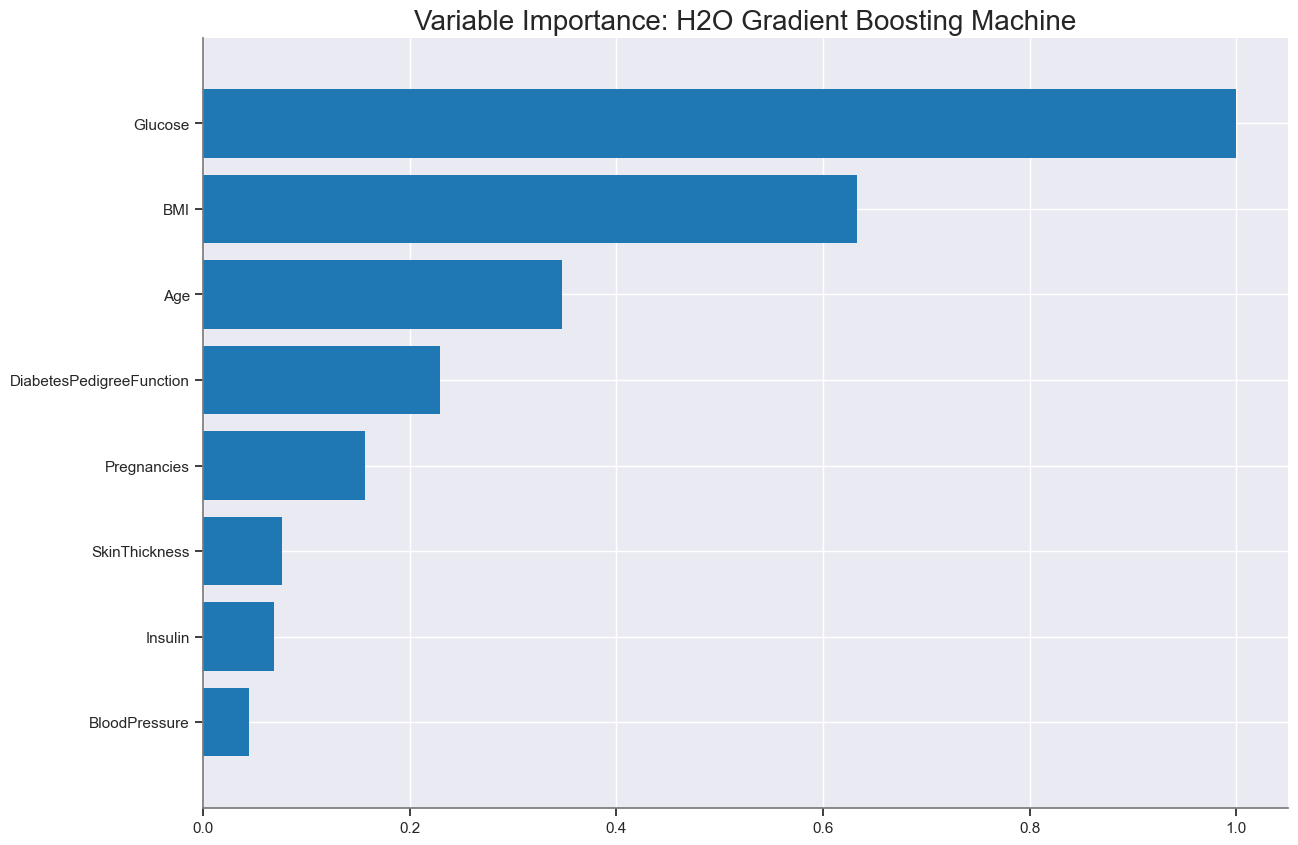

<Figure size 50000x10000 with 0 Axes>

In [131]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Above code checks if the algorithm of best_model is one of the specified algorithms. If it is, it calls the varimp_plot() method to generate the variable importance plot.

10
glm


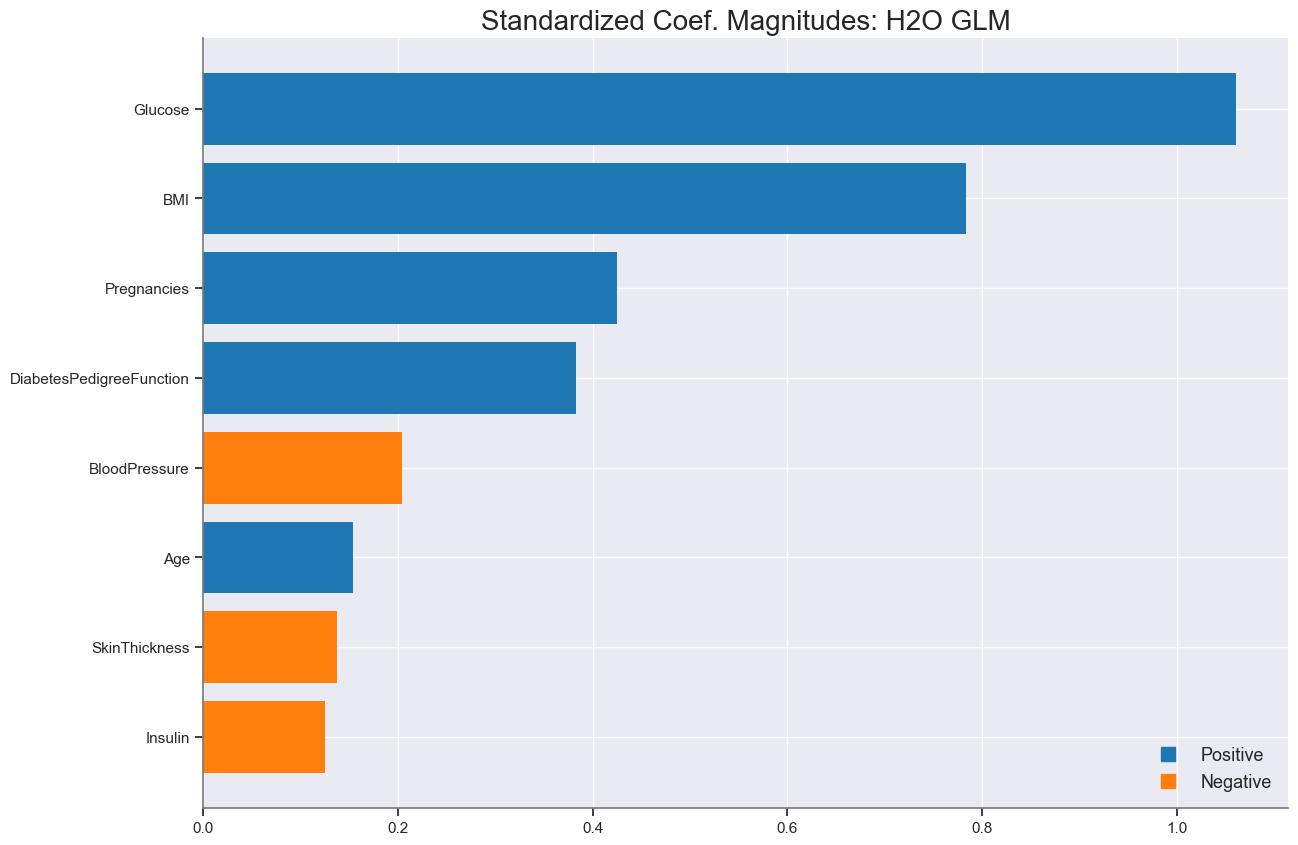

In [132]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In above cell's code ,We have a conditional block in our code that checks if glm_index is not equal to 0. If this condition is true, it prints the value of glm_index, retrieves an H2O model using the model ID from the leaderboard, prints the algorithm used by the model, and finally, it calls std_coef_plot() on the glm_model.

In [133]:
print(best_model.auc(train = True))

0.9267256171497861


The above print() command prints the area under curve for the best suitable algorithm ie GBM and area under curve is 92.672%

In [134]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

We've defined a function model_performance_stats(perf) in above cell's code that takes an H2O performance object (perf) and tries to extract various performance metrics from it. The function uses try-except blocks to handle cases where a specific metric may not be available for the given performance object.

This function attempts to calculate various metrics related to model performance and stores them in a dictionary (d). If a specific metric calculation fails , the corresponding except block catches the exception, and the metric is not added to the dictionary.

the success of calculating these metrics depends on the nature of the model and the type of performance object passed to the function. The function is designed to be robust by handling potential exceptions gracefully

In [135]:
mod_perf=best_model.model_performance(data_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.17797535564734493,
 'rmse': 0.4218712548246739,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.5254236228124926,
 'auc': 0.7933333333333334,
 'gini': 0.5866666666666669}

We're using our model_performance_stats function to extract various performance metrics from the performance of the best_model on the test data (data_test). This is a common approach to evaluate and understand the performance of a trained model on new or unseen data.

This will print or display a dictionary (stats_test) containing the computed performance metrics.

# Initialising the shap analysis on the model from step 1,2,3

In [136]:
!pip install shap

Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.
Ans:

After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'Glucose' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'Skin Thickness' is the least important feature. 

According to beeswarm plot, higher value of 'Glucose' (2) leads to lower chance of diabetes. Lower value of 'Glucose' (1) leads to higher chance of diabetes. Similarly, BMI, pregnencies, AGE, SMOKING, ALCOHOL_CONSUMING, ALLERGY have negative impact on output. While, Insulin, BloodPressure, ANXIETY,have positive impact on model output.

For model 2 (i.e. XGBoost), 'Glucose' and 'Skin Thickness' are the most and least significant features respectively contributing towards prediction of diabetes. According to summary plot, higher value of 'Glucose' leads to lower chance of diabetes. Lower value of 'Glucose' leads to higher chance of diabetes.

As per model 3 (i.e. GBM), by referring the above shap summary plot, 'Glucose' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'Skin Thickness' is less important.
So, all 3 algorithms shows amost same results in terms of most and least dominant.

In [137]:
import shap

In [138]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

1)shap.Explainer(logreg, x_train): This creates a SHAP explainer object (lg_explainer) for your logistic regression model (logreg) based on the training data (x_train).

2)lg_explainer.shap_values(x_test): This calculates the SHAP values for the test set (x_test). The resulting shap_values_lg will contain the Shapley values for each feature and each instance in the test set.

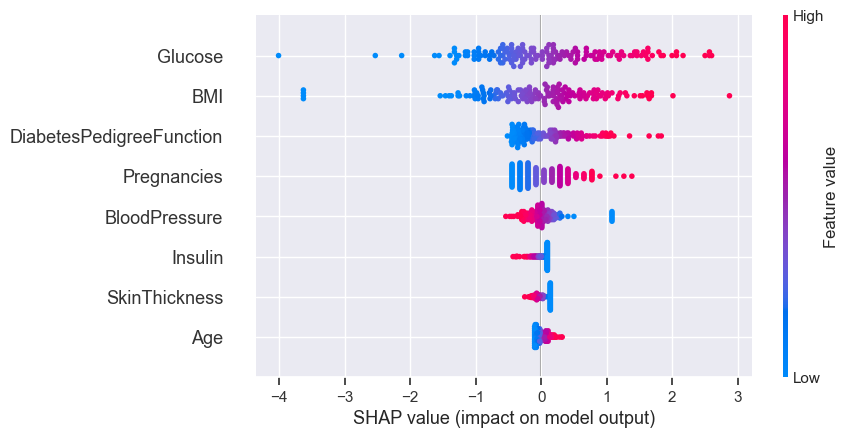

In [139]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

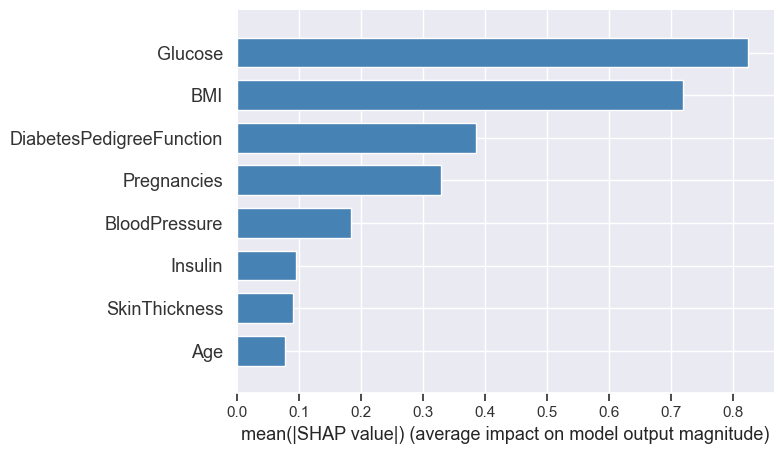

In [140]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

In [141]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

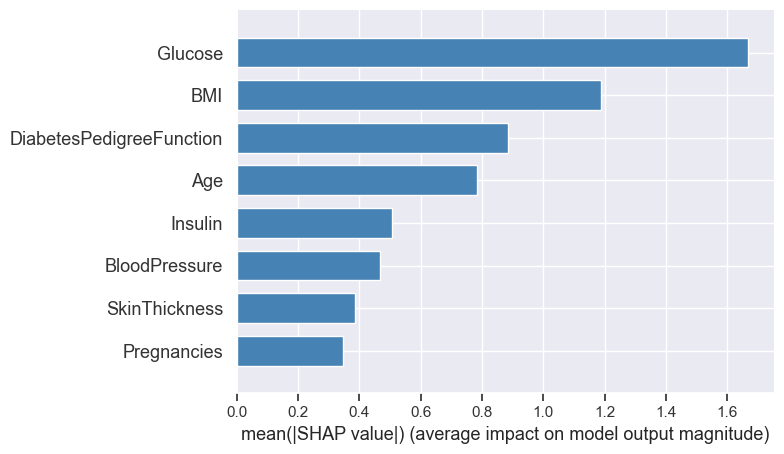

In [142]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

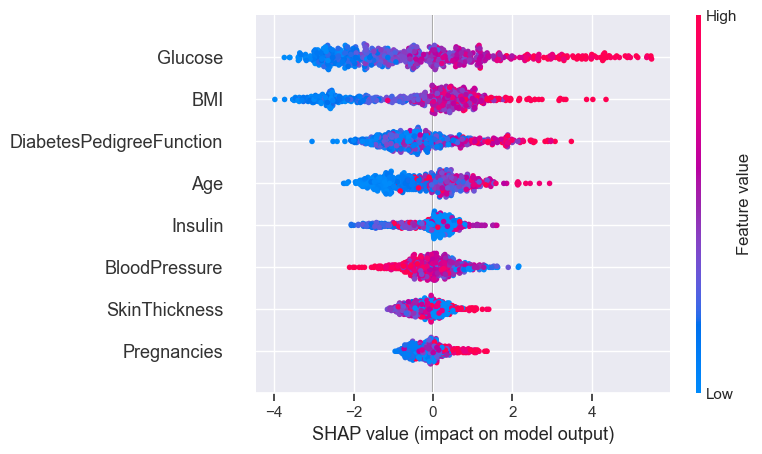

In [143]:
shap.summary_plot(shap_values, x_train)

## Conclusion

In above assignments after applying feature selection and model cleaning and after that applying automl followed by model interpretation and shap testing on my dataset I get accuracy difference and Area under curver difference of best algorithm as compared to the individual assignments I did earlier as I merged all the algorithms but variable imporance still remains the same in all the algorithm and we can conclude that pregnancies,BMI,age are best variables and GBM is the best model for my dataset and from shap analysis in the end give 3 different results for 3 different tests that is for linear regresiion,decision tree and automl which means we need to perform regularisation in the dataset to get a constant result.

## Questions and their answers-

1. What is the question?

Answer-The question was to retrieve my dataset and from that dataset I need to find out the best predictor variables responsible for defining the outcome that is if a person is diabetic or not where 1 means diabetic and 0 means non-diabetic and after that we have to clean/drop least important features which were BloodPressure and skinThickness which we dropped and after that we used the most important features which we get from correlations that was pregnancies,BMI and age and applied outliers and some random dataloss in order to find out the variance and change in value of confusion matrix which we get a significant change and after this feature selection I have to perfom automl in order to get best algorithm/model suitable for my model in which I get GBM but as compared to assignment 2 where the accuracy was 77% on unprocessed datset here i get accuracy change by 10% ie 67% in this assignment where I combine my models and later on by applying shap testing I get to know about most important and leastb important features in all the 3 algo ie linear regression,decision tree and automl and my results were as follows

1)Fit a linear model and interpret the regression coefficients-

Ans: When the variable DiabetesPedigreeFunction is increased by one unit, the odds of having Diabetes in the target class ("2") increase by more than 1x (i.e. 4.6509) compared to the odds of not having Diabetes in the target class. In contrast, as BloodPressure concentration rises by one unit, the chances of lung cancer in the target class rise by only 0.982730.

2)Fit a tree-based model and interpret the nodes

Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'Glucose'. Node interpretability for first 3 trees is shown below.

3)Use auto ml to find the best model

Ans: Using AutoML, we have conclude'GBM' as the best model to determine whether a patient has diabetes. By referring the below variable importance and shap summary plots, we can say that 'Glucose' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'Insulin' and 'Skin thickness' according to variable importance and shap summary plots respectively.

4)Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Ans:After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'Glucose' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'Skin Thickness' is the least important feature. According to beeswarm plot, higher value of 'Glucose' (2) leads to lower chance of diabetes. Lower value of 'Glucose' (1) leads to higher chance of diabetes. Similarly, BMI, pregnencies, AGE, SMOKING, ALCOHOL_CONSUMING, ALLERGY have negative impact on output. While, Insulin, BloodPressure, ANXIETY,have positive impact on model output.

For model 2 (i.e. XGBoost), 'Glucose' and 'Skin Thickness' are the most and least significant features respectively contributing towards prediction of diabetes. According to summary plot, higher value of 'Glucose' leads to lower chance of diabetes. Lower value of 'Glucose' leads to higher chance of diabetes.

As per model 3 (i.e. GBM), by referring the above shap summary plot, 'Glucose' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'Skin Thickness' is less important.


2. What did you do?

Answer-In above assignments after applying feature selection and model cleaning and after that applying automl followed by model interpretation and shap testing on my dataset I get accuracy difference and Area under curver difference of best algorithm as compared to the individual assignments I did earlier as I merged all the algorithms but variable imporance still remains the same in all the algorithm and we can conclude that pregnancies,BMI,age are best variables and GBM is the best model for my dataset and from shap analysis in the end give 3 different results for 3 different tests that is for linear regresiion,decision tree and automl which means we need to perform regularisation in the dataset to get a constant result.

3. How well did it work?

Answer- As compare to individual assignments the results were significantly different as for automl I get linear regression accuracy somewhat less as compared to the past assignment and the area under curve for the best model ie
gbm decreased from 95% to 92.67% but the results were same as in the past assignments the most important features I got were pregnencies,BMI,Age and this result is still constant as well as the best model is still the same which is gbm and least important features were still SkinThickness and BloodPressure and for the model interpretation of linear regression,decision tree and automl all we need is regularisation in our data.

4. What did you learn?

Answer- The keypoints I learn from the above assignment is merging of various algorithms and features in a single module and get a data retrieval on wider dataset and also learn to create a self made algorithms by implementing various already defined features such as linear regresion,logistic regression,p-test,chi square test,automl,model interpretation and shap analysis and here the data readings is the factor which plays an important role in deciding the next step which we need to write in the next code snippet and one more thing there a significant change in mathematical readings such as accuracy and area under curve if we combine various models together.

## License

Copyright (c) 2022 Sanat Popli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### References

1) https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

2) https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

3) https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

4) https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

5) https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

6) https://www.datacamp.com/community/tutorials/xgboost-in-python

7) https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

8)AutoMl vs Traditioal ML model-https://www.youtube.com/watch?v=BpK1RMYclsY.

9)Brief description about Automated ML-https://en.wikipedia.org/wiki/Automated_machine_learning.
10)Dataset used for Analysis-'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'
